#### kaggle 竞赛入门

- 对于刚刚入门机器学习的的同学来说，kaggle竞赛通常是他们学习和跟其他的全世界范围内的参赛选手切磋的一个大的平台，这个平台上提供了一些入门的竞赛，可以供刚入门的同学一展拳脚

- 本文针对房价预测的这个竞赛展开，从EDA，特征工程，到模型调参开始讲述一些竞赛中的小的trick，希望对大家有些帮助,本人基础一般，如果有贻笑大方的地方，可以随意拍砖

In [1]:
from IPython.display import HTML
from IPython.display import Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### 导入常用的数据分析以及模型的库

In [2]:
import pandas as pd
import numpy as np

- 查看当前目录下的文件可以使用！ls

In [3]:
!ls

data_description.txt
data_description.zip
kaggle house price.ipynb
sample_submission.csv
stacking-house-prices-walkthrough-to-top-5.ipynb
test.csv
train.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


- 数据结构类似于波士顿房屋的价格数据，其中该数据集中有79个特征，来描述房屋，可以通过数据描述来查看对应字段的意义
- 同时本文也将缺失值处理的方法进行阐述
- PoolQC           7 non-null object
- Fence            281 non-null object
- MiscFeature      54 non-null object  以上三个特征缺失较为明显，后文将有对应的对缺失值处理的方法

#### 数据处理

![处理异常值](https://ws1.sinaimg.cn/large/9ebd4c2bly1g4sv6rwu1ij20ja0cj77r.jpg)

- 异常值通常是指在预期的值之外，至于如何处理异常值，怎么界定异常值，取决于个人和特定的问题
- 对于异常值通常会在数据分布点之外，因此通常会让计算的结果和数据的分布
- 以下图为例

![](https://ws1.sinaimg.cn/large/9ebd4c2bly1g4svlxc1xzj20nr07daaq.jpg)

In [8]:
with open ('data_description.txt','r') as f:
    for i in f.readlines():
        print(i)
        break
    

MSSubClass: Identifies the type of dwelling involved in the sale.	




#### Data fields

Here's a brief version of what you'll find in the data description file.

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

- 首先看这个特征 GrLivArea: Above grade (ground) living area square feet,是指居住面积平方英尺

##### 去除异常值

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

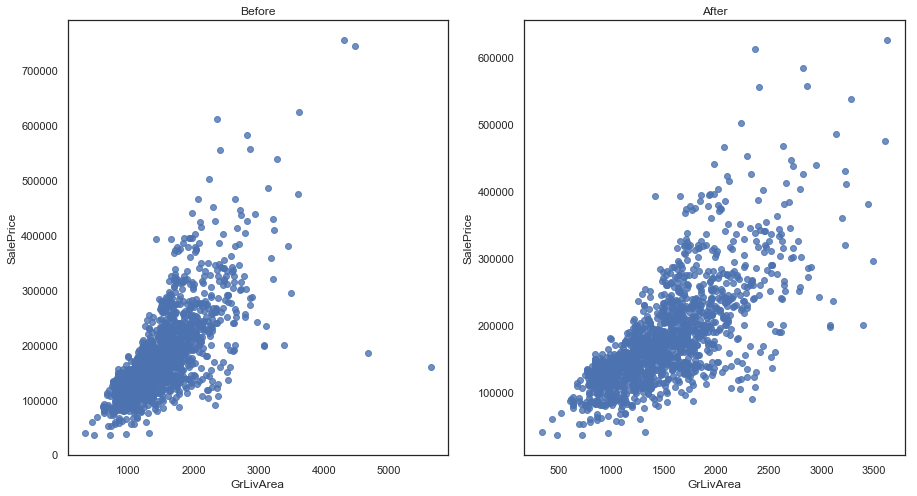

In [10]:
plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
g= sns.regplot(x=train['GrLivArea'],y= train['SalePrice'],fit_reg=False).set_title('Before')
plt.subplot(1,2,2)
train= train.drop(train[train['GrLivArea']>4000].index)
g=sns.regplot(x=train['GrLivArea'],y=train['SalePrice'],fit_reg=False).set_title('After')

* 从以上图中可以发现，居住面积大于4000的样本总共有4个，且这个四个属于严重的偏离分布

##### 处理缺失值
- 缺失值可能是由于人工输入错误，机器误差等问题导致的
- 有些例子中的缺失值可以使用0进行填充，前提是需要知道该特征代表的意义，缺失即代表0
- 实际情况中，填充0并不总是最好的办法，而且针对不同的算法，对于缺失值处理的能力不同，本文需要使用多种算法进行拟合房价，因此如何正确处理缺失值呢，一般有两种方法：
    - 直接删掉带有缺失值的列
    - 填充缺失值

In [11]:
# 首先先把训练数据与测试数据的长度保持，以备后用
ntrain = train.shape[0]
ntest = test.shape[0]

# 保持训练集的目标值数据即 SalePrice
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
all_data.drop(['Id'],axis=1,inplace=True)
print('all data shape:{}'.format(all_data.shape))

all data shape:(2915, 79)


In [12]:
all_data_na = all_data.isnull().sum()

In [13]:
all_data_na.sort_values(ascending=False)

PoolQC           2907
MiscFeature      2810
Alley            2717
Fence            2345
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
Electrical          1
Exterior2nd         1
KitchenQual         1
GarageCars          1
Exterior1st         1
GarageArea          1
TotalBsmtSF         1
                 ... 
GrLivArea           0
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchS

In [14]:
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)

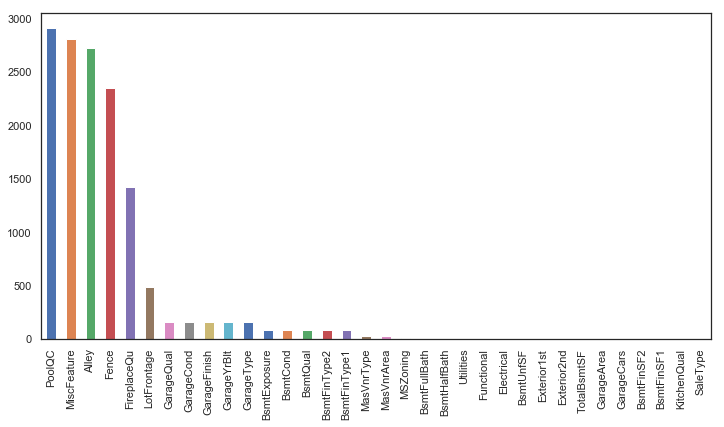

In [15]:
plt.subplots(figsize=(12,6))
all_data_na.plot(kind='Bar')

- [参考链接](https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5)

In [16]:
!pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [17]:
train[all_data_na.index[:25]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 25 columns):
PoolQC          5 non-null object
MiscFeature     54 non-null object
Alley           91 non-null object
Fence           280 non-null object
FireplaceQu     766 non-null object
LotFrontage     1197 non-null float64
GarageQual      1375 non-null object
GarageCond      1375 non-null object
GarageFinish    1375 non-null object
GarageYrBlt     1375 non-null float64
GarageType      1375 non-null object
BsmtExposure    1418 non-null object
BsmtCond        1419 non-null object
BsmtQual        1419 non-null object
BsmtFinType2    1418 non-null object
BsmtFinType1    1419 non-null object
MasVnrType      1448 non-null object
MasVnrArea      1448 non-null float64
MSZoning        1456 non-null object
BsmtFullBath    1456 non-null int64
BsmtHalfBath    1456 non-null int64
Utilities       1456 non-null object
Functional      1456 non-null object
Electrical      1455 non-null object
BsmtUnfSF    

- for category feature we,fill these missing values with "None"
- for float feature and the number of missing values seemingly much larger ,we fill these missing values with median of the feature
- for float feature and the number of missing values smaller, we will fill these missing values with mode

In [18]:
for col in ("PoolQC", 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond',
            'GarageFinish', 'GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1',
           'MasVnrType'):
    all_data[col] = all_data[col].fillna('None')

    
print('处理object类型缺失值，根据特征的描述，特征缺失值补充为"None"，已完成')
    
for col in ("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea",
           "BsmtFullBath", "BsmtHalfBath"):
    all_data[col] = all_data[col].fillna(0)

print('处理数值类型的缺失值，根据特征的描述，选择特征缺失值补充为0，已完成')


all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna(all_data['Functional'].mode()[0])

print('处理缺失值较少的缺失值，数据类型为数值，填充缺失值为该特征的众数，已完成')

all_data_na = all_data.isnull().sum()
print("Features with missing values: ", all_data_na.drop(all_data_na[all_data_na == 0].index))


处理object类型缺失值，根据特征的描述，特征缺失值补充为"None"，已完成
处理数值类型的缺失值，根据特征的描述，选择特征缺失值补充为0，已完成
处理缺失值较少的缺失值，数据类型为数值，填充缺失值为该特征的众数，已完成
Features with missing values:  LotFrontage    486
Utilities        2
dtype: int64


In [19]:
all_data.groupby(["Neighborhood"])['LotFrontage'].sum()

Neighborhood
Blmngtn      938.0
Blueste      273.0
BrDale       645.0
BrkSide     5300.0
ClearCr     1763.0
CollgCr    15694.0
Crawfor     5806.0
Edwards    11467.0
Gilbert     8237.0
IDOTRR      5415.0
MeadowV      845.0
Mitchel     6763.0
NAmes      28204.0
NPkVill      591.0
NWAmes      6929.0
NoRidge     4684.0
NridgHt    13722.0
OldTown    14147.0
SWISU       2599.0
Sawyer      7306.0
SawyerW     7491.0
Somerst    10457.0
StoneBr     2860.0
Timber      4626.0
Veenker     1152.0
Name: LotFrontage, dtype: float64

In [20]:
all_data['LotFrontage']=all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

##### 分析 Utilities

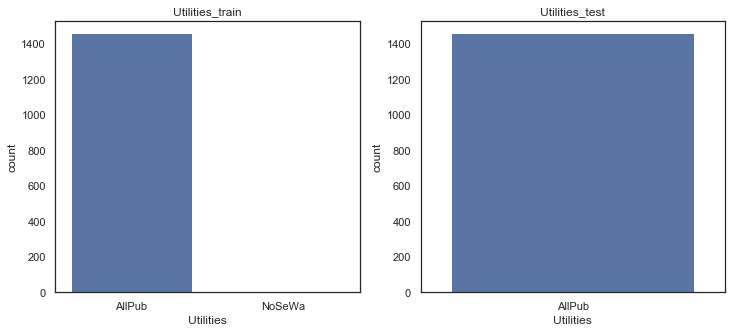

In [21]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
g=sns.countplot(x='Utilities',data=train).set_title('Utilities_train')
plt.subplot(1,2,2)
g=sns.countplot(x='Utilities',data=test).set_title('Utilities_test')

In [22]:
train['Utilities'].value_counts()

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [24]:
all_data = all_data.drop(['Utilities'], axis=1)

In [25]:
all_data_na = all_data.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))

Features with missing values:  0


#### Exploratory Data Analysis

##### Correlation matrix

- 异常值与缺失值已经处理完毕，进一步需要特征之间与特征与目标值之间的关系，相关系数矩阵就是提供了反应特征与目标值之间关系的一个参考

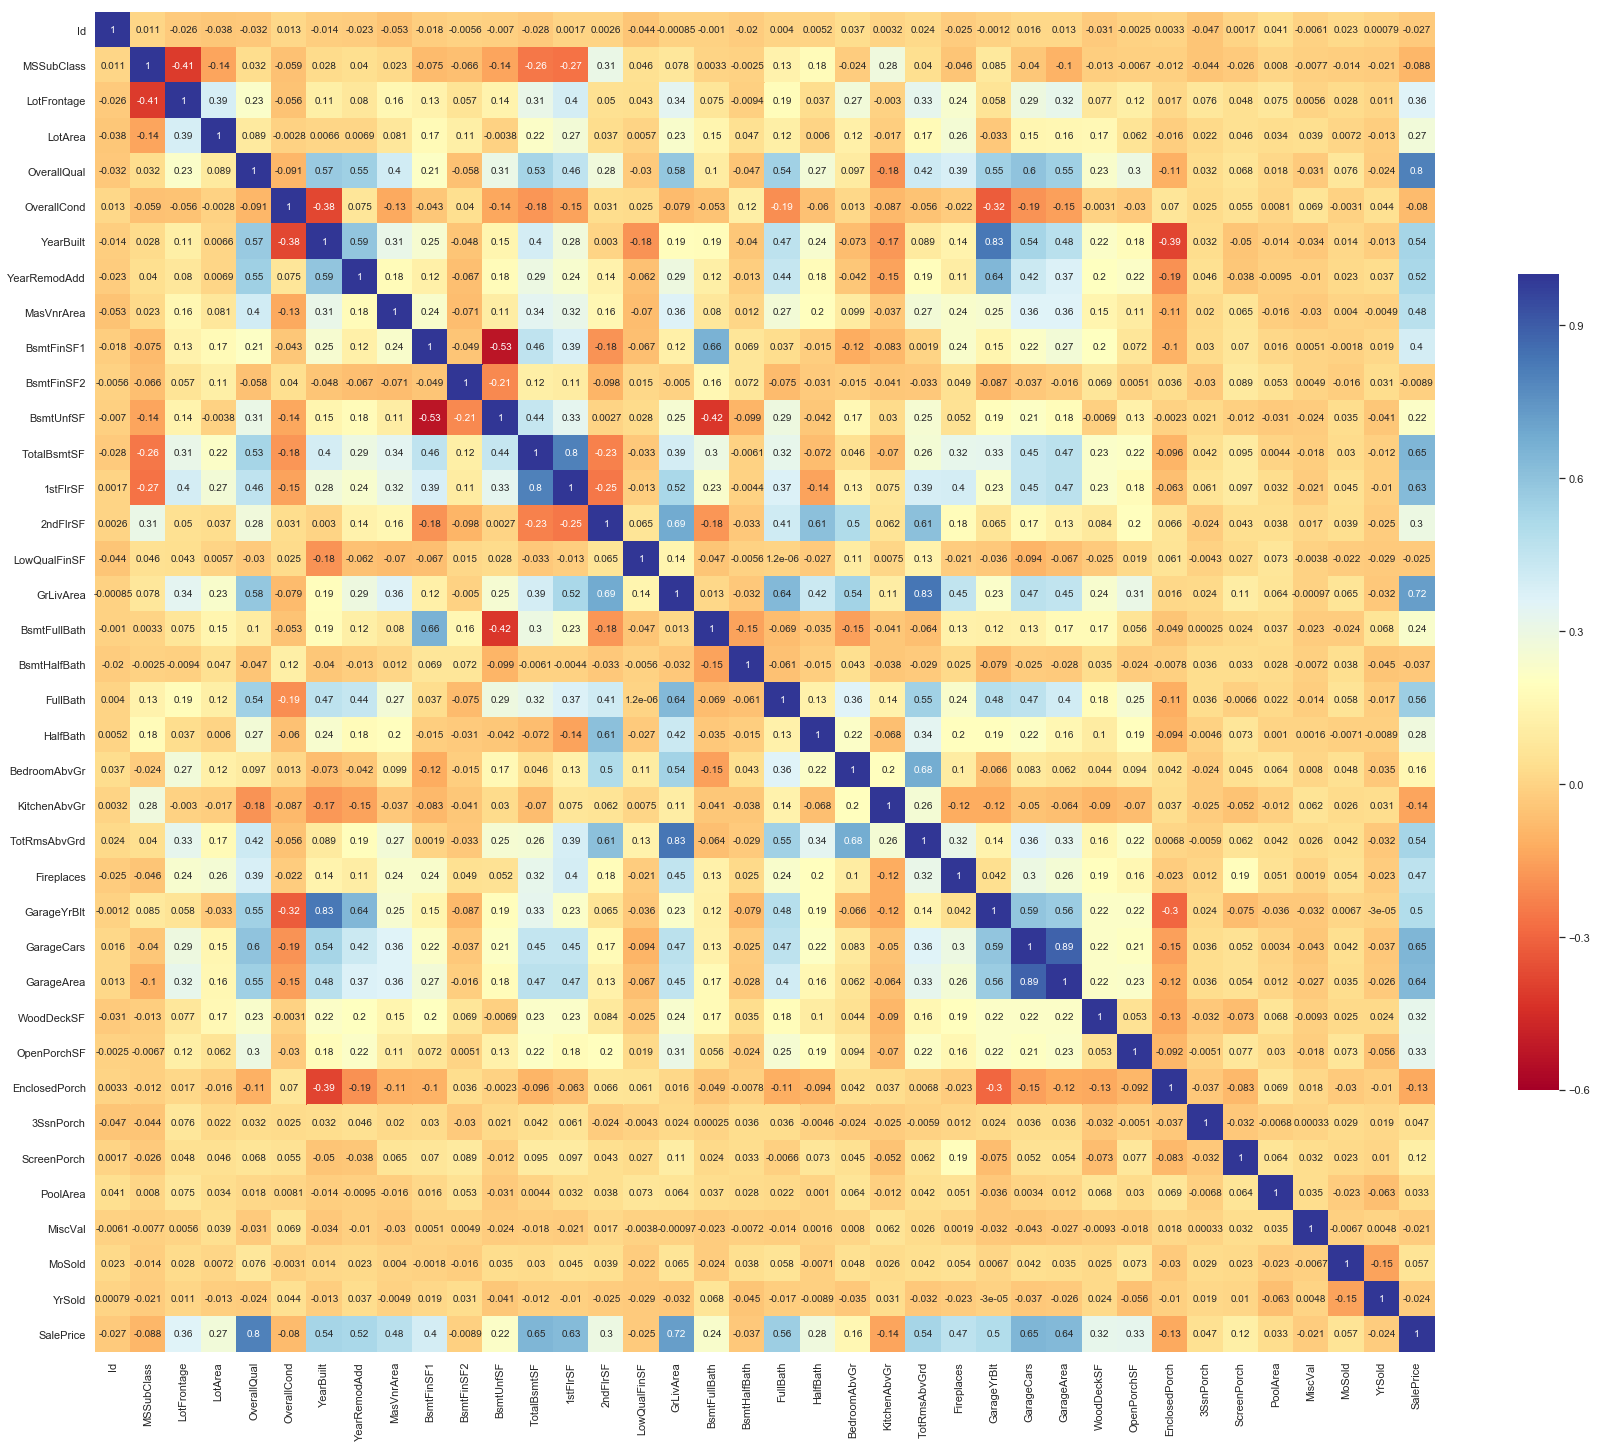

In [26]:
corr = train.corr()
plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

- for raw highly influencing factors on SalePrice, we could do feature engineering 

- 从相关系数矩阵中，我们挑选了一些跟最终售价相关性较高的做进一步的分析

- 主要的影响因素有以下几个:
1. **OverallQual**  Overall material and finish quality  整体的物料以及完成质量
2. **GrLivArea**  Above grade (ground) living area square feet 地面以上的居住面积 平方英尺
3. **GarageCars**  Size of garage in car capacity 停车场的大小，可以放几辆车
4. **GarageArea**   Size of garage in square feet 停车场的面积大小
5. **TotalBsmtSF** Total square feet of basement area 地下室的面积 平方英尺
6. **1stFlrSF**  First Floor square feet 一楼的面积 平方英尺
7. **FullBath** Full bathrooms above grade 地上卫生间
8. **TotRmsAbvGrd**   Total rooms above grade (does not include bathrooms) 地上去掉卫生间的房屋数
9. **Fireplaces**   壁炉数量
10. **MasVnrArea**  Masonry veneer area in square feet  粗略可以理解为石灰结构的建筑面积
11. **BsmtFinSF1**  Quality of basement finished area Type 1 finished square feet地下室的完成面积
12. **LotFrontage**   Linear feet of street connected to property  距离街道的距离
13. **WoodDeckSF**  Wood deck area in square feet  木质结构的建筑面积
14. **OpenPorchSF**   Open porch area in square feet  开放式门廊的面积
15. **2ndFlrSF**  Second floor square feet  二楼的面积

In [27]:
# Quadratic
all_data["OverallQual-2"] = all_data["OverallQual"] ** 2
all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
all_data["GarageArea-2"] = all_data["GarageArea"] ** 2
all_data["TotalBsmtSF-2"] = all_data["TotalBsmtSF"] ** 2
all_data["1stFlrSF-2"] = all_data["1stFlrSF"] ** 2
all_data["FullBath-2"] = all_data["FullBath"] ** 2
all_data["TotRmsAbvGrd-2"] = all_data["TotRmsAbvGrd"] ** 2
all_data["Fireplaces-2"] = all_data["Fireplaces"] ** 2
all_data["MasVnrArea-2"] = all_data["MasVnrArea"] ** 2
all_data["BsmtFinSF1-2"] = all_data["BsmtFinSF1"] ** 2
all_data["LotFrontage-2"] = all_data["LotFrontage"] ** 2
all_data["WoodDeckSF-2"] = all_data["WoodDeckSF"] ** 2
all_data["OpenPorchSF-2"] = all_data["OpenPorchSF"] ** 2
all_data["2ndFlrSF-2"] = all_data["2ndFlrSF"] ** 2
print("Quadratics done!...")


# Cubic
all_data["OverallQual-23"] = all_data["OverallQual"] ** 3
all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
all_data["GarageCars-3"] = all_data["GarageCars"] **3
all_data["GarageArea-3"] = all_data["GarageArea"] ** 3
all_data["TotalBsmtSF-3"] = all_data["TotalBsmtSF"] ** 3
all_data["1stFlrSF-3"] = all_data["1stFlrSF"] ** 3
all_data["FullBath-3"] = all_data["FullBath"] ** 3
all_data["TotRmsAbvGrd-3"] = all_data["TotRmsAbvGrd"] ** 3
all_data["Fireplaces-3"] = all_data["Fireplaces"] ** 3
all_data["MasVnrArea-3"] = all_data["MasVnrArea"] ** 3
all_data["BsmtFinSF1-3"] = all_data["BsmtFinSF1"] ** 3
all_data["LotFrontage-3"] = all_data["LotFrontage"] ** 3
all_data["WoodDeckSF-3"] = all_data["WoodDeckSF"] ** 3
all_data["OpenPorchSF-3"]=all_data["OpenPorchSF"] ** 3
all_data["2ndFlrSF-3"]= all_data["2ndFlrSF"] ** 3
print("Quadratics done!...")



# Square Root
all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
all_data["TotRmsAbvGrd-Sq"] = np.sqrt(all_data["TotRmsAbvGrd"])
all_data["Fireplaces-Sq"] = np.sqrt(all_data["Fireplaces"])
all_data["MasVnrArea-Sq"] = np.sqrt(all_data["MasVnrArea"])
all_data["BsmtFinSF1-Sq"] = np.sqrt(all_data["BsmtFinSF1"])
all_data["LotFrontage-Sq"] = np.sqrt(all_data["LotFrontage"])
all_data["WoodDeckSF-Sq"] = np.sqrt(all_data["WoodDeckSF"])
all_data["OpenPorchSF-Sq"] = np.sqrt(all_data["OpenPorchSF"])
all_data["2ndFlrSF-Sq"] = np.sqrt(all_data["2ndFlrSF"])
print("Roots done!...")







Quadratics done!...
Quadratics done!...
Roots done!...


#####  BsmtQual 

In [28]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    117
Fa     35
Name: BsmtQual, dtype: int64

In [29]:
train.groupby(['BsmtQual'])['SalePrice'].mean()
"""
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
"""

'\nBsmtQual: Evaluates the height of the basement\n\n       Ex\tExcellent (100+ inches)\t\n       Gd\tGood (90-99 inches)\n       TA\tTypical (80-89 inches)\n       Fa\tFair (70-79 inches)\n       Po\tPoor (<70 inches\n       NA\tNo Basement\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


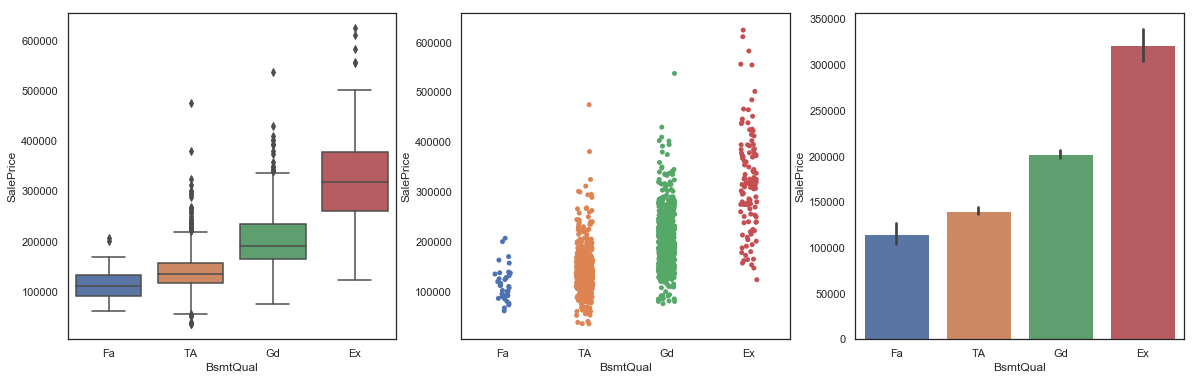

In [30]:
plt.subplots(figsize=(20,6))
plt.subplot(1,3,1)# 箱形图
sns.boxplot(x='BsmtQual',y='SalePrice',data=train,order= ['Fa', 'TA', 'Gd', 'Ex'])


plt.subplot(1,3,2) # x轴里的类别进行分类
sns.stripplot(x='BsmtQual',y='SalePrice',data=train,size=5,jitter=True,order= ['Fa', 'TA', 'Gd', 'Ex'])


plt.subplot(1,3,3) # 柱状图
sns.barplot(x='BsmtQual',y='SalePrice',data=train,order= ['Fa', 'TA', 'Gd', 'Ex'],estimator=np.mean)


In [31]:
all_data['BsmtQual'] = all_data['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
all_data['BsmtQual'].unique()

array([3, 2, 4, 0, 1], dtype=int64)

In [32]:
all_data['BsmtQual'].value_counts()

2    1283
3    1209
4     254
1      88
0      81
Name: BsmtQual, dtype: int64

- 很明显，该特征能够显著的影响销售价格，而且越高的的地下室，对应的价格也越高
- typical and good 两个分部数量较大，占比较高
- 可以将该特征的变量是有高低好坏之分的，也就是category 特征的顺序性，可以转化为数字(个人觉得意义不大）

##### BsmtCond

In [33]:
"""
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
"""




'\nBsmtCond: Evaluates the general condition of the basement\n\n       Ex\tExcellent\n       Gd\tGood\n       TA\tTypical - slight dampness allowed\n       Fa\tFair - dampness or some cracking or settling\n       Po\tPoor - Severe cracking, settling, or wetness\n       NA\tNo Basement\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


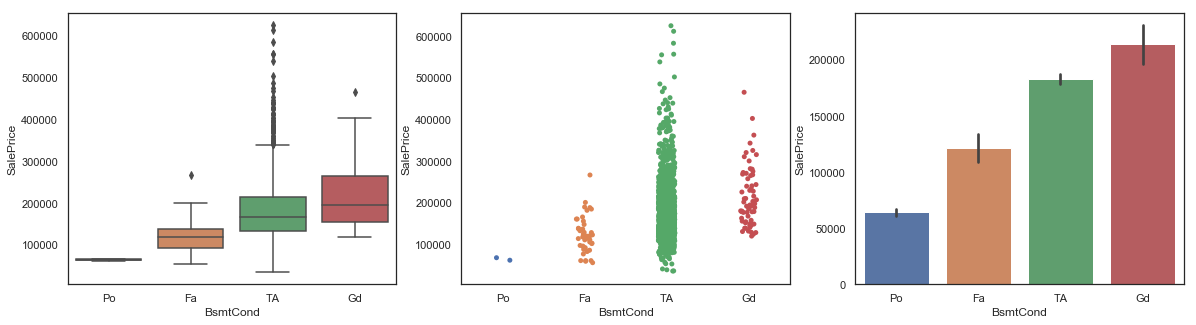

In [34]:
plt.subplots(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='BsmtCond',y='SalePrice',data=train,order=['Po','Fa','TA','Gd'])
plt.subplot(1,3,2)


sns.stripplot(x='BsmtCond',y='SalePrice',data=train,size=5,jitter=True,order= ['Po','Fa','TA','Gd'])


plt.subplot(1,3,3)


sns.barplot(x='BsmtCond',y='SalePrice',data=train,order=['Po','Fa','TA','Gd'])



In [35]:
train['BsmtCond'].value_counts()

TA    1307
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

- 图二中的Typical样本数据占比较高，从barplot中可以看出该特征能够很明显的影响售出价格
- 针对图一种的TA价格较为分散，价格分布离散

In [36]:
all_data['BsmtCond'] = all_data['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3,"Gd":4, "Ex":5})
all_data['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int64)

##### BsmtExplosure

In [37]:
"""
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

"""

'\nBsmtExposure: Refers to walkout or garden level walls\n\n       Gd\tGood Exposure\n       Av\tAverage Exposure (split levels or foyers typically score average or above)\t\n       Mn\tMimimum Exposure\n       No\tNo Exposure\n       NA\tNo Basement\n\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


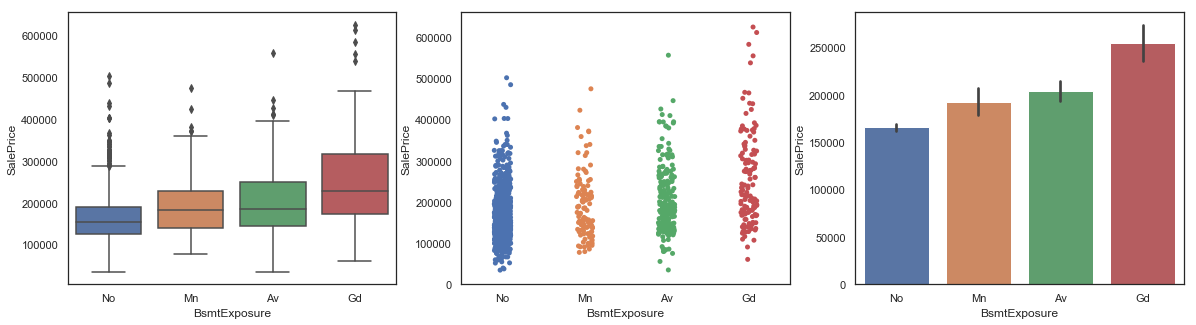

In [38]:
plt.subplots(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='BsmtExposure',y='SalePrice',data=train,order=['No','Mn','Av','Gd'])
plt.subplot(1,3,2)
sns.stripplot(x='BsmtExposure',y='SalePrice',data=train,size=5,jitter=True,order= ['No','Mn','Av','Gd'])
plt.subplot(1,3,3)
sns.barplot(x='BsmtExposure',y='SalePrice',data=train,order=['No','Mn','Av','Gd'])

In [39]:
all_data['BsmtExposure'] = all_data['BsmtExposure'].map({"None":0, "No":1, "Mn":2, "Av":3,"Gd":4})
all_data['BsmtExposure'].unique()

array([1, 4, 2, 3, 0], dtype=int64)

##### BsmtFinType1

In [40]:
"""
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
"""

'\nBsmtFinType1: Rating of basement finished area\n\n       GLQ\tGood Living Quarters\n       ALQ\tAverage Living Quarters\n       BLQ\tBelow Average Living Quarters\t\n       Rec\tAverage Rec Room\n       LwQ\tLow Quality\n       Unf\tUnfinshed\n       NA\tNo Basement\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


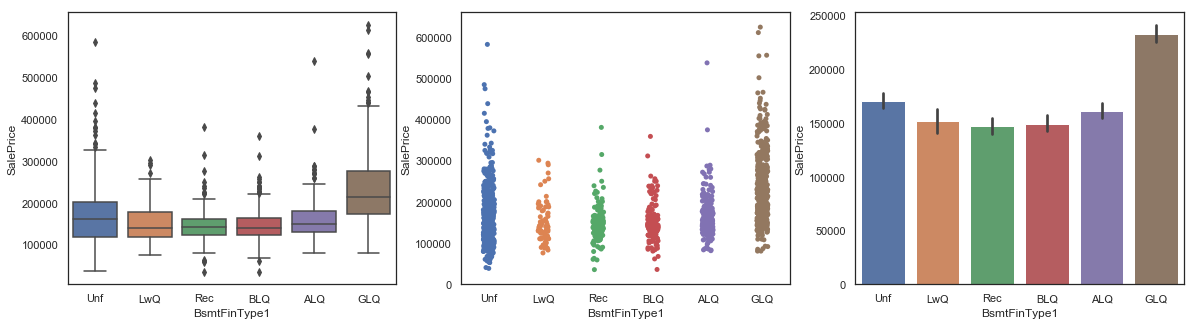

In [41]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType1", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

- 可以从图一中看出，很多没有装修完的地下室房屋的价格很高
- 从图三中可以看到，这些category 不是按照顺序的提高，房屋的销售价提高与category的顺序没有必然关系
- 因此将这个特征进行one-hot转化，可以使用pandas 中的get_dummy函数进行转化

In [42]:
all_data = pd.get_dummies(all_data, columns = ["BsmtFinType1"], prefix="BsmtFinType1")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0  None             3     1Fam         3   
1      1262         0          0  None             3     1Fam         3   
2       920       866          0  None             3     1Fam         3   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2        ...        WoodDeckSF-Sq  \
0             1       706.0         0.0        ...             0.000000   
1             4       978.0         0.0        ...            17.262677   
2             2       486.0         0.0        ...             0.000000   

   OpenPorchSF-Sq  2ndFlrSF-Sq  BsmtFinType1_ALQ  BsmtFinType1_BLQ  \
0        7.810250    29.223278                 0                 0   
1        0.000000     0.000000                 1                 0   
2        6.480741    29.427878                 0                 0   

  BsmtFinType1_GLQ BsmtFinType1_LwQ BsmtFinType1_None BsmtFinType1_Rec  \
0                1                0                 0                0   
1                0                0                 0                0   
2                1                0                 0                0   

   BsmtFinType1_Unf  
0                 0  
1                 0  
2                 0  

[3 rows x 129 columns]

##### BsmtFinSF1

- BsmtFinSF1: Type 1 finished square feet

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


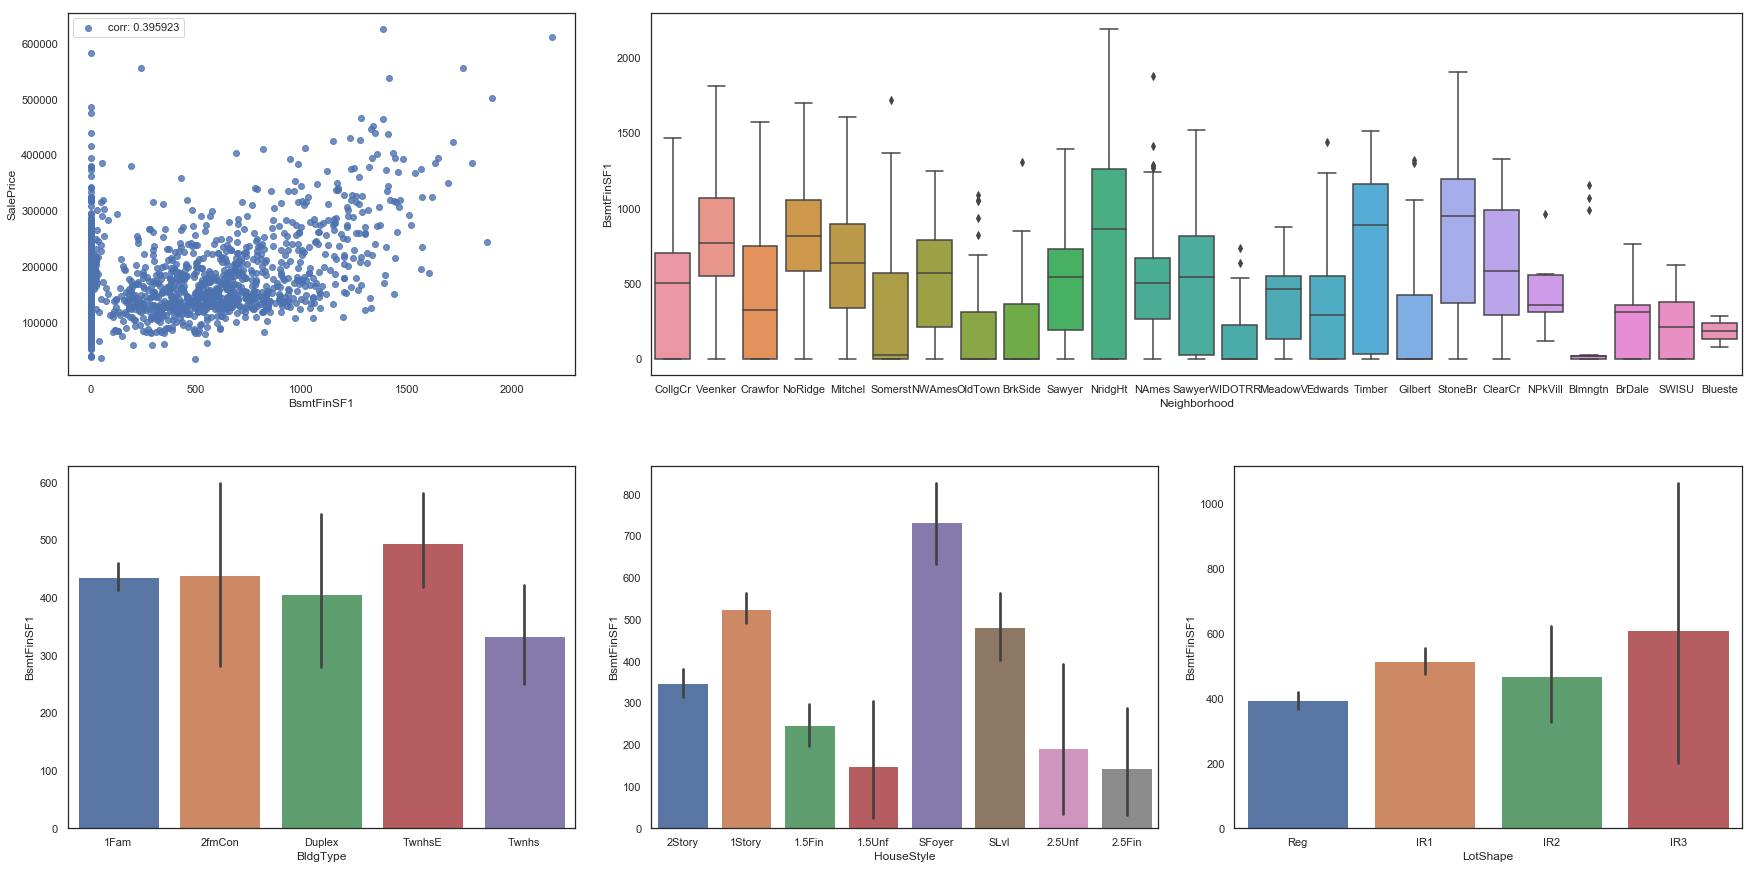

In [43]:
from scipy.stats.stats import pearsonr
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
# 创建画布指定子图将放置的网格的几何位置。 需要设置网格的行数和列数。 子图布局参数（例如，左，右等）可以选择性调整。
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])


g = sns.regplot(x=train['BsmtFinSF1'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF1'], train['SalePrice'])[0]))
# g= sns.regplot(x=train['BsmtFinSF1'],y=train["SalePrice"],fit_reg==False,label= "Corr:%2f" %(pearsonr(train['BsmtFinType1'],train['SalePrice'])[0]))
g.legend(loc='best')

plt.subplot(grid[0,1:])

sns.boxplot(x='Neighborhood',y='BsmtFinSF1',data=train)

plt.subplot(grid[1,0])
sns.barplot(x='BldgType',y= 'BsmtFinSF1',data=train)


plt.subplot(grid[1,1])

sns.barplot(x='HouseStyle',y ='BsmtFinSF1',data=train)

plt.subplot(grid[1,2])


sns.barplot(x='LotShape',y='BsmtFinSF1',data=train)


- 地下室完成面积对于销售价格来说影响很大，但是对于Neighborhood以及BldgType houseType LotShape 影响各异，这三个因素对于完成面积影响没有规律可循
- 但是特征是连续的数值特质，因此考虑将其进行切割分组

In [44]:
bins = [-5,1000,2000,3000,float('inf')]
all_data['BsmtFinSF1_Band'] = pd.cut(all_data['BsmtFinSF1'], bins,labels=['1','2','3','4'])

In [45]:
all_data['BsmtFinSF1_Band'].unique()
all_data.drop('BsmtFinSF1',axis=1,inplace=True)

In [46]:
all_data = pd.get_dummies(all_data, columns = ["BsmtFinSF1_Band"], prefix="BsmtFinSF1")
all_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0  None             3     1Fam         3   
1      1262         0          0  None             3     1Fam         3   
2       920       866          0  None             3     1Fam         3   
3       961       756          0  None             3     1Fam         4   
4      1145      1053          0  None             4     1Fam         3   

   BsmtExposure  BsmtFinSF2 BsmtFinType2     ...       BsmtFinType1_BLQ  \
0             1         0.0          Unf     ...                      0   
1             4         0.0          Unf     ...                      0   
2             2         0.0          Unf     ...                      0   
3             1         0.0          Unf     ...                      0   
4             3         0.0          Unf     ...                      0   

   BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_None BsmtFinType1_Rec  \
0                 1                 0                  0                0   
1                 0                 0                  0                0   
2                 1                 0                  0                0   
3                 0                 0                  0                0   
4                 1                 0                  0                0   

  BsmtFinType1_Unf BsmtFinSF1_1 BsmtFinSF1_2  BsmtFinSF1_3 BsmtFinSF1_4  
0                0            1            0             0            0  
1                0            1            0             0            0  
2                0            1            0             0            0  
3                0            1            0             0            0  
4                0            1            0             0            0  

[5 rows x 132 columns]

##### BsmtFinType2

In [47]:
"""
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

"""

'\nBsmtFinType2: Rating of basement finished area (if multiple types)\n\n       GLQ\tGood Living Quarters\n       ALQ\tAverage Living Quarters\n       BLQ\tBelow Average Living Quarters\t\n       Rec\tAverage Rec Room\n       LwQ\tLow Quality\n       Unf\tUnfinshed\n       NA\tNo Basement\n\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


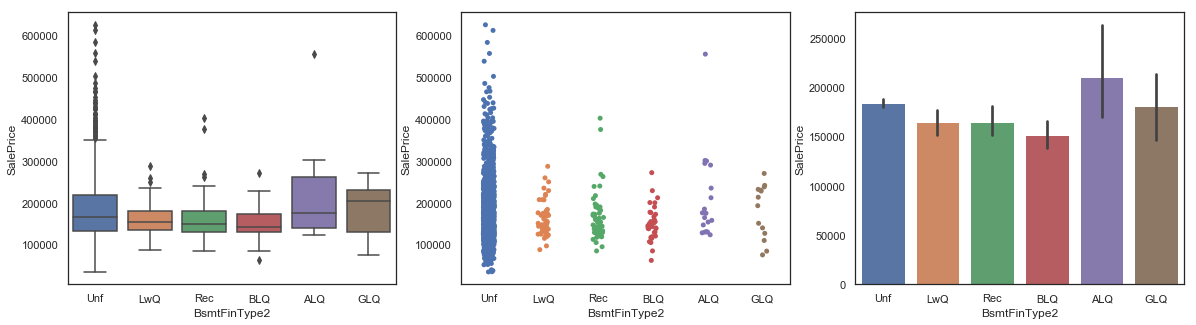

In [48]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

- 很多房子的第二个地下室没有装修完工，且价格分化很大
- 第二个装修的地下室的装修好坏对于价格影响没有像之前的那样的顺序关系(图三)
- 因此，需要将该特征转化为one-hot哑变量

In [49]:
all_data = pd.get_dummies(all_data, columns = ["BsmtFinType2"], prefix="BsmtFinType2")  # columns 参数要传入列表

all_data.head(3)
"""
columns : list-like, default None
Column names in the DataFrame to be encoded. If columns is None then all the columns with object or category dtype will be converted.

"""

'\ncolumns : list-like, default None\nColumn names in the DataFrame to be encoded. If columns is None then all the columns with object or category dtype will be converted.\n\n'

##### BsmtFinSF2

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


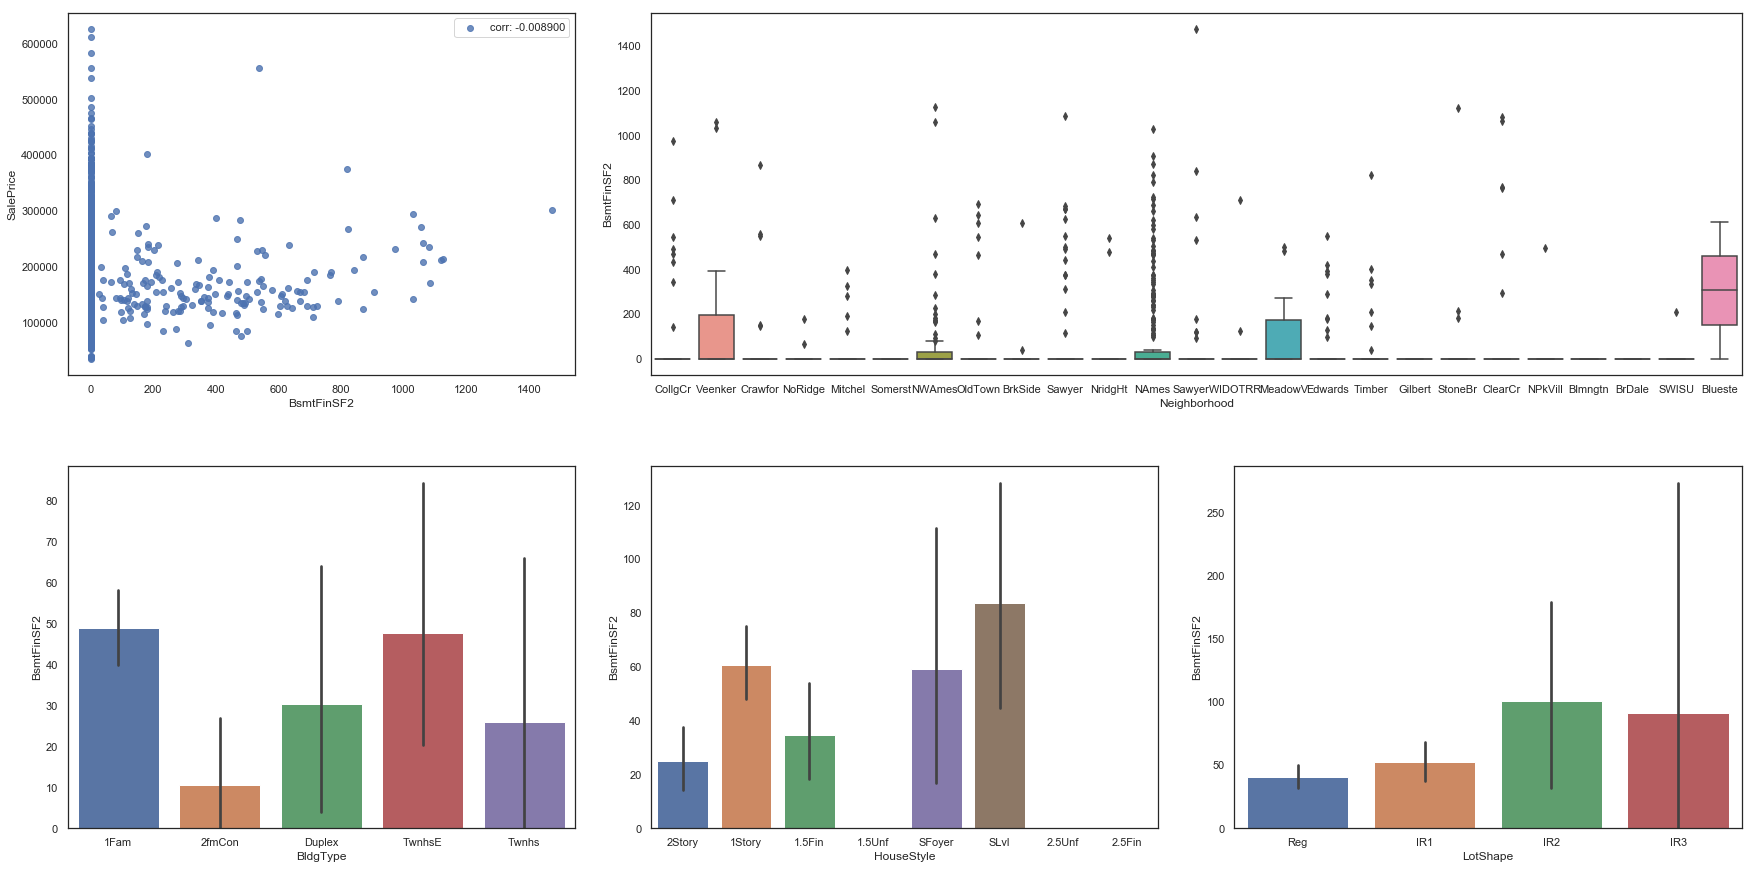

In [50]:
"""
BsmtFinSF2: Type 2 finished square feet
"""
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
# 创建画布指定子图将放置的网格的几何位置。 需要设置网格的行数和列数。 子图布局参数（例如，左，右等）可以选择性调整。
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])


g = sns.regplot(x=train['BsmtFinSF2'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF2'], train['SalePrice'])[0]))
# g= sns.regplot(x=train['BsmtFinSF1'],y=train["SalePrice"],fit_reg==False,label= "Corr:%2f" %(pearsonr(train['BsmtFinType1'],train['SalePrice'])[0]))
g.legend(loc='best')

plt.subplot(grid[0,1:])

sns.boxplot(x='Neighborhood',y='BsmtFinSF2',data=train)

plt.subplot(grid[1,0])
sns.barplot(x='BldgType',y= 'BsmtFinSF2',data=train)


plt.subplot(grid[1,1])

sns.barplot(x='HouseStyle',y ='BsmtFinSF2',data=train)

plt.subplot(grid[1,2])


sns.barplot(x='LotShape',y='BsmtFinSF2',data=train)


- 已装修完成的第二个地下室的面积与销售价格没有明显的关系
- 而且大部分的数据都是未完成装修的，与上一个特征相关性较高
- 可以采用是否完成装修来转化该特征（类似于缺失值的补充，变成是否缺失）

In [51]:
all_data['BsmtFinType2_None'].value_counts()

0    2835
1      80
Name: BsmtFinType2_None, dtype: int64

In [52]:
all_data['BsmtFinSf2_Flag'] = all_data['BsmtFinSF2'].map(lambda x:0 if x==0 else 1)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)

In [53]:
all_data['BsmtFinSf2_Flag'].value_counts()

0    2568
1     347
Name: BsmtFinSf2_Flag, dtype: int64

##### BsmtUnfSF

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


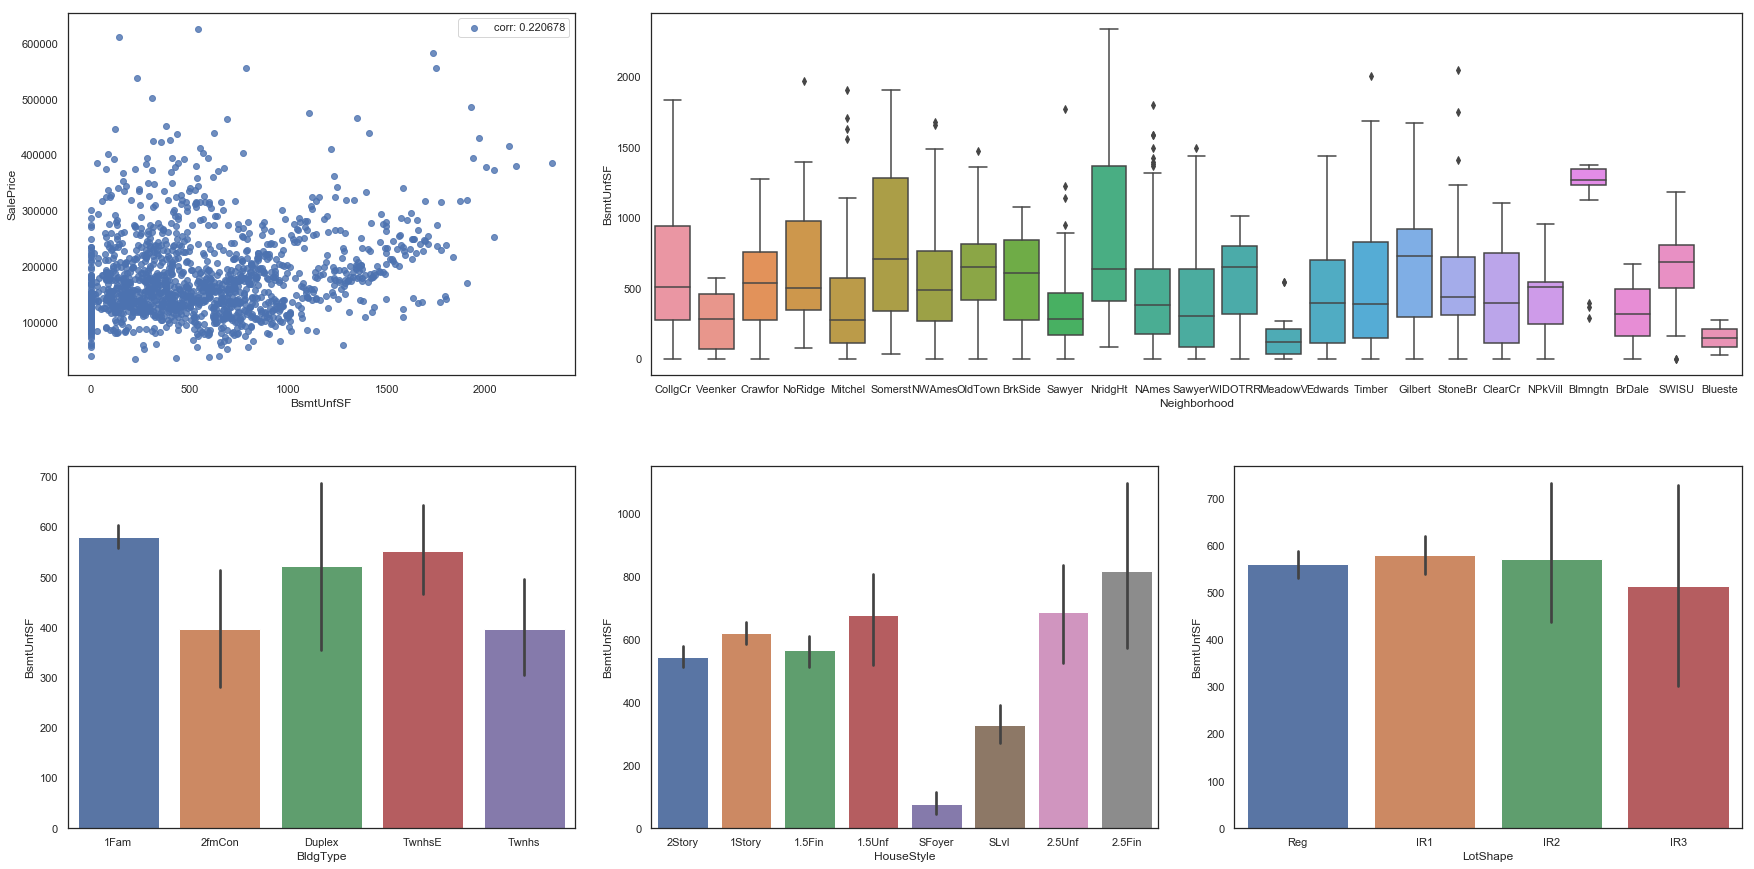

In [54]:
"""
Unfinished square feet of basement area

"""
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
# 创建画布指定子图将放置的网格的几何位置。 需要设置网格的行数和列数。 子图布局参数（例如，左，右等）可以选择性调整。
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])


g = sns.regplot(x=train['BsmtUnfSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtUnfSF'], train['SalePrice'])[0]))
# g= sns.regplot(x=train['BsmtFinSF1'],y=train["SalePrice"],fit_reg==False,label= "Corr:%2f" %(pearsonr(train['BsmtFinType1'],train['SalePrice'])[0]))
g.legend(loc='best')

plt.subplot(grid[0,1:])

sns.boxplot(x='Neighborhood',y='BsmtUnfSF',data=train)

plt.subplot(grid[1,0])
sns.barplot(x='BldgType',y= 'BsmtUnfSF',data=train)


plt.subplot(grid[1,1])

sns.barplot(x='HouseStyle',y ='BsmtUnfSF',data=train)

plt.subplot(grid[1,2])


sns.barplot(x='LotShape',y='BsmtUnfSF',data=train)

In [55]:
"""
This feature has a significant positive correlation with SalePrice, with a small proportion of data points having a value of 0.
This tells me that most houses will have some amount of square feet unfinished within the basement, and this actually positively contributes towards SalePrice.
The amount of unfinished square feet also varies widely based on location and style.
Whereas the average unfinished square feet within the basement is fairly consistent across the different lot shapes.
Since this is a continuous numeric feature with a significant correlation, I will bin this and create dummy variables.
与售价正相关，
Unfinished square feet of basement area 与lot shape 没啥关系
连续值变量，需要进行封箱操作，然后将封箱之后的特征进行one-hot转化
"""
all_data['BsmtUnfSF_Band'] = pd.cut(all_data['BsmtUnfSF'], 3,labels=['1','2','3'])
all_data.drop('BsmtUnfSF',axis=1,inplace=True)
all_data['BsmtUnfSF_Band'].unique()
all_data['BsmtUnfSF_Band'] = all_data['BsmtUnfSF_Band'].astype(int)
all_data = pd.get_dummies(all_data, columns = ["BsmtUnfSF_Band"], prefix="BsmtUnfSF")
all_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0  None             3     1Fam         3   
1      1262         0          0  None             3     1Fam         3   
2       920       866          0  None             3     1Fam         3   
3       961       756          0  None             3     1Fam         4   
4      1145      1053          0  None             4     1Fam         3   

   BsmtExposure  BsmtFullBath  BsmtHalfBath     ...      BsmtFinType2_BLQ  \
0             1           1.0           0.0     ...                     0   
1             4           0.0           1.0     ...                     0   
2             2           1.0           0.0     ...                     0   
3             1           1.0           0.0     ...                     0   
4             3           1.0           0.0     ...                     0   

  BsmtFinType2_GLQ BsmtFinType2_LwQ BsmtFinType2_None BsmtFinType2_Rec  \
0                0                0                 0                0   
1                0                0                 0                0   
2                0                0                 0                0   
3                0                0                 0                0   
4                0                0                 0                0   

   BsmtFinType2_Unf BsmtFinSf2_Flag BsmtUnfSF_1 BsmtUnfSF_2 BsmtUnfSF_3  
0                 1               0           1           0           0  
1                 1               0           1           0           0  
2                 1               0           1           0           0  
3                 1               0           1           0           0  
4                 1               0           1           0           0  

[5 rows x 140 columns]

##### TotalBsmtSF

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


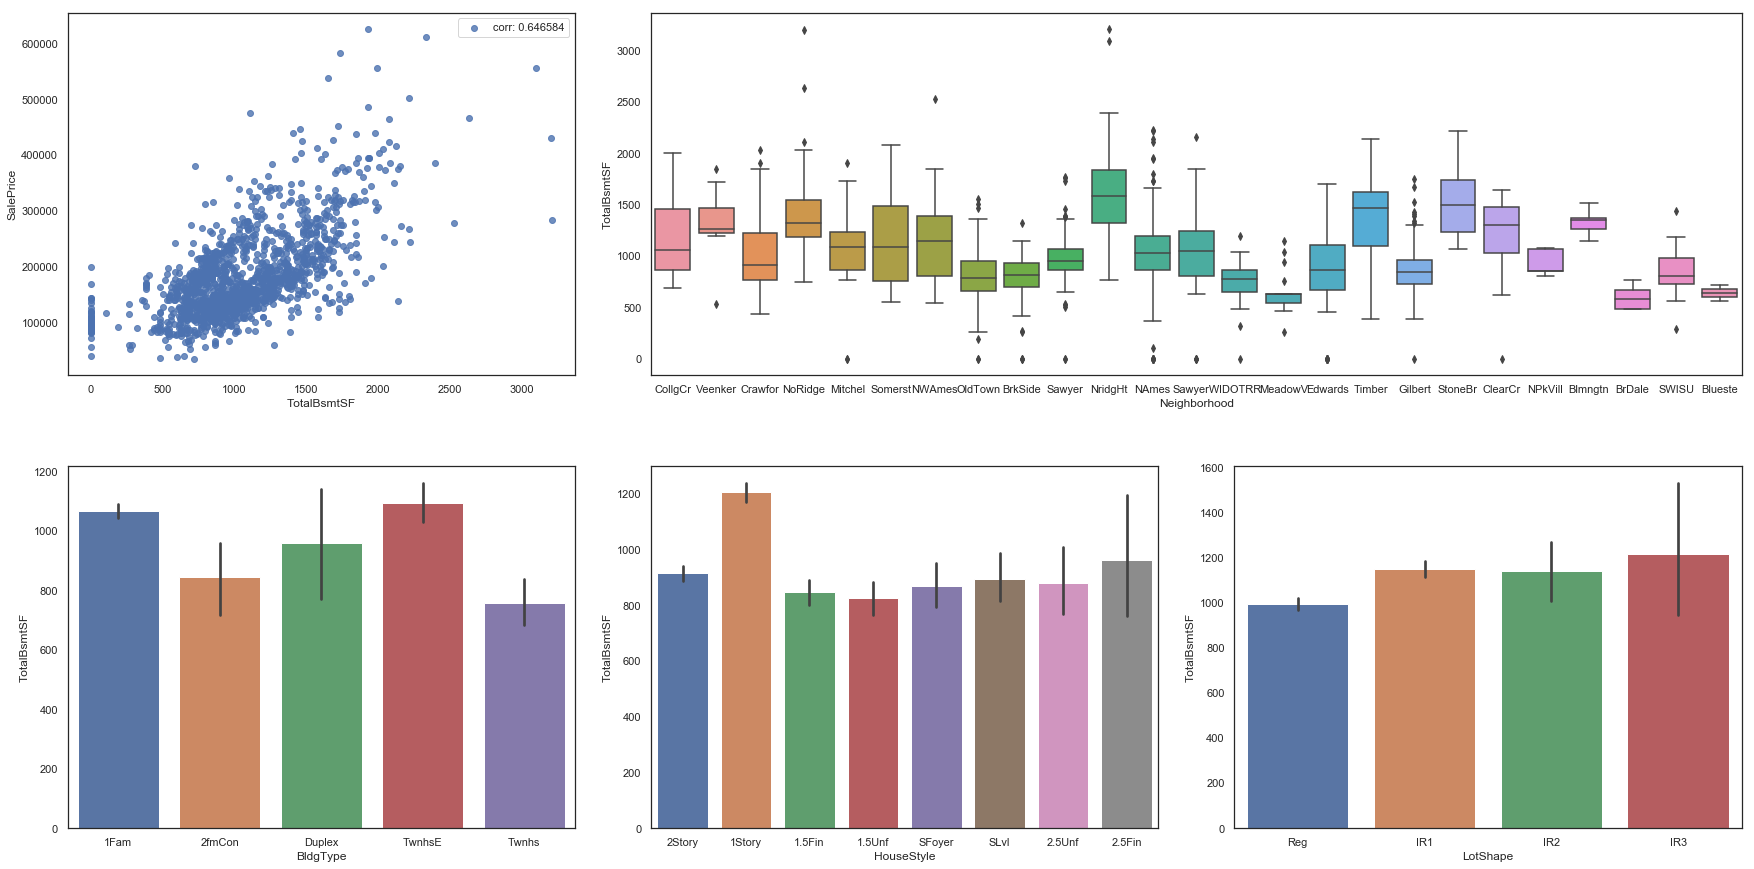

In [56]:
"""
Total square feet of basement area.
"""
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
# 创建画布指定子图将放置的网格的几何位置。 需要设置网格的行数和列数。 子图布局参数（例如，左，右等）可以选择性调整。
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])


g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalBsmtSF'], train['SalePrice'])[0]))
# g= sns.regplot(x=train['BsmtFinSF1'],y=train["SalePrice"],fit_reg==False,label= "Corr:%2f" %(pearsonr(train['BsmtFinType1'],train['SalePrice'])[0]))
g.legend(loc='best')

plt.subplot(grid[0,1:])

sns.boxplot(x='Neighborhood',y='TotalBsmtSF',data=train)

plt.subplot(grid[1,0])
sns.barplot(x='BldgType',y= 'TotalBsmtSF',data=train)


plt.subplot(grid[1,1])

sns.barplot(x='HouseStyle',y ='TotalBsmtSF',data=train)

plt.subplot(grid[1,2])


sns.barplot(x='LotShape',y='TotalBsmtSF',data=train)

In [57]:
def get_feature_corr(feature_name):
    grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
# 创建画布指定子图将放置的网格的几何位置。 需要设置网格的行数和列数。 子图布局参数（例如，左，右等）可以选择性调整。
    plt.subplots(figsize=(30,15))
    plt.subplot(grid[0,0])


    g = sns.regplot(x=train[feature_name], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train[feature_name], train['SalePrice'])[0]))
    # g= sns.regplot(x=train['BsmtFinSF1'],y=train["SalePrice"],fit_reg==False,label= "Corr:%2f" %(pearsonr(train['BsmtFinType1'],train['SalePrice'])[0]))
    g.legend(loc='best')

    plt.subplot(grid[0,1:])

    sns.boxplot(x='Neighborhood',y=feature_name,data=train)

    plt.subplot(grid[1,0])
    sns.barplot(x='BldgType',y= feature_name,data=train)


    plt.subplot(grid[1,1])

    sns.barplot(x='HouseStyle',y =feature_name,data=train)

    plt.subplot(grid[1,2])


    sns.barplot(x='LotShape',y=feature_name,data=train)
    plt.show()

##### 1stFlrSF

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


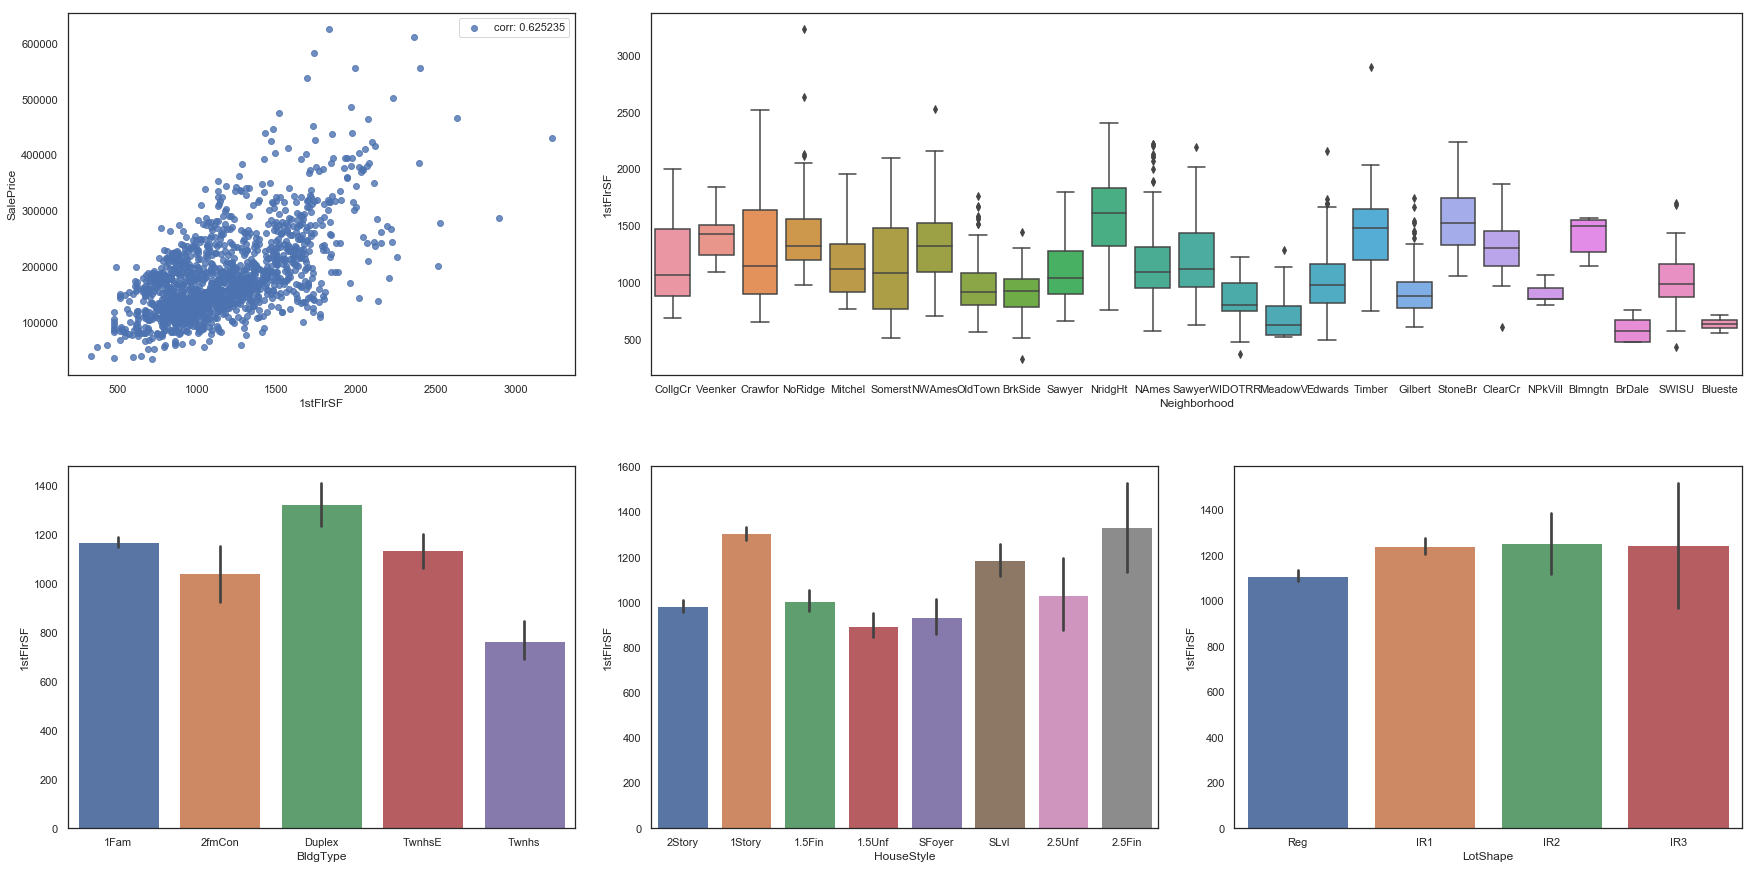

'\nFirst floor square feet.\n'

In [58]:
get_feature_corr('1stFlrSF')
"""
First floor square feet.
"""

- 第一层的面积与售价有着很强的相关性
- 不同的街区对于第一层的面积分布范围变化很大
- 对于不同的房型，第一层的面积变化不大
- 该特征为连续值，需要进行封箱然后one-hot转化

In [59]:
all_data['1stFlrSF_Band'] = pd.cut(all_data['1stFlrSF'], 6,labels=['1','2','3','4','5','6'])
all_data['1stFlrSF_Band'].unique()
all_data['1stFlrSF_Band'] = all_data['1stFlrSF_Band'].astype(int)

all_data.drop('1stFlrSF', axis=1, inplace=True)
all_data = pd.get_dummies(all_data, columns = ["1stFlrSF_Band"], prefix="1stFlrSF")
all_data.head(3)

2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  BsmtExposure  \
0       854          0  None             3     1Fam         3             1   
1         0          0  None             3     1Fam         3             4   
2       866          0  None             3     1Fam         3             2   

   BsmtFullBath  BsmtHalfBath  BsmtQual    ...     BsmtFinSf2_Flag  \
0           1.0           0.0         3    ...                   0   
1           0.0           1.0         3    ...                   0   
2           1.0           0.0         3    ...                   0   

  BsmtUnfSF_1 BsmtUnfSF_2 BsmtUnfSF_3  1stFlrSF_1 1stFlrSF_2 1stFlrSF_3  \
0           1           0           0           1          0          0   
1           1           0           0           0          1          0   
2           1           0           0           1          0          0   

  1stFlrSF_4 1stFlrSF_5 1stFlrSF_6  
0          0          0          0  
1          0          0          0  
2          0          0          0  

[3 rows x 145 columns]

##### 2ndFlrSF


c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


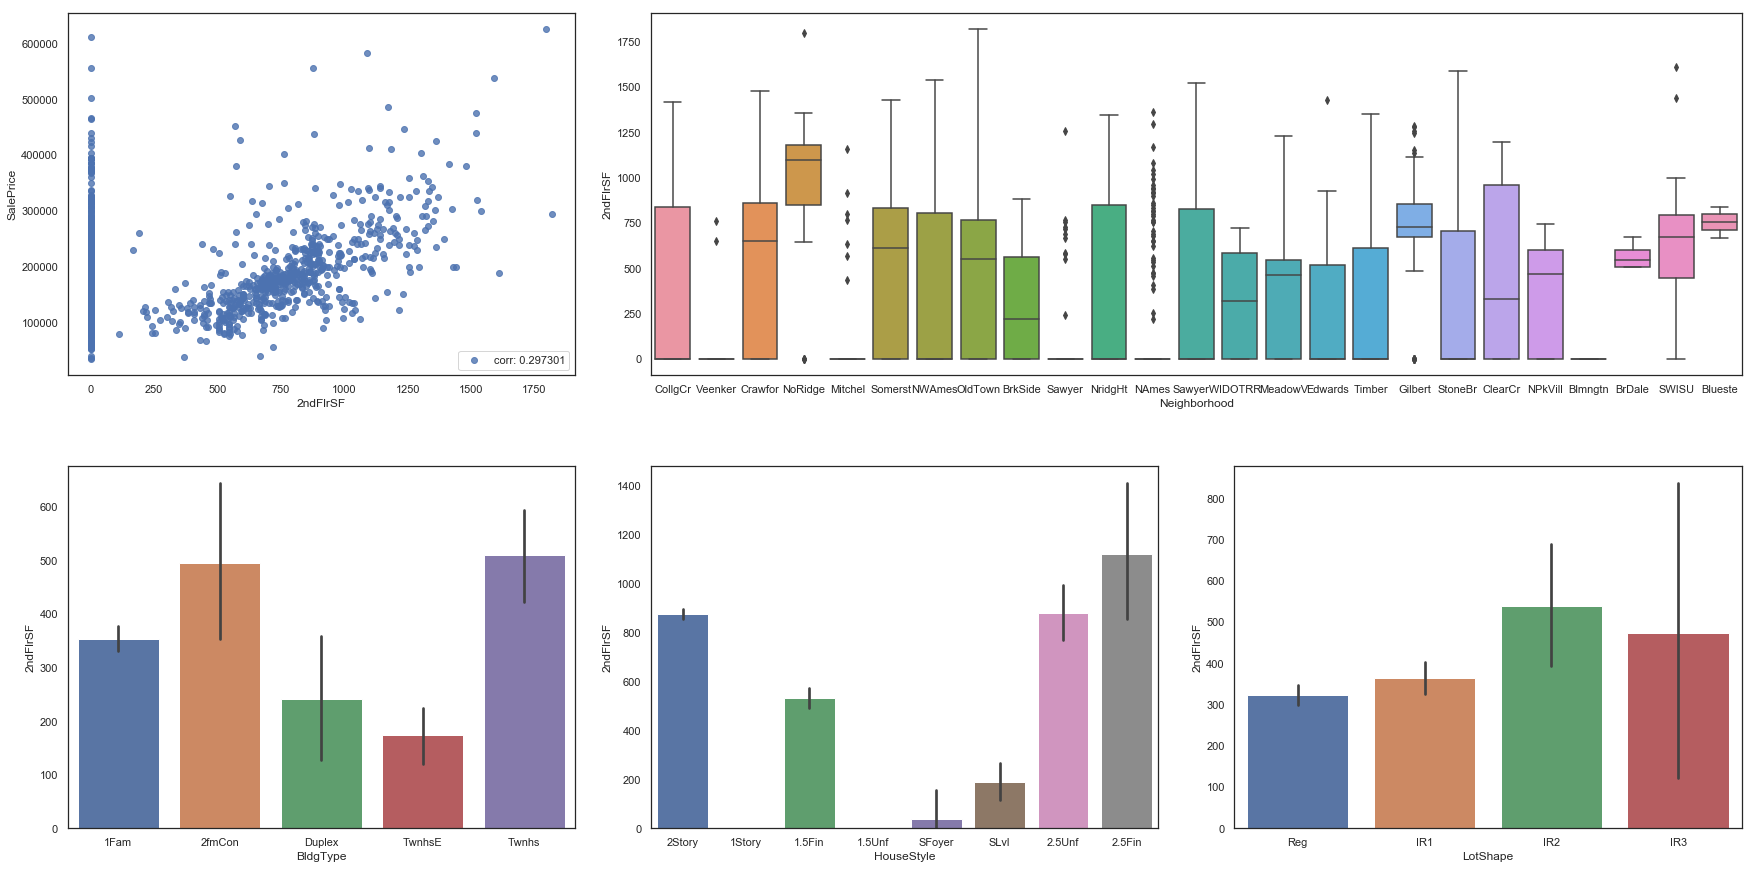

'\nSecond floor square feet.\n'

In [60]:
get_feature_corr('2ndFlrSF')
"""
Second floor square feet.
"""

- 很多房子没有第二层，所有很多房子的第二层面积为0
- 第二层面积与街区的变化很大
- 对于不同的房型，第二层的面积变化很大
- 连续值变量，进行封箱，然后进行one-hot转化

In [61]:
all_data['2ndFlrSF_Band'] = pd.cut(all_data['2ndFlrSF'], 6,labels=list('123456'))
all_data['2ndFlrSF_Band'].unique()
all_data=pd.get_dummies(all_data,columns=['2ndFlrSF_Band'],prefix="2ndFlrSF")
all_data.drop('2ndFlrSF', axis=1, inplace=True)
all_data.head()

3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  BsmtExposure  \
0          0  None             3     1Fam         3             1   
1          0  None             3     1Fam         3             4   
2          0  None             3     1Fam         3             2   
3          0  None             3     1Fam         4             1   
4          0  None             4     1Fam         3             3   

   BsmtFullBath  BsmtHalfBath  BsmtQual CentralAir    ...     1stFlrSF_3  \
0           1.0           0.0         3          Y    ...              0   
1           0.0           1.0         3          Y    ...              0   
2           1.0           0.0         3          Y    ...              0   
3           1.0           0.0         2          Y    ...              0   
4           1.0           0.0         3          Y    ...              0   

  1stFlrSF_4 1stFlrSF_5  1stFlrSF_6 2ndFlrSF_1 2ndFlrSF_2 2ndFlrSF_3  \
0          0          0           0          0          0          1   
1          0          0           0          1          0          0   
2          0          0           0          0          0          1   
3          0          0           0          0          0          1   
4          0          0           0          0          0          0   

  2ndFlrSF_4 2ndFlrSF_5 2ndFlrSF_6  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          1          0          0  

[5 rows x 150 columns]

##### LowQualFinSF

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


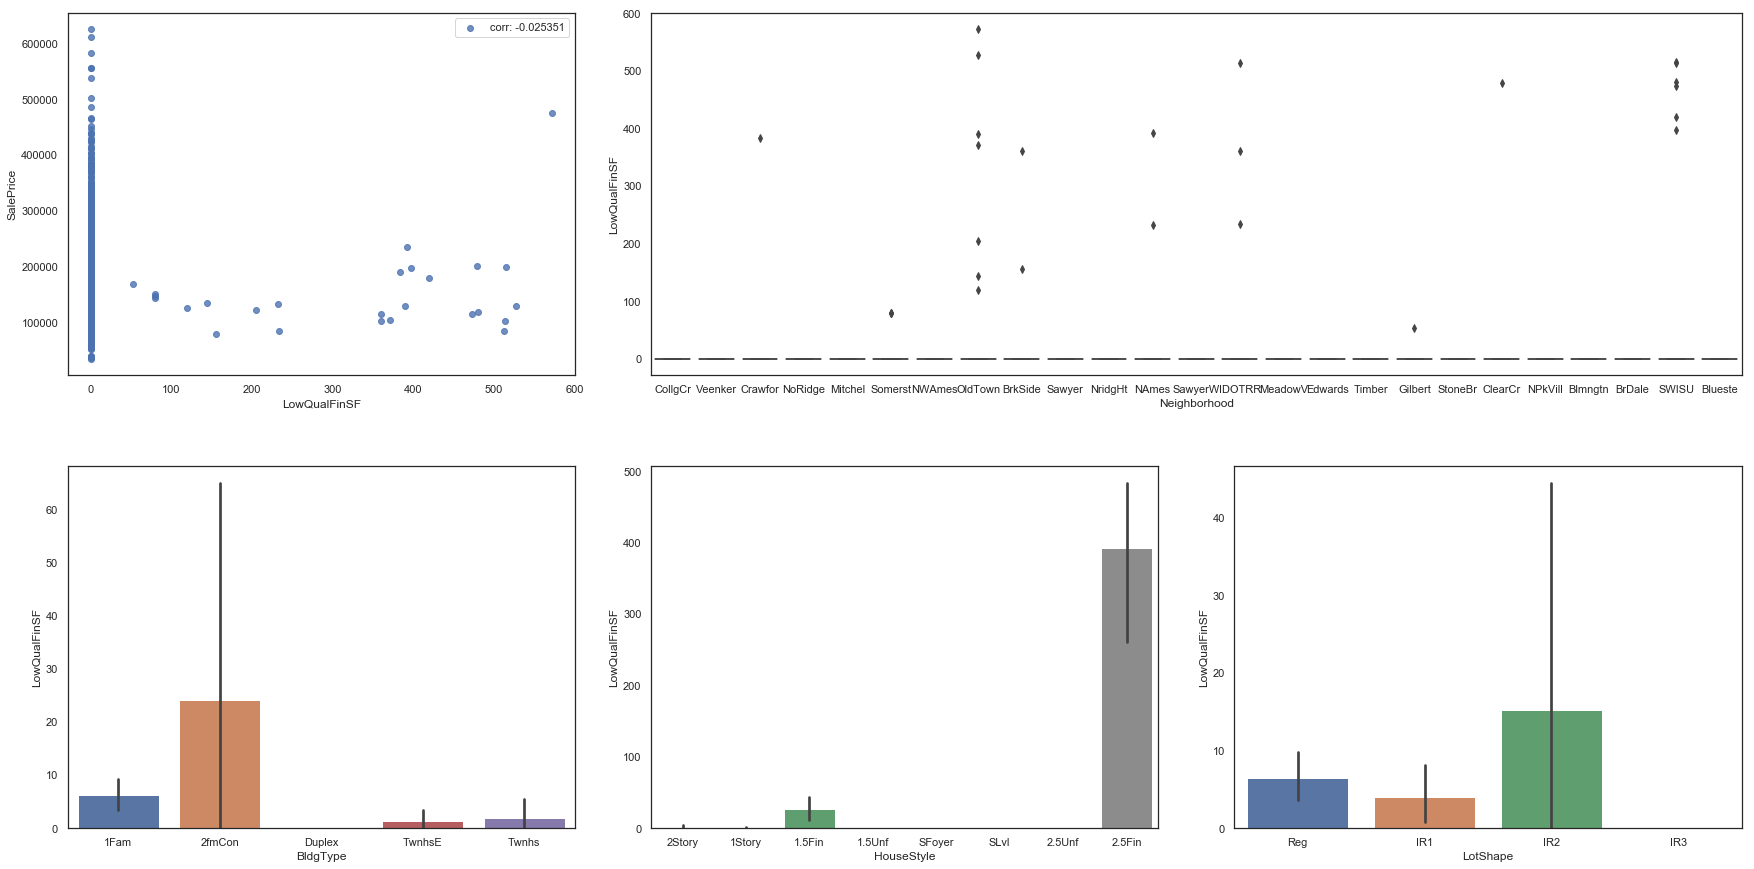

'\nLow quality finished square feet (all floors)\n'

In [62]:
get_feature_corr('LowQualFinSF')

'''
Low quality finished square feet (all floors)
'''

- 针对该特征可以将特征转化为0-1

In [63]:
all_data['LowQualFinSF_Flag'] = all_data['LowQualFinSF'].map(lambda x:0 if x==0 else 1)
all_data.drop('LowQualFinSF', axis=1, inplace=True)

##### BsmtHalfBath BsmtFullBath HalfBath FullBath

In [64]:
all_data['TotalBathrooms'] = all_data['BsmtHalfBath'] + all_data['BsmtFullBath'] + all_data['HalfBath'] + all_data['FullBath']

columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
all_data.drop(columns, axis=1, inplace=True)

In [65]:
def get_feature_corr1(feature_name,order=None):
    plt.subplots(figsize =(20, 5))

    plt.subplot(1, 3, 1)
    sns.boxplot(x=feature_name, y="SalePrice", data=train,order=order)

    plt.subplot(1, 3, 2)
    sns.stripplot(x=feature_name, y="SalePrice", data=train, size = 5, jitter = True ,order=order);

    plt.subplot(1, 3, 3)
    sns.barplot(x=feature_name, y="SalePrice", data=train,order=order)
    plt.show()

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


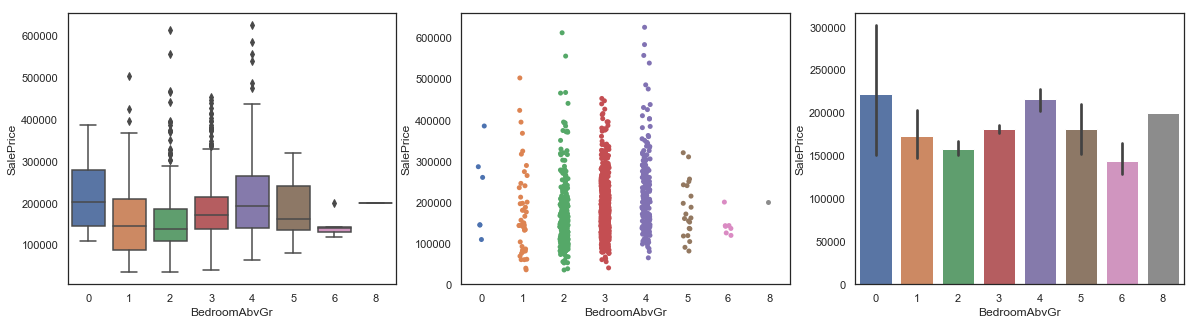

'\nBedrooms above grade (does not include basement bedrooms)\n'

In [66]:
get_feature_corr1('BedroomAbvGr',order=None)
"""
Bedrooms above grade (does not include basement bedrooms)
"""

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


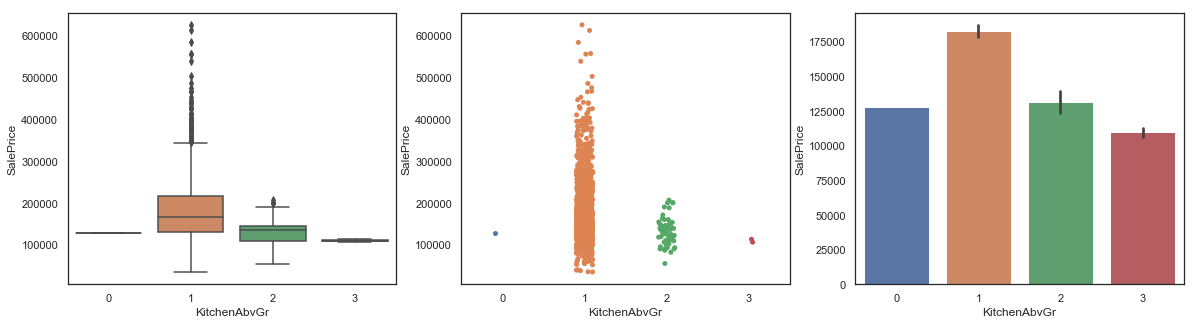

In [67]:
get_feature_corr1('KitchenAbvGr',order=None)

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


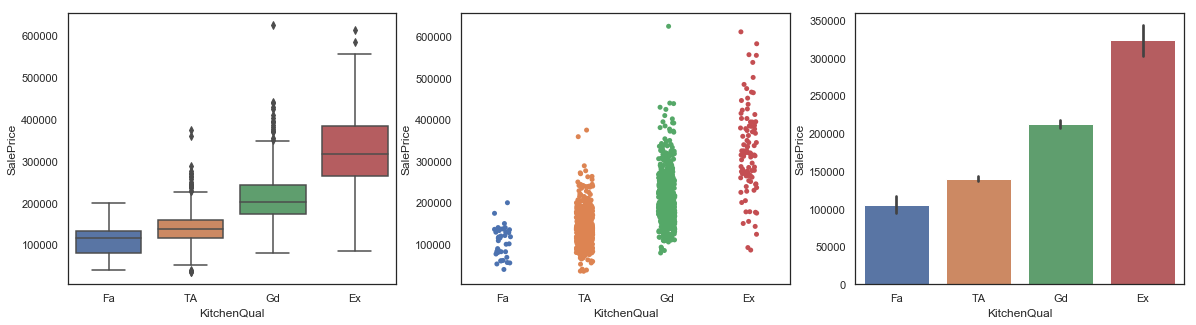


该特征需要转化category with order



In [68]:
get_feature_corr1('KitchenQual',order=['Fa','TA','Gd','Ex'])
print("""
该特征需要转化category with order
""")

In [69]:
all_data['KitchenQual'] = all_data['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all_data['KitchenQual'].unique()

array([3, 2, 4, 1], dtype=int64)

##### TotRmsAbvGrd

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


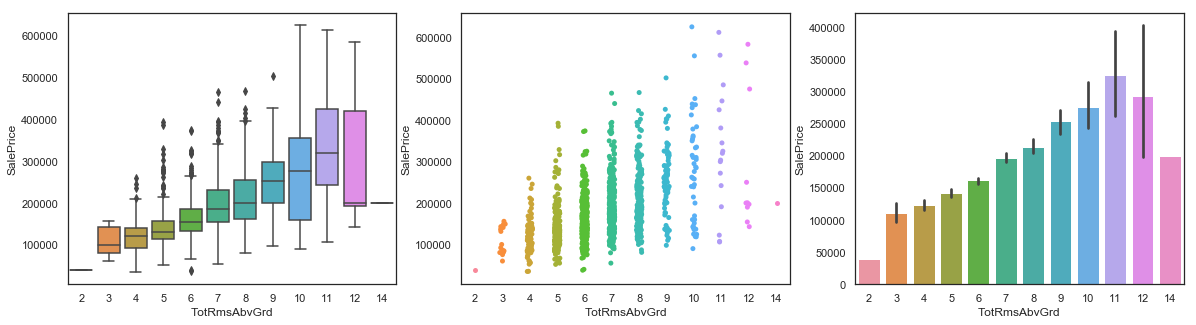

In [70]:
get_feature_corr1('TotRmsAbvGrd')

##### Fireplaces

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


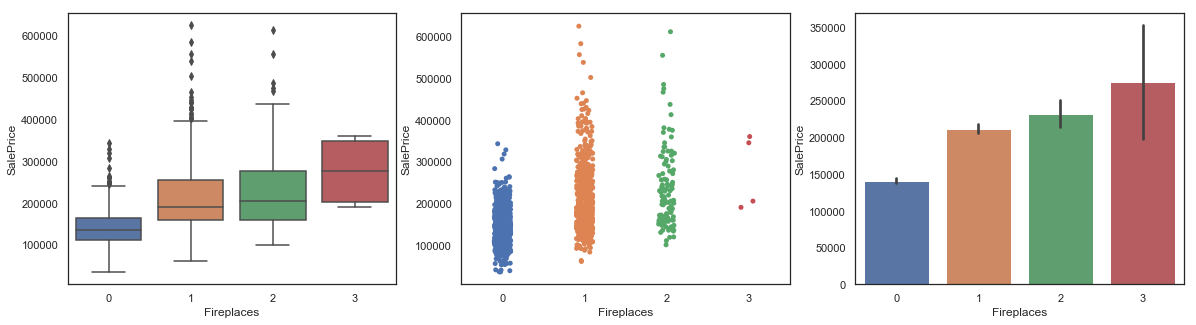

In [71]:
get_feature_corr1('Fireplaces')

##### FireplaceQu

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


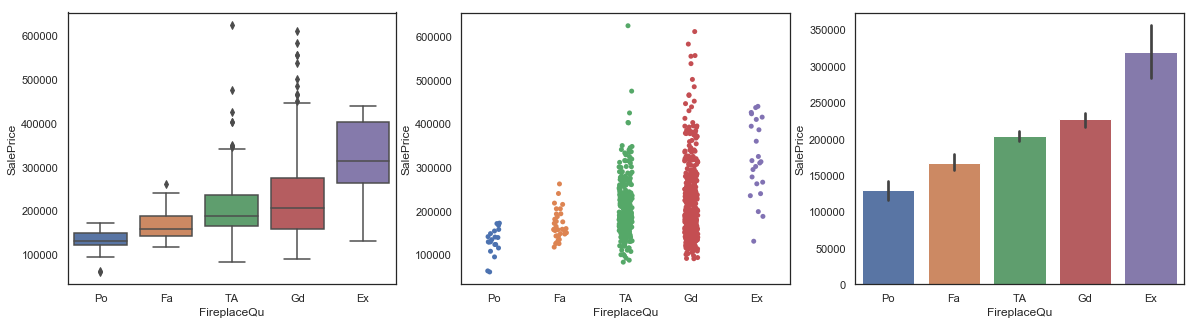

In [72]:
get_feature_corr1('FireplaceQu',order=['Po','Fa','TA','Gd','Ex'])

In [73]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all_data['FireplaceQu'].unique()

array([0, 3, 4, 2, 5, 1], dtype=int64)

##### GrLivArea

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


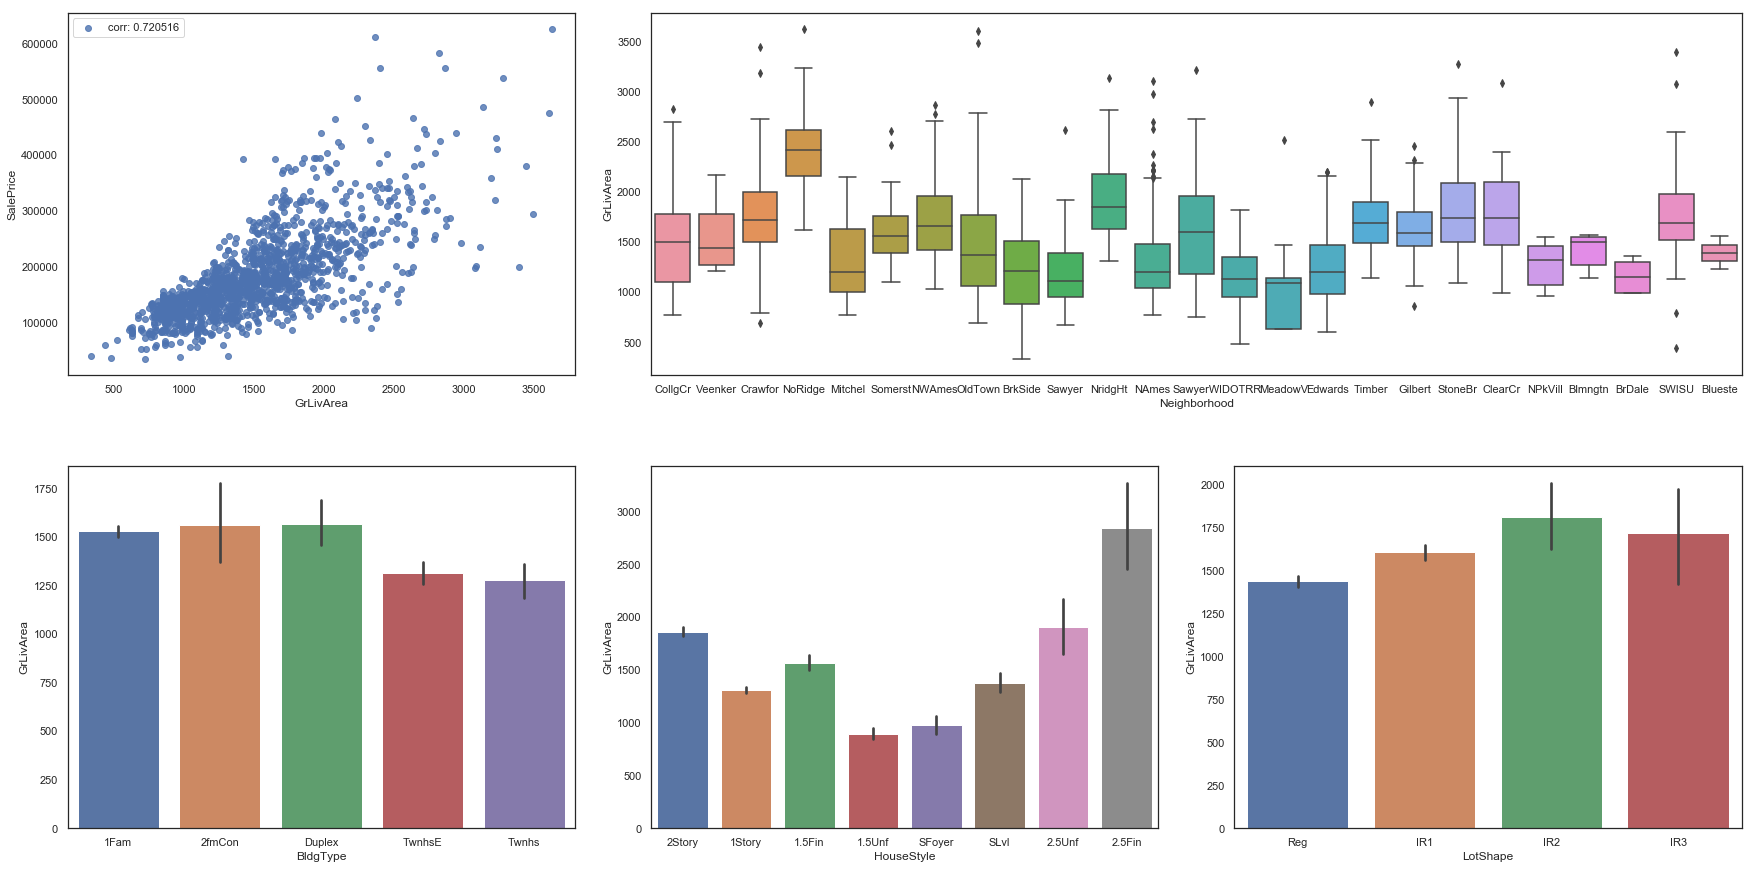

In [74]:
get_feature_corr('GrLivArea')

- 特征为连续值，且与售价相关性非常强
- 封箱然后转化为one-hot特征

In [75]:
all_data['GrLivArea_Band'] = pd.cut(all_data['GrLivArea'], 6,labels=list('123456'))
all_data['GrLivArea_Band'].unique()
all_data['GrLivArea_Band'] = all_data['GrLivArea_Band'].astype(int)
all_data.drop('GrLivArea',axis=1,inplace=True)
all_data = pd.get_dummies(all_data, columns = ["GrLivArea_Band"], prefix="GrLivArea")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  BsmtExposure  BsmtQual  \
0          0  None             3     1Fam         3             1         3   
1          0  None             3     1Fam         3             4         3   
2          0  None             3     1Fam         3             2         3   

  CentralAir Condition1 Condition2     ...     2ndFlrSF_5  2ndFlrSF_6  \
0          Y       Norm       Norm     ...              0           0   
1          Y      Feedr       Norm     ...              0           0   
2          Y       Norm       Norm     ...              0           0   

  LowQualFinSF_Flag TotalBathrooms GrLivArea_1 GrLivArea_2 GrLivArea_3  \
0                 0            4.0           0           1           0   
1                 0            3.0           0           1           0   
2                 0            4.0           0           1           0   

   GrLivArea_4  GrLivArea_5 GrLivArea_6  
0            0            0           0  
1            0            0           0  
2            0            0           0  

[3 rows x 152 columns]

##### MSSubClass

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


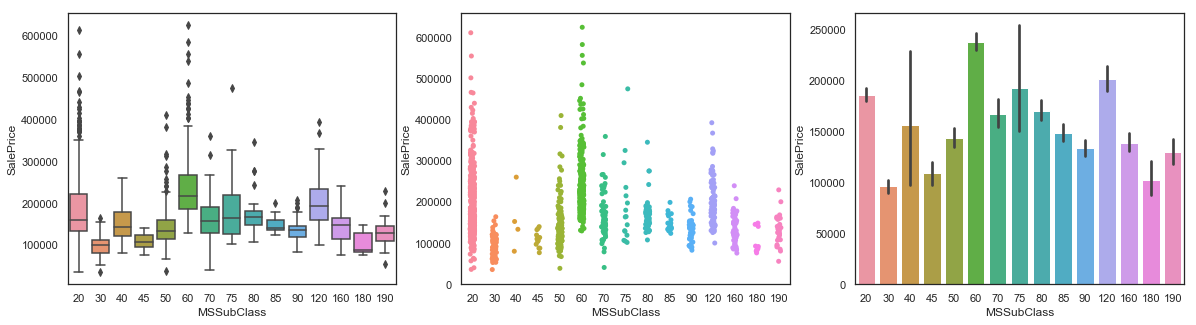

In [76]:
get_feature_corr1('MSSubClass')

In [77]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

all_data = pd.get_dummies(all_data, columns = ["MSSubClass"], prefix="MSSubClass")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  BsmtExposure  BsmtQual  \
0          0  None             3     1Fam         3             1         3   
1          0  None             3     1Fam         3             4         3   
2          0  None             3     1Fam         3             2         3   

  CentralAir Condition1 Condition2      ...      MSSubClass_30  MSSubClass_40  \
0          Y       Norm       Norm      ...                  0              0   
1          Y      Feedr       Norm      ...                  0              0   
2          Y       Norm       Norm      ...                  0              0   

  MSSubClass_45 MSSubClass_50 MSSubClass_60 MSSubClass_70 MSSubClass_75  \
0             0             0             1             0             0   
1             0             0             0             0             0   
2             0             0             1             0             0   

   MSSubClass_80  MSSubClass_85 MSSubClass_90  
0              0              0             0  
1              0              0             0  
2              0              0             0  

[3 rows x 167 columns]

##### BldgType

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


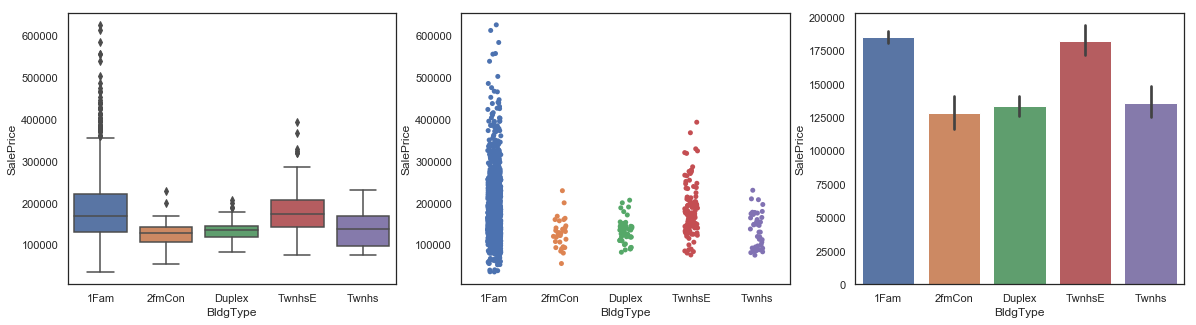

In [78]:
get_feature_corr1('BldgType')

In [79]:
all_data['BldgType'] = all_data['BldgType'].astype(str)

all_data = pd.get_dummies(all_data, columns = ["BldgType"], prefix="BldgType")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...        MSSubClass_70  \
0       Norm       Norm      SBrkr       ...                    0   
1      Feedr       Norm      SBrkr       ...                    0   
2       Norm       Norm      SBrkr       ...                    0   

  MSSubClass_75 MSSubClass_80 MSSubClass_85 MSSubClass_90 BldgType_1Fam  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   

   BldgType_2fmCon  BldgType_Duplex BldgType_Twnhs BldgType_TwnhsE  
0                0                0              0               0  
1                0                0              0               0  
2                0                0              0               0  

[3 rows x 171 columns]

##### HouseStyle

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


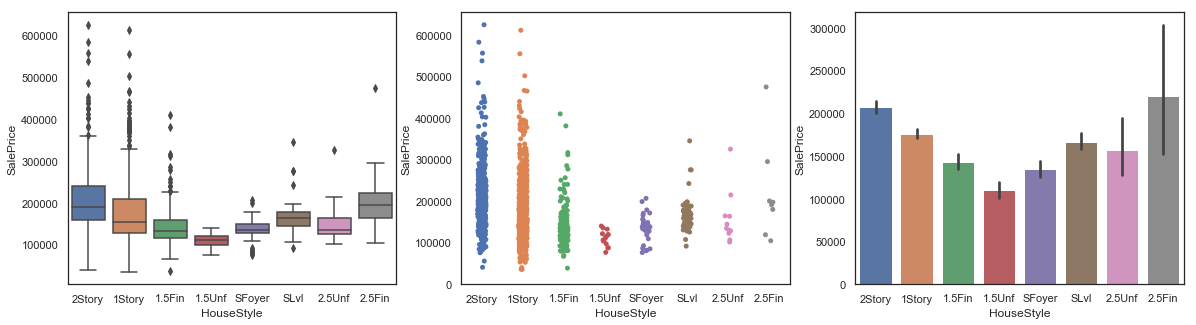

In [80]:
get_feature_corr1('HouseStyle')

In [81]:
all_data['HouseStyle'] = all_data['HouseStyle'].map({"2Story":"2Story", "1Story":"1Story", "1.5Fin":"1.5Story", "1.5Unf":"1.5Story", 
                                                     "SFoyer":"SFoyer", "SLvl":"SLvl", "2.5Unf":"2.5Story", "2.5Fin":"2.5Story"})

all_data = pd.get_dummies(all_data, columns = ["HouseStyle"], prefix="HouseStyle")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...        BldgType_2fmCon  \
0       Norm       Norm      SBrkr       ...                      0   
1      Feedr       Norm      SBrkr       ...                      0   
2       Norm       Norm      SBrkr       ...                      0   

  BldgType_Duplex BldgType_Twnhs BldgType_TwnhsE HouseStyle_1.5Story  \
0               0              0               0                   0   
1               0              0               0                   0   
2               0              0               0                   0   

  HouseStyle_1Story  HouseStyle_2.5Story  HouseStyle_2Story HouseStyle_SFoyer  \
0                 0                    0                  1                 0   
1                 1                    0                  0                 0   
2                 0                    0                  1                 0   

  HouseStyle_SLvl  
0               0  
1               0  
2               0  

[3 rows x 176 columns]

##### OverallQual

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


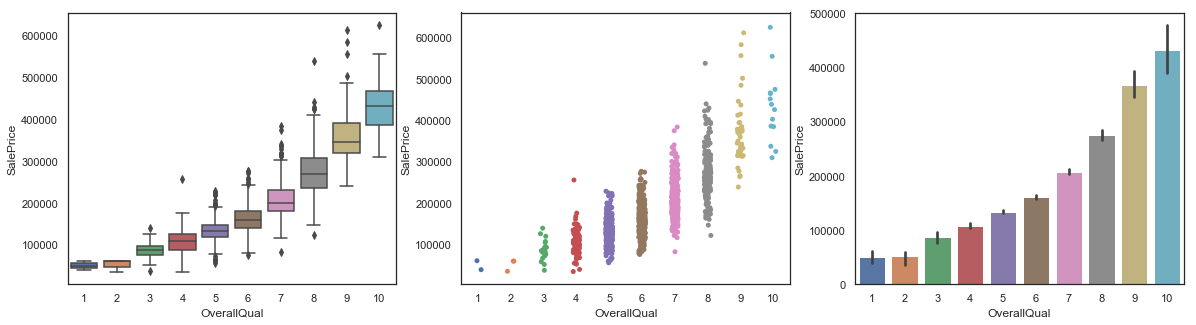

In [82]:
get_feature_corr1('OverallQual')

##### OverallCond

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


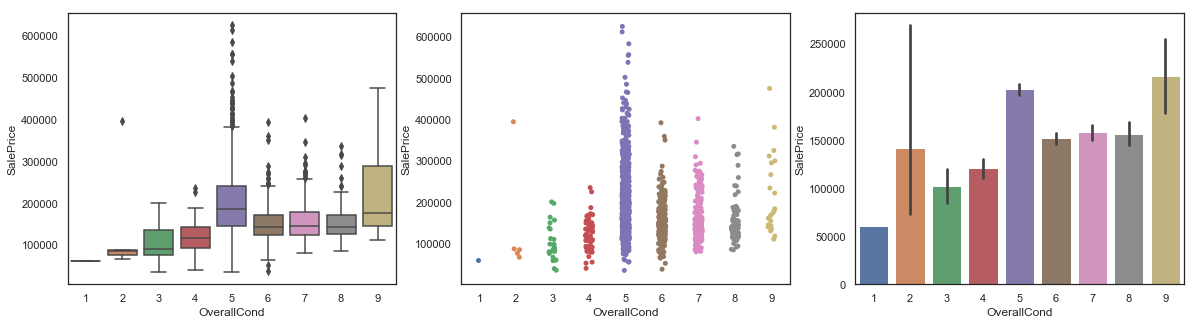

In [83]:
get_feature_corr1('OverallCond')

##### YearRemodAdd

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


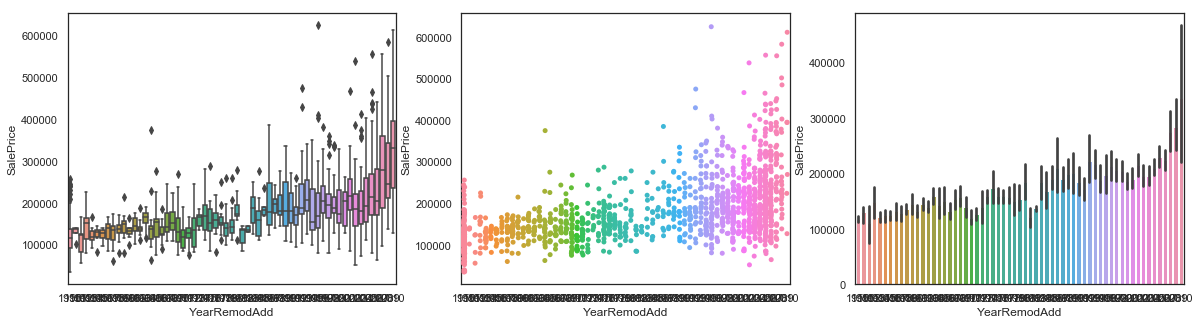

In [84]:
get_feature_corr1('YearRemodAdd')

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


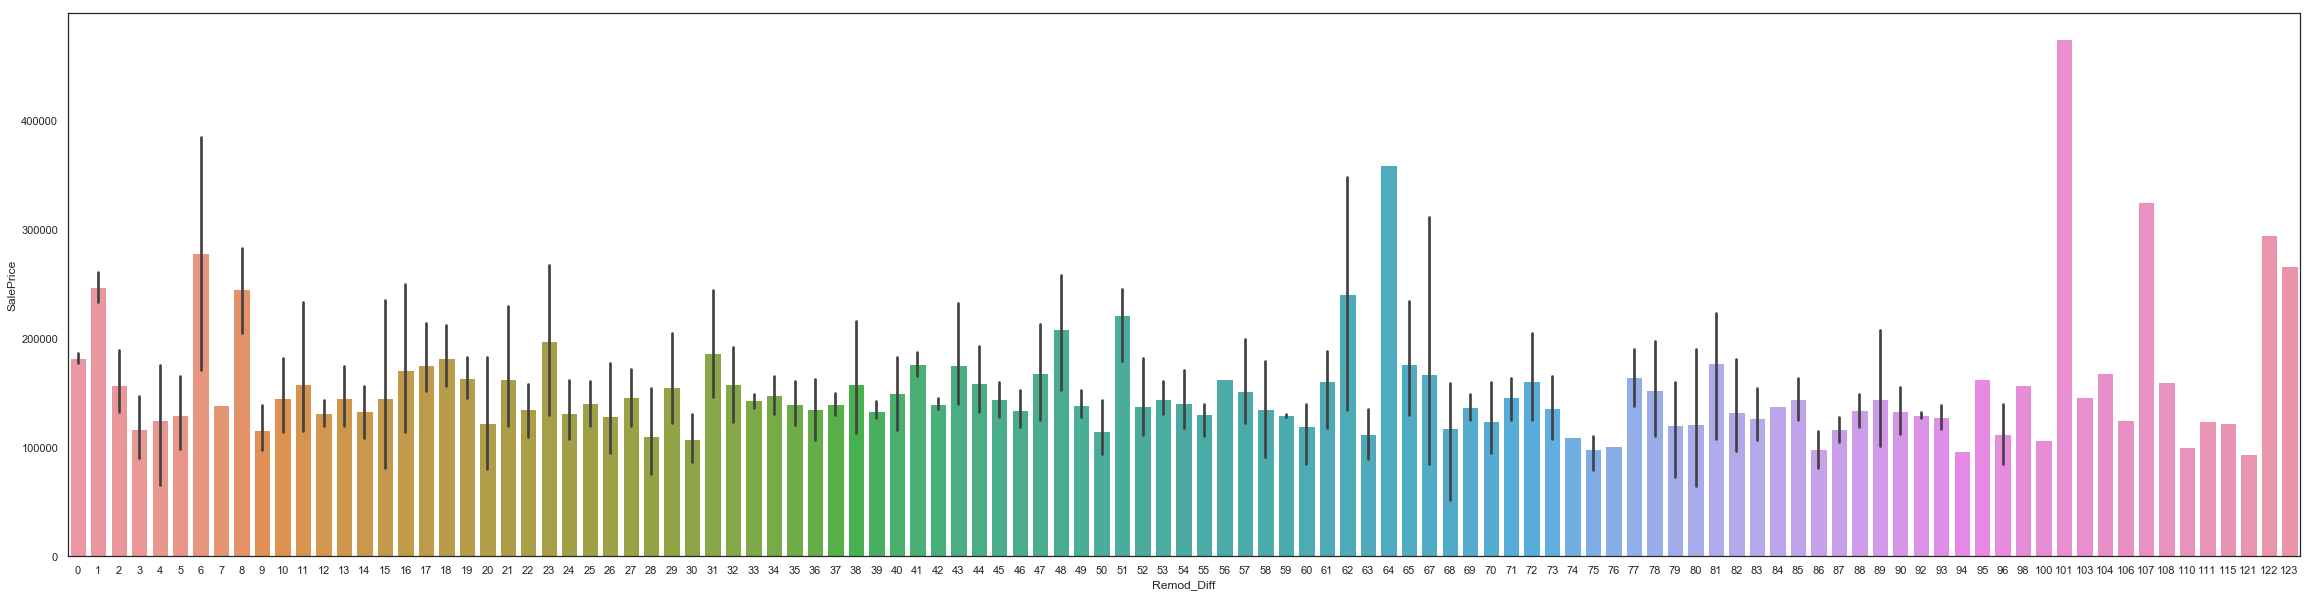

In [85]:
train['Remod_Diff'] = train['YearRemodAdd'] - train['YearBuilt']

plt.subplots(figsize =(40, 10))
sns.barplot(x="Remod_Diff", y="SalePrice", data=train);

In [86]:
all_data['Remod_Diff'] = all_data['YearRemodAdd'] - all_data['YearBuilt']

all_data.drop('YearRemodAdd', axis=1, inplace=True)

##### YearBuilt

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


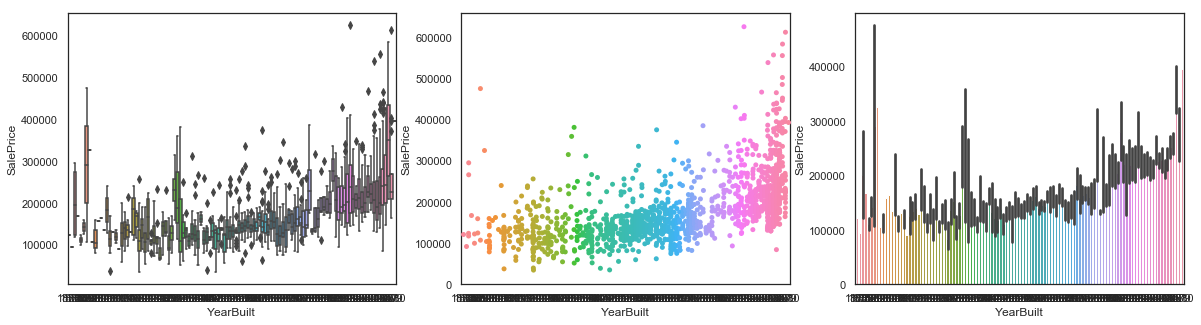

In [87]:
get_feature_corr1('YearBuilt')

In [88]:
all_data['YearBuilt_Band'] = pd.cut(all_data['YearBuilt'], 7,labels=list('1234567'))
all_data['YearBuilt_Band'].unique()
all_data['YearBuilt_Band'] = all_data['YearBuilt_Band'].astype(int)
all_data.drop('YearBuilt',axis=1,inplace=True)
all_data = pd.get_dummies(all_data, columns = ["YearBuilt_Band"], prefix="YearBuilt")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical     ...      HouseStyle_SFoyer  \
0       Norm       Norm      SBrkr     ...                      0   
1      Feedr       Norm      SBrkr     ...                      0   
2       Norm       Norm      SBrkr     ...                      0   

  HouseStyle_SLvl Remod_Diff YearBuilt_1 YearBuilt_2 YearBuilt_3  YearBuilt_4  \
0               0          0           0           0           0            0   
1               0          0           0           0           0            0   
2               0          1           0           0           0            0   

   YearBuilt_5 YearBuilt_6 YearBuilt_7  
0            0           0           1  
1            0           1           0  
2            0           0           1  

[3 rows x 182 columns]

##### Foundation

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


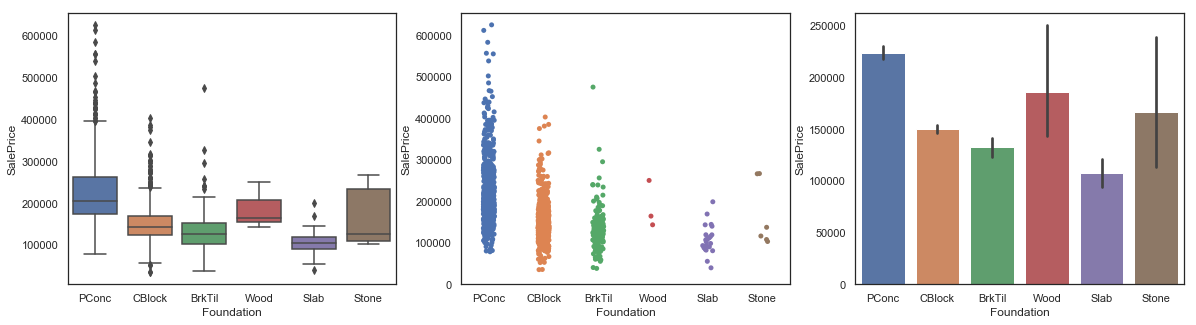

In [89]:
get_feature_corr1('Foundation')

In [90]:
all_data = pd.get_dummies(all_data, columns = ["Foundation"], prefix="Foundation")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...         YearBuilt_4 YearBuilt_5  \
0       Norm       Norm      SBrkr       ...                   0           0   
1      Feedr       Norm      SBrkr       ...                   0           0   
2       Norm       Norm      SBrkr       ...                   0           0   

  YearBuilt_6 YearBuilt_7 Foundation_BrkTil Foundation_CBlock  \
0           0           1                 0                 0   
1           1           0                 0                 1   
2           0           1                 0                 0   

   Foundation_PConc  Foundation_Slab Foundation_Stone  Foundation_Wood  
0                 1                0                0                0  
1                 0                0                0                0  
2                 1                0                0                0  

[3 rows x 187 columns]

##### Functional

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


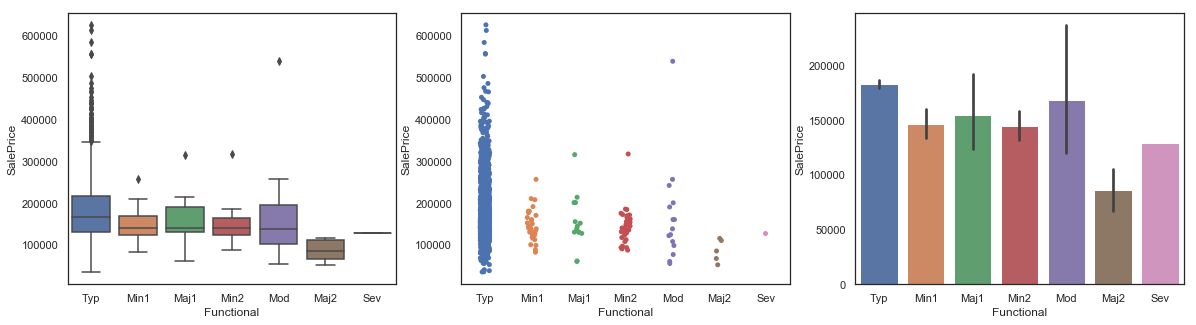

In [91]:
get_feature_corr1('Functional')

In [92]:
all_data['Functional'] = all_data['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})
all_data['Functional'].unique()

array([7, 6, 3, 5, 4, 2, 1], dtype=int64)

##### RoofStyle

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


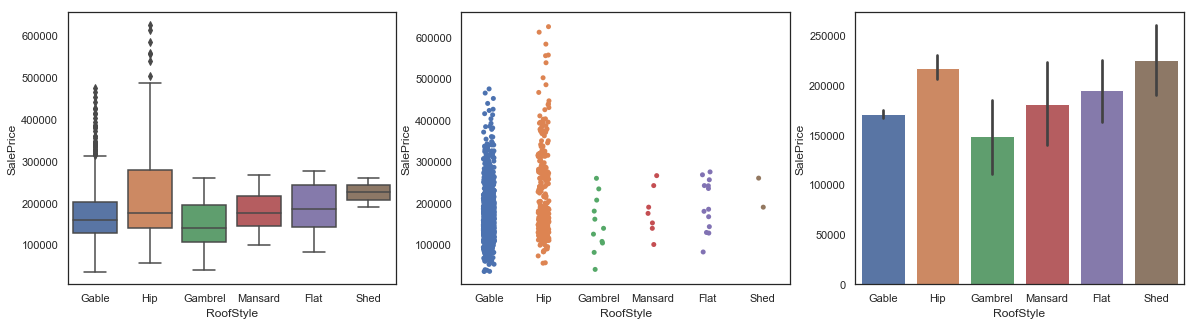

In [93]:
get_feature_corr1('RoofStyle')

In [94]:
all_data = pd.get_dummies(all_data, columns = ["RoofStyle"], prefix="RoofStyle")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...        Foundation_PConc  \
0       Norm       Norm      SBrkr       ...                       1   
1      Feedr       Norm      SBrkr       ...                       0   
2       Norm       Norm      SBrkr       ...                       1   

  Foundation_Slab Foundation_Stone Foundation_Wood RoofStyle_Flat  \
0               0                0               0              0   
1               0                0               0              0   
2               0                0               0              0   

  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0               1                  0              0                  0   
1               1                  0              0                  0   
2               1                  0              0                  0   

   RoofStyle_Shed  
0               0  
1               0  
2               0  

[3 rows x 192 columns]

##### RoofMatl

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


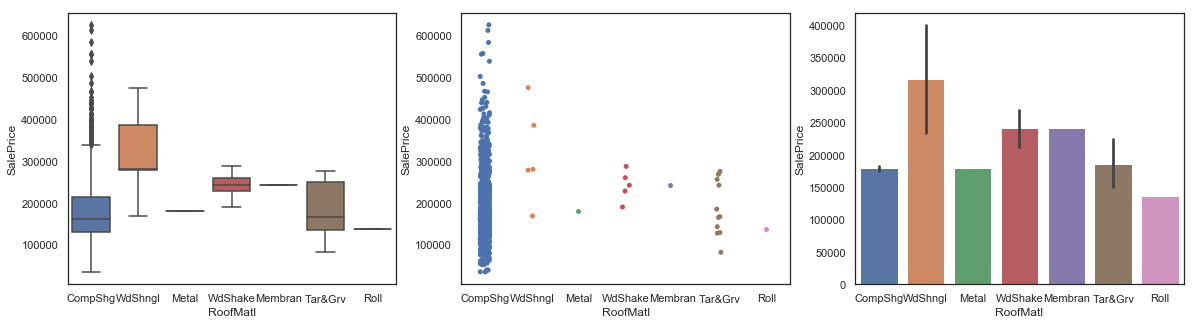

In [95]:
"""
Roof material.
"""

get_feature_corr1('RoofMatl')

In [96]:
all_data = pd.get_dummies(all_data, columns = ["RoofMatl"], prefix="RoofMatl")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical        ...         RoofStyle_Hip  \
0       Norm       Norm      SBrkr        ...                     0   
1      Feedr       Norm      SBrkr        ...                     0   
2       Norm       Norm      SBrkr        ...                     0   

  RoofStyle_Mansard RoofStyle_Shed RoofMatl_CompShg RoofMatl_Membran  \
0                 0              0                1                0   
1                 0              0                1                0   
2                 0              0                1                0   

  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  \
0              0              0                 0                 0   
1              0              0                 0                 0   
2              0              0                 0                 0   

   RoofMatl_WdShngl  
0                 0  
1                 0  
2                 0  

[3 rows x 198 columns]

##### Exterior1st & Exterior2nd

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


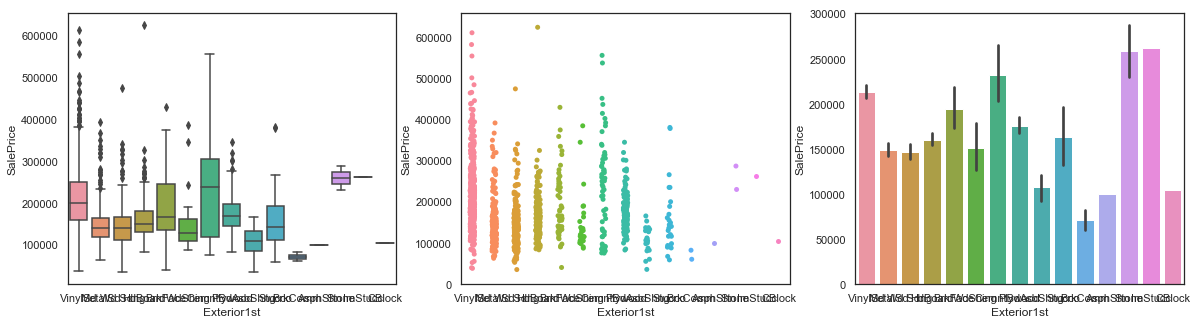

In [97]:
get_feature_corr1('Exterior1st')

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


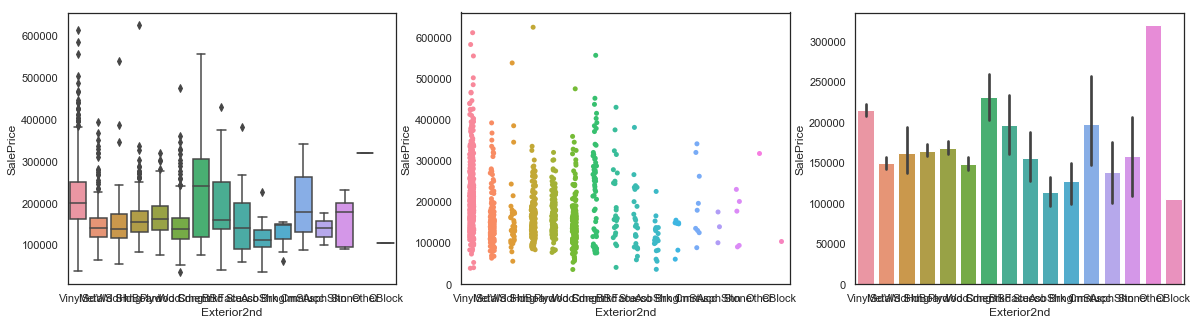

In [98]:
get_feature_corr1('Exterior2nd')

In [99]:
def Exter2(col):
    if col['Exterior2nd'] == col['Exterior1st']:
        return 1
    else:
        return 0
    
all_data['ExteriorMatch_Flag'] = all_data.apply(Exter2, axis=1)
all_data.drop('Exterior2nd', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["Exterior1st"], prefix="Exterior1st")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical         ...          Exterior1st_CemntBd  \
0       Norm       Norm      SBrkr         ...                            0   
1      Feedr       Norm      SBrkr         ...                            0   
2       Norm       Norm      SBrkr         ...                            0   

  Exterior1st_HdBoard Exterior1st_ImStucc Exterior1st_MetalSd  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   0   

   Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng Exterior1st_WdShing  
0                    1                    0                   0  
1                    0                    0                   0  
2                    1                    0                   0  

[3 rows x 212 columns]

##### MasVnrType

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


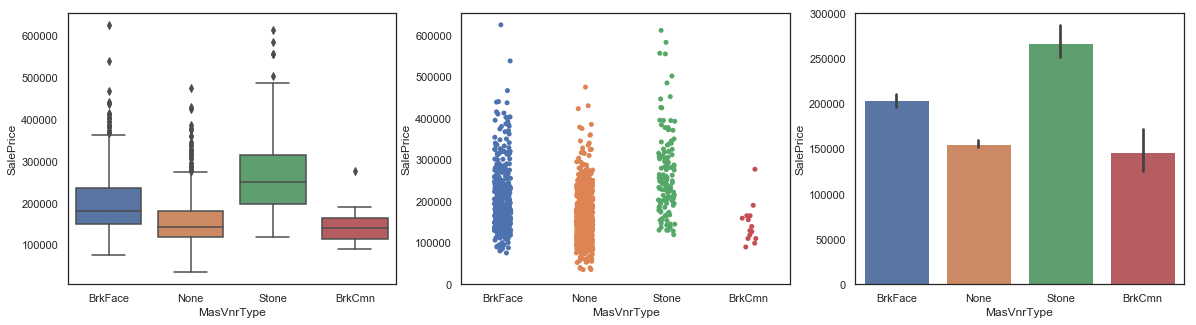

In [100]:
get_feature_corr1('MasVnrType')

In [101]:
all_data = pd.get_dummies(all_data, columns = ["MasVnrType"], prefix="MasVnrType")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...         Exterior1st_Plywood  \
0       Norm       Norm      SBrkr       ...                           0   
1      Feedr       Norm      SBrkr       ...                           0   
2       Norm       Norm      SBrkr       ...                           0   

  Exterior1st_Stone Exterior1st_Stucco Exterior1st_VinylSd  \
0                 0                  0                   1   
1                 0                  0                   0   
2                 0                  0                   1   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  MasVnrType_BrkCmn  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   

   MasVnrType_BrkFace  MasVnrType_None MasVnrType_Stone  
0                   1                0                0  
1                   0                1                0  
2                   1                0                0  

[3 rows x 215 columns]

##### MasVnrArea

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


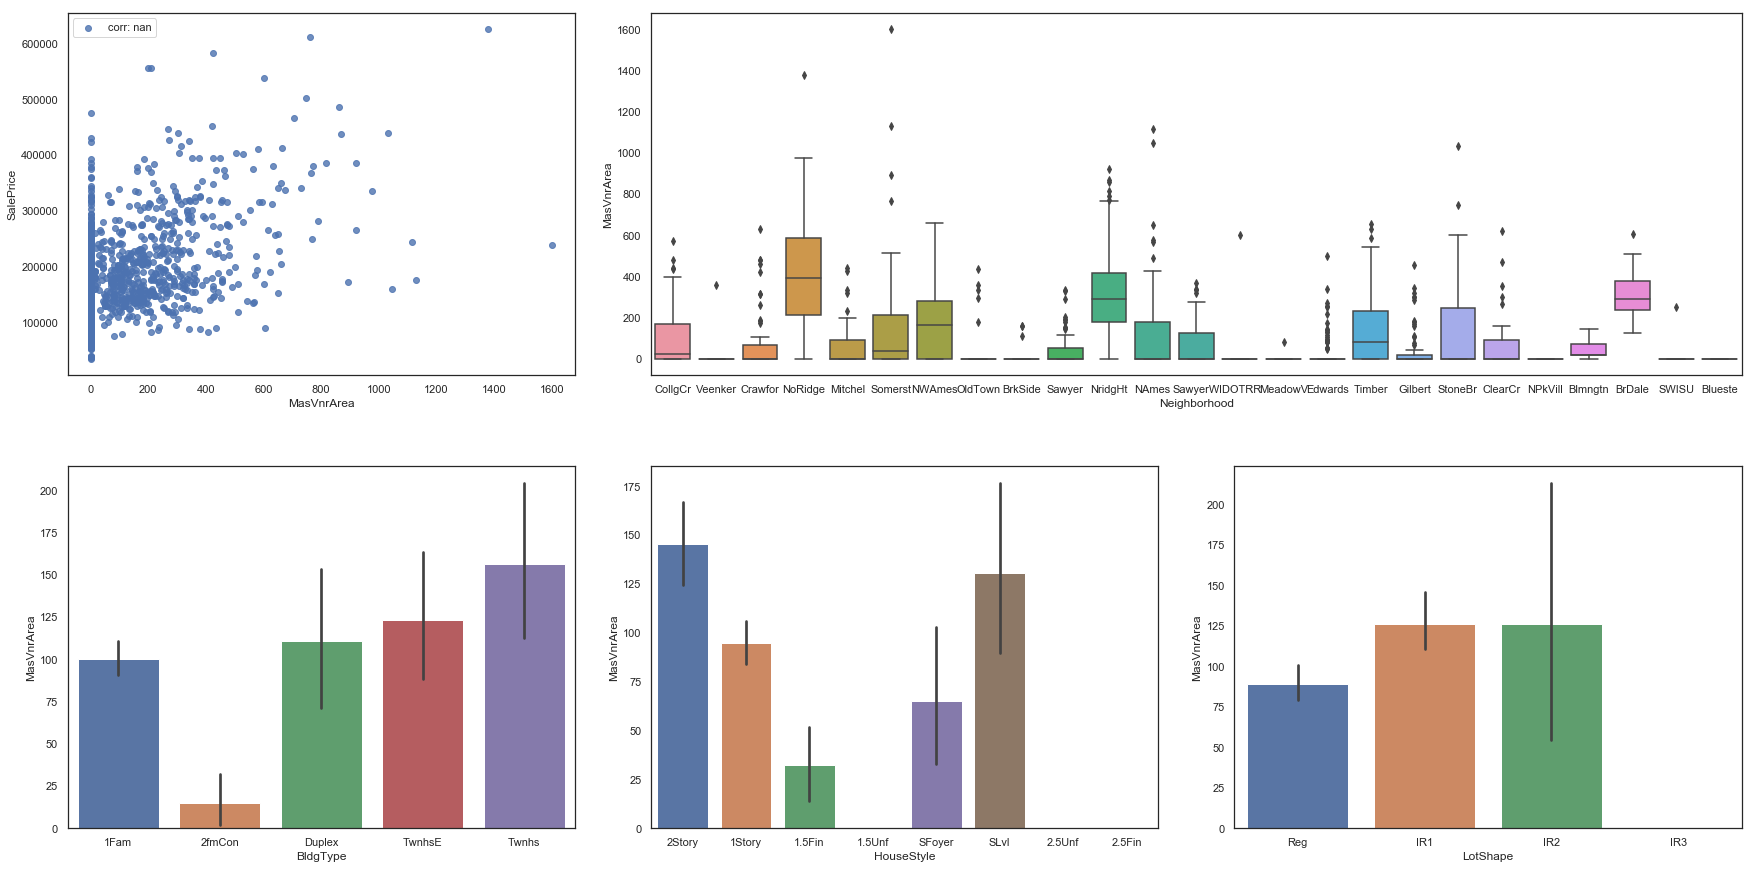

In [102]:
get_feature_corr('MasVnrArea')

- 这个特征没啥意义，各个维度与这个特征的相关性都不是很大，变化都很大，且没有规律

In [103]:
all_data.drop('MasVnrArea', axis=1, inplace=True)

##### ExterQual

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


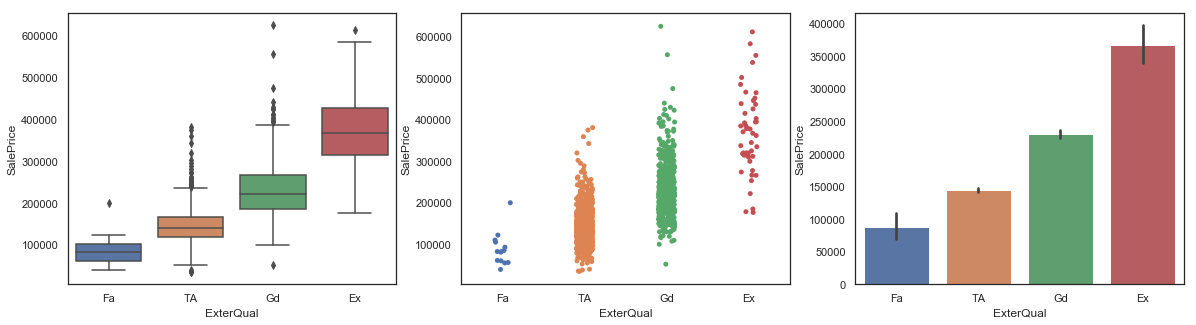

In [104]:
get_feature_corr1('ExterQual',order=['Fa','TA','Gd', 'Ex'])

In [105]:
all_data['ExterQual'] = all_data['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all_data['ExterQual'].unique()

array([3, 2, 4, 1], dtype=int64)

##### ExterCond

In [106]:
"""
Evaluates the present condition of the material on the exterior.
"""

'\nEvaluates the present condition of the material on the exterior.\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


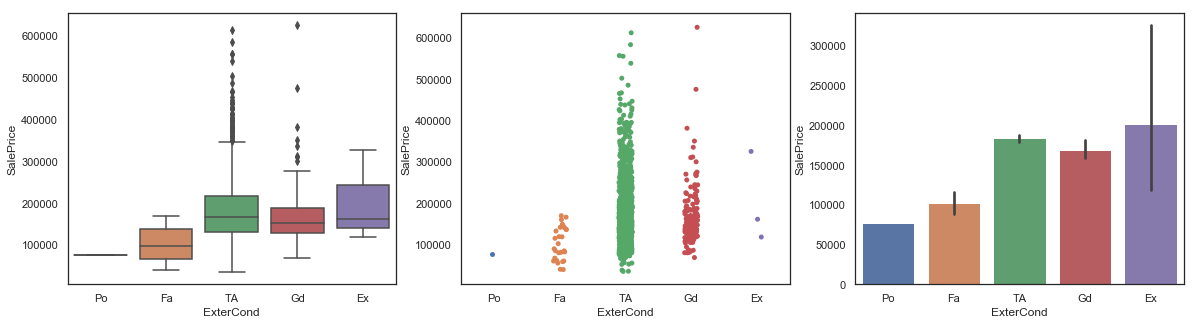

In [107]:
get_feature_corr1('ExterCond',order=['Po','Fa',"TA",'Gd','Ex'])

In [108]:
all_data = pd.get_dummies(all_data, columns = ["ExterCond"], prefix="ExterCond")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical     ...       Exterior1st_WdShing  \
0       Norm       Norm      SBrkr     ...                         0   
1      Feedr       Norm      SBrkr     ...                         0   
2       Norm       Norm      SBrkr     ...                         0   

   MasVnrType_BrkCmn MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
0                  0                  1                0                 0   
1                  0                  0                1                 0   
2                  0                  1                0                 0   

   ExterCond_Ex  ExterCond_Fa  ExterCond_Gd ExterCond_Po ExterCond_TA  
0             0             0             0            0            1  
1             0             0             0            0            1  
2             0             0             0            0            1  

[3 rows x 218 columns]

##### GarageType

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


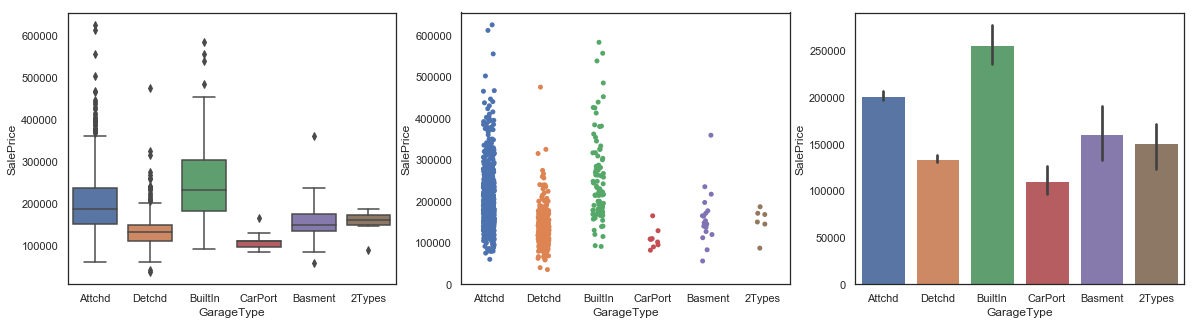

In [109]:
"""
location of the Garage
"""
get_feature_corr1('GarageType')

- 如果观察了该特征 ，其实可以发现这些现象值是有优劣关系的，但是售价并没有跟特征的优劣值进行对应，因此可以简单将这些特征进行one-hot转化也可以实现，
- builtin 的车库房屋售价平均值最高


In [110]:
all_data = pd.get_dummies(all_data, columns = ["GarageType"], prefix="GarageType")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...        ExterCond_Gd  \
0       Norm       Norm      SBrkr       ...                   0   
1      Feedr       Norm      SBrkr       ...                   0   
2       Norm       Norm      SBrkr       ...                   0   

   ExterCond_Po ExterCond_TA  GarageType_2Types  GarageType_Attchd  \
0             0            1                  0                  1   
1             0            1                  0                  1   
2             0            1                  0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

  GarageType_Detchd GarageType_None  
0                 0               0  
1                 0               0  
2                 0               0  

[3 rows x 224 columns]

##### GarageYrBlt

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


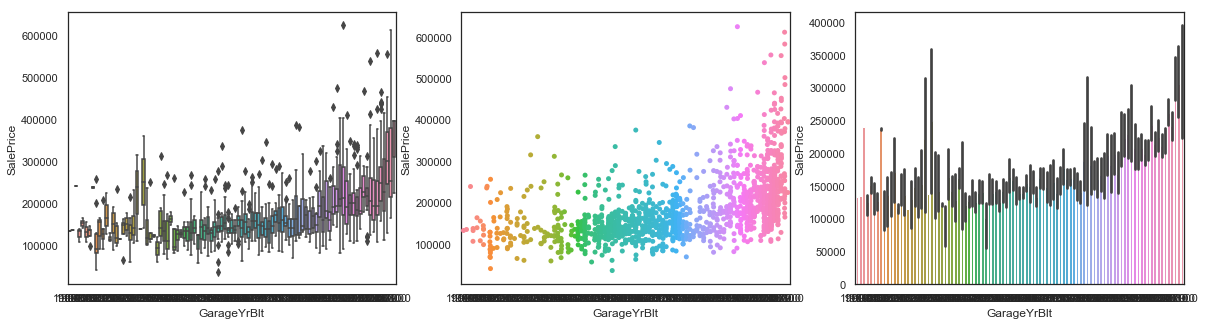

In [111]:
"""
Year Garage was built
"""
get_feature_corr1('GarageYrBlt')

- 年代越近，售价有逐步走高的趋势

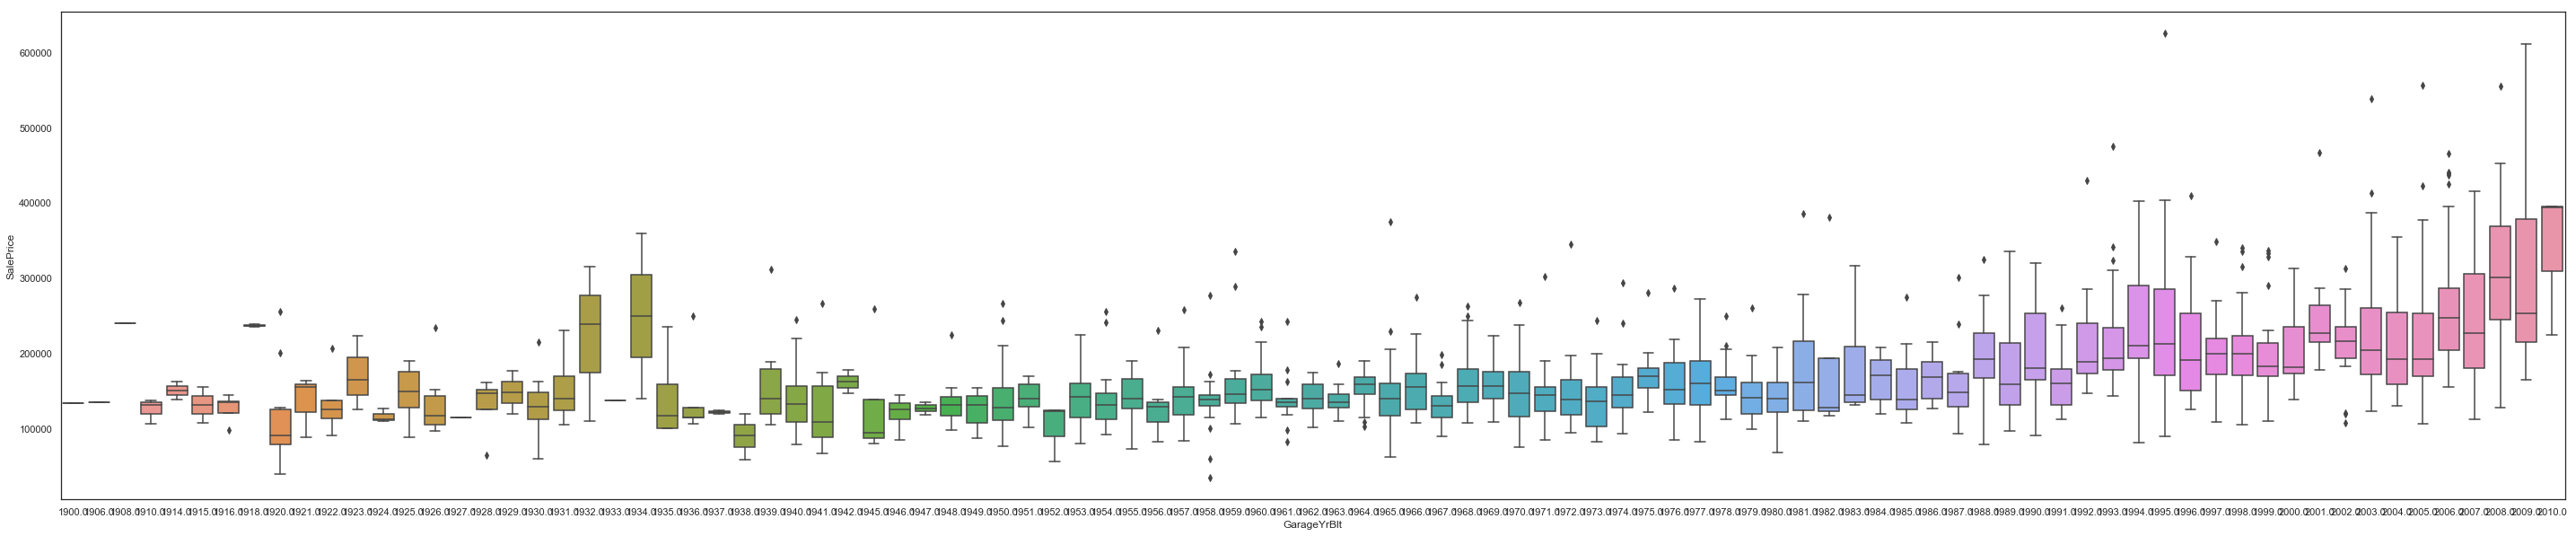

In [112]:
plt.subplots(figsize =(50, 10))

sns.boxplot(x="GarageYrBlt", y="SalePrice", data=train);

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


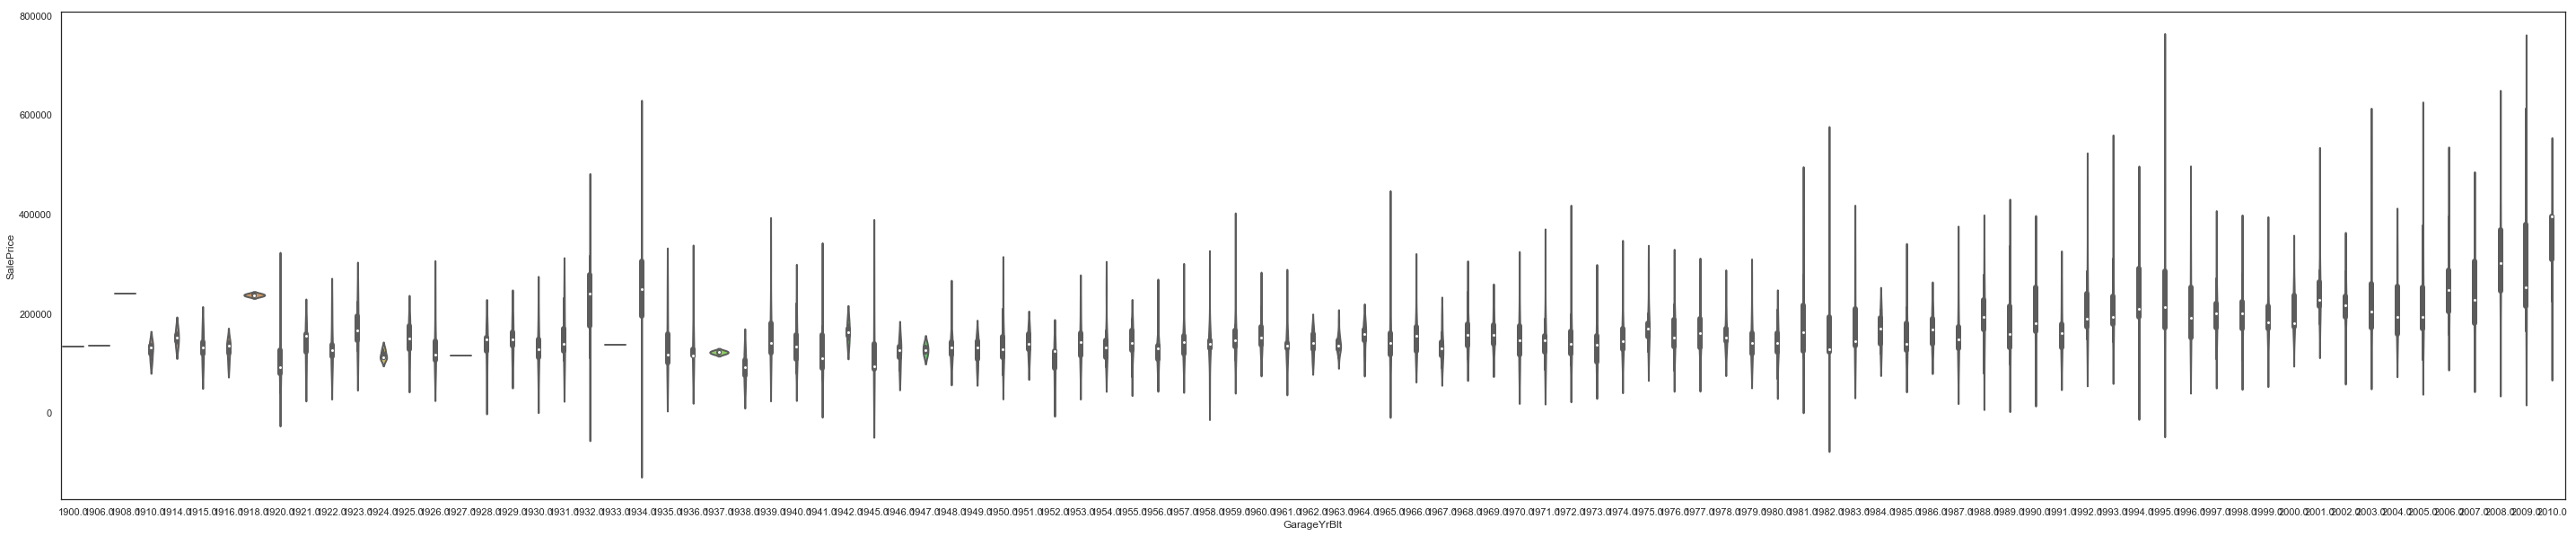

In [113]:
plt.subplots(figsize =(50, 10))
sns.violinplot(x = 'GarageYrBlt', y = 'SalePrice', data = train,
               linewidth = 2, #线宽
               width = 0.8,   #箱之间的间隔比例
               palette = 'hls', #设置调色板
#                order = {'Thur', 'Fri', 'Sat','Sun'}, #筛选类别
#                scale = 'count',  #测度小提琴图的宽度： area-面积相同,count-按照样本数量决定宽度,width-宽度一样
               gridsize = 50, #设置小提琴图的平滑度，越高越平滑
               inner = 'box', #设置内部显示类型 --> 'box','quartile','point','stick',None
               #bw = 0.8      #控制拟合程度，一般可以不设置
               )
### 新学到的seaborn中的一些新图

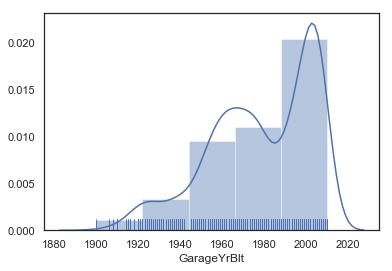

In [114]:
train['GarageYrBlt'].value_counts()
sns.distplot(train['GarageYrBlt'].dropna(), kde=True, bins=5, rug=True)

In [115]:
all_data['GarageYrBlt_Band']  = pd.qcut(all_data['GarageYrBlt'],3,labels=list('123'))
# qcut是根据这些值的频率来选择箱子的均匀间隔，即每个箱子中含有的数的数量是相同的
# cut将根据值本身来选择箱子均匀间隔，即每个箱子的间距都是相同的

In [116]:
all_data['GarageYrBlt_Band'] = all_data['GarageYrBlt_Band'].astype(int)
all_data.drop(['GarageYrBlt'],axis=1,inplace=True)

In [117]:
all_data = pd.get_dummies(all_data, columns = ["GarageYrBlt_Band"], prefix="GarageYrBlt")  # 默认删除掉原来的特征，因此不必删除旧值
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical      ...       GarageType_2Types  \
0       Norm       Norm      SBrkr      ...                       0   
1      Feedr       Norm      SBrkr      ...                       0   
2       Norm       Norm      SBrkr      ...                       0   

   GarageType_Attchd GarageType_Basment  GarageType_BuiltIn  \
0                  1                  0                   0   
1                  1                  0                   0   
2                  1                  0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageYrBlt_1  \
0                   0                  0                0              0   
1                   0                  0                0              0   
2                   0                  0                0              0   

  GarageYrBlt_2 GarageYrBlt_3  
0             0             1  
1             1             0  
2             0             1  

[3 rows x 226 columns]

##### GarageFinish

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


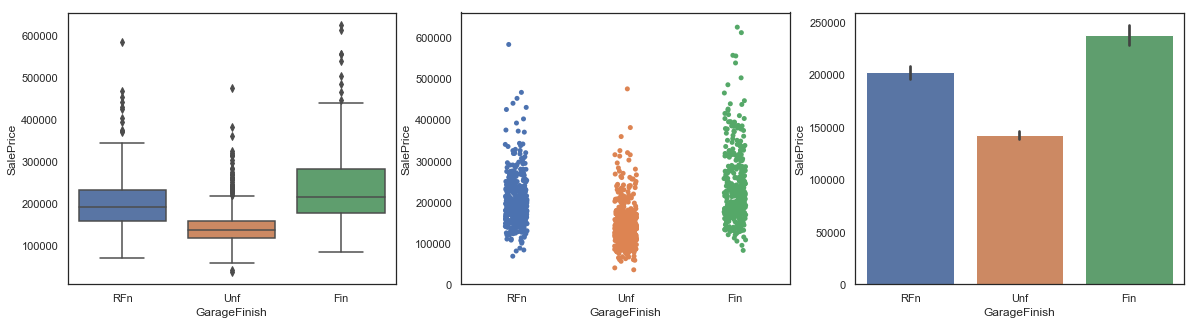

In [118]:
get_feature_corr1('GarageFinish')

In [119]:
all_data = pd.get_dummies(all_data, columns = ["GarageFinish"], prefix="GarageFinish")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...         GarageType_CarPort  \
0       Norm       Norm      SBrkr       ...                          0   
1      Feedr       Norm      SBrkr       ...                          0   
2       Norm       Norm      SBrkr       ...                          0   

   GarageType_Detchd GarageType_None  GarageYrBlt_1  GarageYrBlt_2  \
0                  0               0              0              0   
1                  0               0              0              1   
2                  0               0              0              0   

   GarageYrBlt_3  GarageFinish_Fin  GarageFinish_None GarageFinish_RFn  \
0              1                 0                  0                1   
1              0                 0                  0                1   
2              1                 0                  0                1   

  GarageFinish_Unf  
0                0  
1                0  
2                0  

[3 rows x 229 columns]

##### GarageCars

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


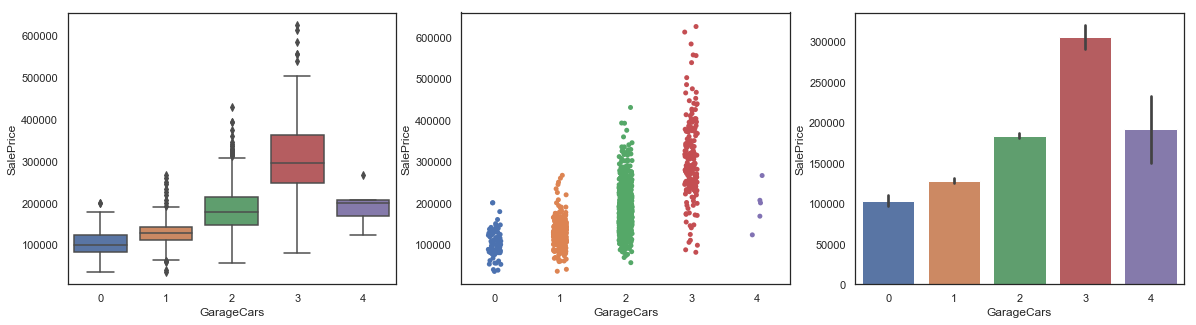

In [120]:
"""
size of the Garage in car capacity 
默认是的数字不用其他操作，3辆车容量的车库售价最高，四辆车的转手频率较低(5个样本)
"""
get_feature_corr1('GarageCars')

##### GarageArea

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


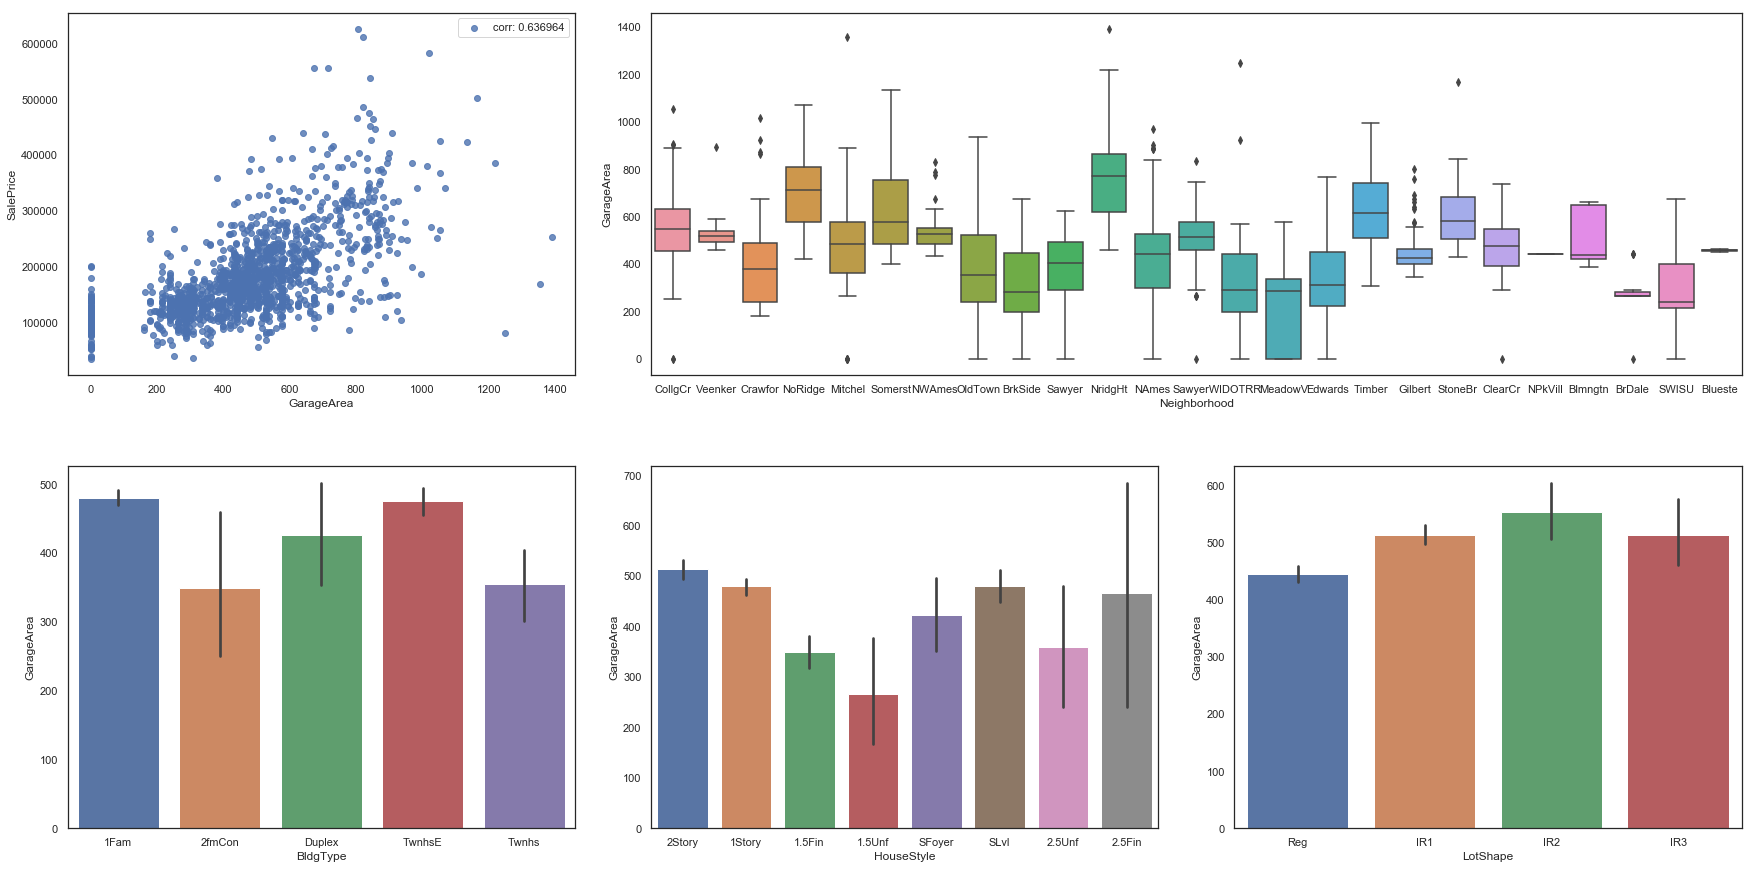

In [121]:
get_feature_corr('GarageArea')

In [122]:
all_data['GarageArea_Band']  = pd.cut(all_data['GarageArea'],3,labels=list('123'))
all_data['GarageArea_Band'] =all_data['GarageArea_Band'].astype('int')
all_data.drop(['GarageArea'],axis=1,inplace=True)

In [123]:
all_data = pd.get_dummies(all_data, columns = ["GarageArea_Band"], prefix="GarageArea")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical     ...       GarageYrBlt_1  GarageYrBlt_2  \
0       Norm       Norm      SBrkr     ...                   0              0   
1      Feedr       Norm      SBrkr     ...                   0              1   
2       Norm       Norm      SBrkr     ...                   0              0   

  GarageYrBlt_3  GarageFinish_Fin  GarageFinish_None  GarageFinish_RFn  \
0             1                 0                  0                 1   
1             0                 0                  0                 1   
2             1                 0                  0                 1   

   GarageFinish_Unf GarageArea_1 GarageArea_2 GarageArea_3  
0                 0            0            1            0  
1                 0            1            0            0  
2                 0            0            1            0  

[3 rows x 231 columns]

##### GarageQual

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


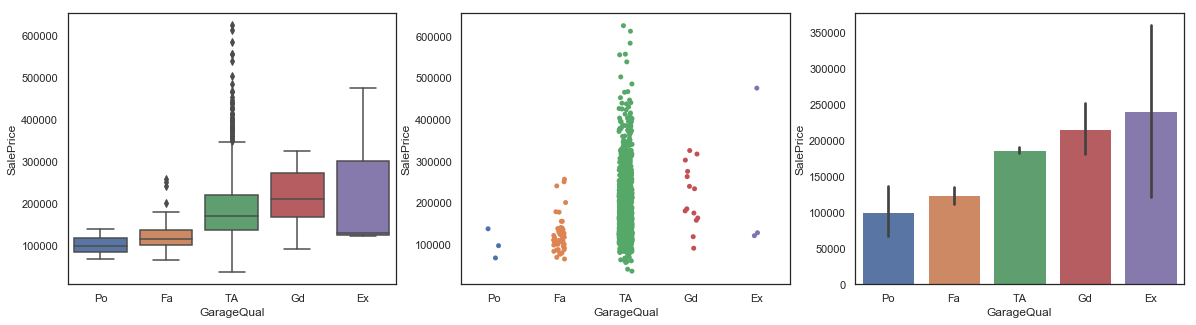

In [124]:
"""
Garage  quality
"""

get_feature_corr1('GarageQual',order=['Po','Fa','TA','Gd','Ex'])

- "TA"的出售的价格有较高的值以及数量较为集中，而两端的数据却很分散，因此可以两边的特征进行合并

In [125]:
all_data['GarageQual'] = all_data['GarageQual'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
all_data['GarageQual'].unique()

array(['TA', 'Low', 'High', 'None'], dtype=object)

In [126]:
all_data = pd.get_dummies(all_data, columns = ["GarageQual"], prefix="GarageQual")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical      ...       GarageFinish_None  \
0       Norm       Norm      SBrkr      ...                       0   
1      Feedr       Norm      SBrkr      ...                       0   
2       Norm       Norm      SBrkr      ...                       0   

   GarageFinish_RFn GarageFinish_Unf  GarageArea_1  GarageArea_2  \
0                 1                0             0             1   
1                 1                0             1             0   
2                 1                0             0             1   

   GarageArea_3  GarageQual_High GarageQual_Low GarageQual_None GarageQual_TA  
0             0                0              0               0             1  
1             0                0              0               0             1  
2             0                0              0               0             1  

[3 rows x 234 columns]

#####  GarageCond

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


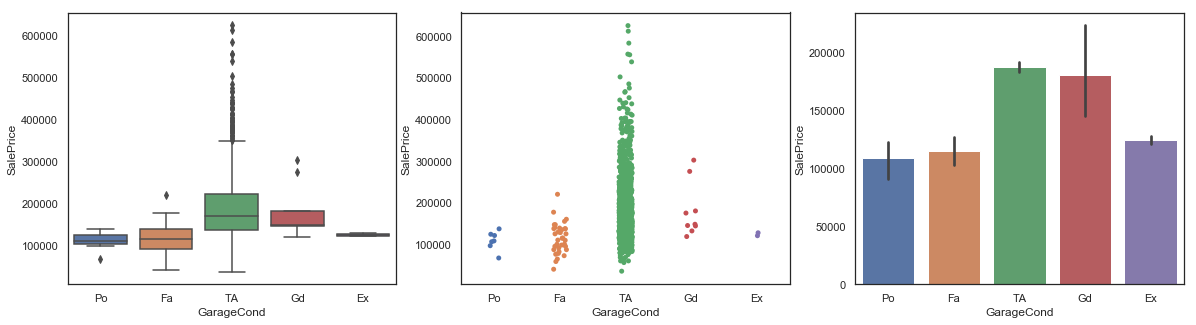

In [127]:
"""
Garage condition.
"""

get_feature_corr1('GarageCond',order=['Po','Fa','TA','Gd','Ex'])

- 该特征与garage quality 特征处理方式类似 

In [128]:
all_data['GarageCond']= all_data['GarageCond'].map({"None":'None',"Po":'Low','Fa':'Low','TA':'TA','Gd':'High','Ex':'High'})
all_data['GarageCond'].unique()

array(['TA', 'Low', 'None', 'High'], dtype=object)

In [129]:
all_data = pd.get_dummies(all_data, columns = ["GarageCond"], prefix="GarageCond")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical      ...        GarageArea_2  GarageArea_3  \
0       Norm       Norm      SBrkr      ...                   1             0   
1      Feedr       Norm      SBrkr      ...                   0             0   
2       Norm       Norm      SBrkr      ...                   1             0   

  GarageQual_High  GarageQual_Low  GarageQual_None  GarageQual_TA  \
0               0               0                0              1   
1               0               0                0              1   
2               0               0                0              1   

   GarageCond_High GarageCond_Low GarageCond_None  GarageCond_TA  
0                0              0               0              1  
1                0              0               0              1  
2                0              0               0              1  

[3 rows x 237 columns]

##### WoodDeckSF

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


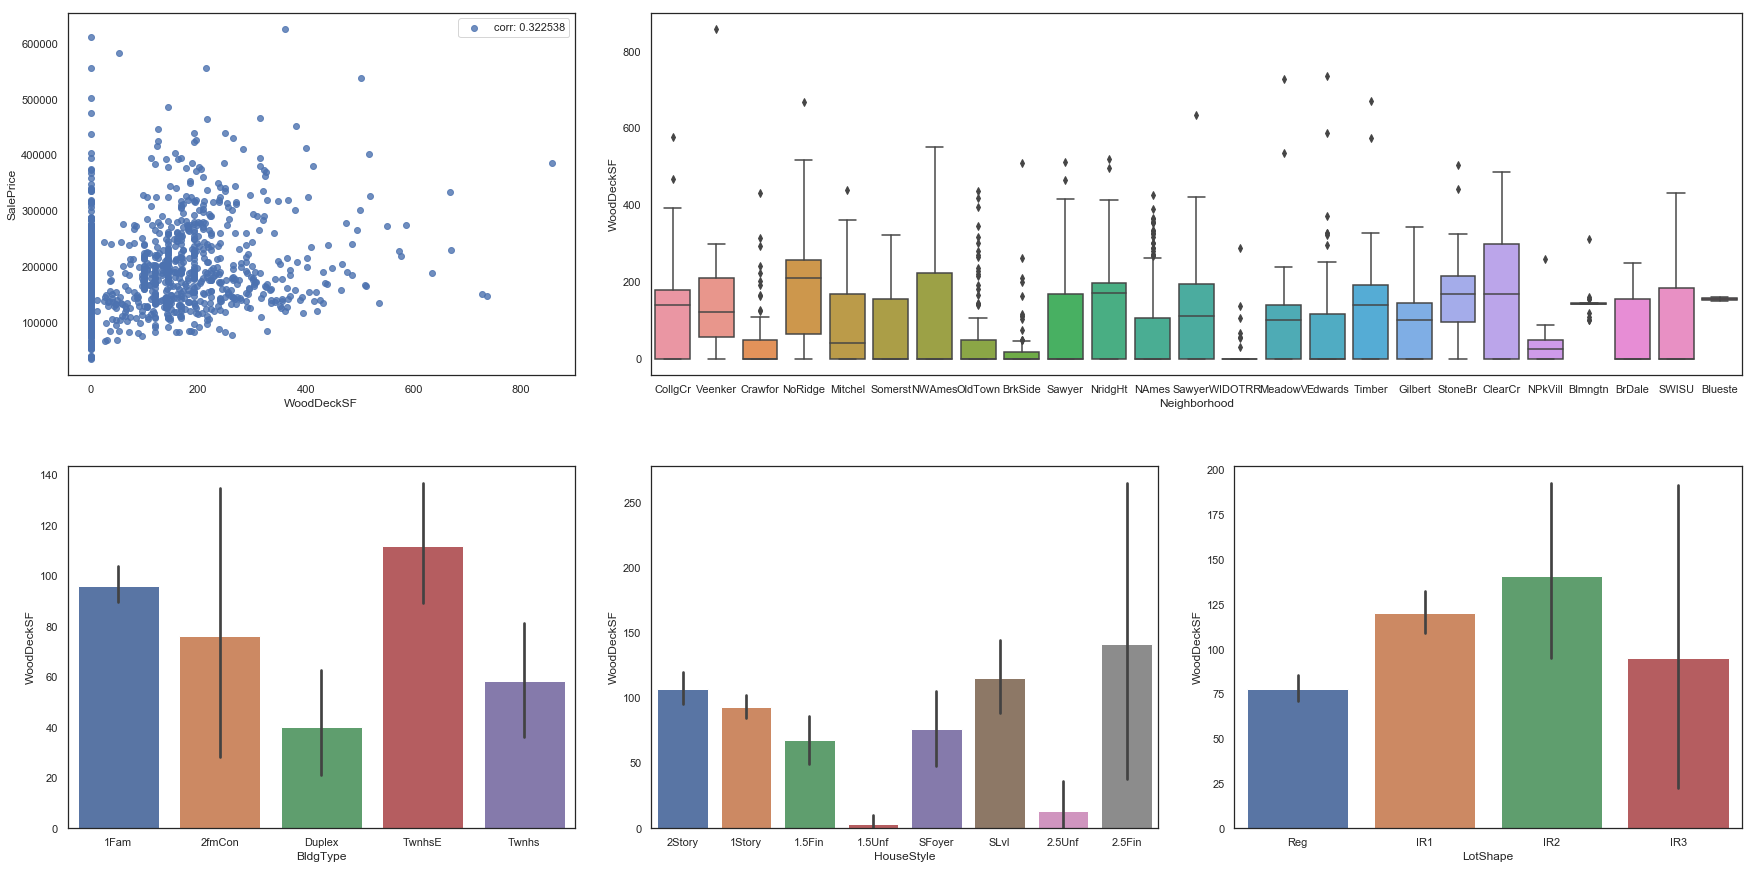

In [130]:
"""
Wood deck area in SF.
"""

get_feature_corr('WoodDeckSF')

-  high correlation with salesPrice
-  很多的0值，需要单独创建一个特征，来说明是否伟木质材料构建
-  对于非0值，进行封箱操作，然后转化为one-hot特征

In [131]:
def WoodDeckFlag(col):
    if col['WoodDeckSF'] == 0:
        return 1
    else:
        return 0
    
all_data['NoWoodDeck_Flag'] = all_data.apply(WoodDeckFlag, axis=1)  # new feature

all_data['WoodDeckSF_Band'] = pd.cut(all_data['WoodDeckSF'], 4,labels=list('1234'))  ## bin 

all_data['WoodDeckSF_Band'] = all_data['WoodDeckSF_Band'].astype(int)

all_data.drop('WoodDeckSF', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["WoodDeckSF_Band"], prefix="WoodDeckSF")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical      ...       GarageQual_TA  \
0       Norm       Norm      SBrkr      ...                   1   
1      Feedr       Norm      SBrkr      ...                   1   
2       Norm       Norm      SBrkr      ...                   1   

   GarageCond_High GarageCond_Low  GarageCond_None  GarageCond_TA  \
0                0              0                0              1   
1                0              0                0              1   
2                0              0                0              1   

   NoWoodDeck_Flag  WoodDeckSF_1 WoodDeckSF_2 WoodDeckSF_3  WoodDeckSF_4  
0                1             1            0            0             0  
1                0             1            0            0             0  
2                1             1            0            0             0  

[3 rows x 241 columns]

##### TotalPorchSF

In [132]:
"""
OpenPorchSF, EnclosedPorch, 3SsnPorch & ScreenPorch

I will sum these features together to create a total porch in square feet feature.
"""
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch'] 
train['TotalPorchSF'] = train['OpenPorchSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


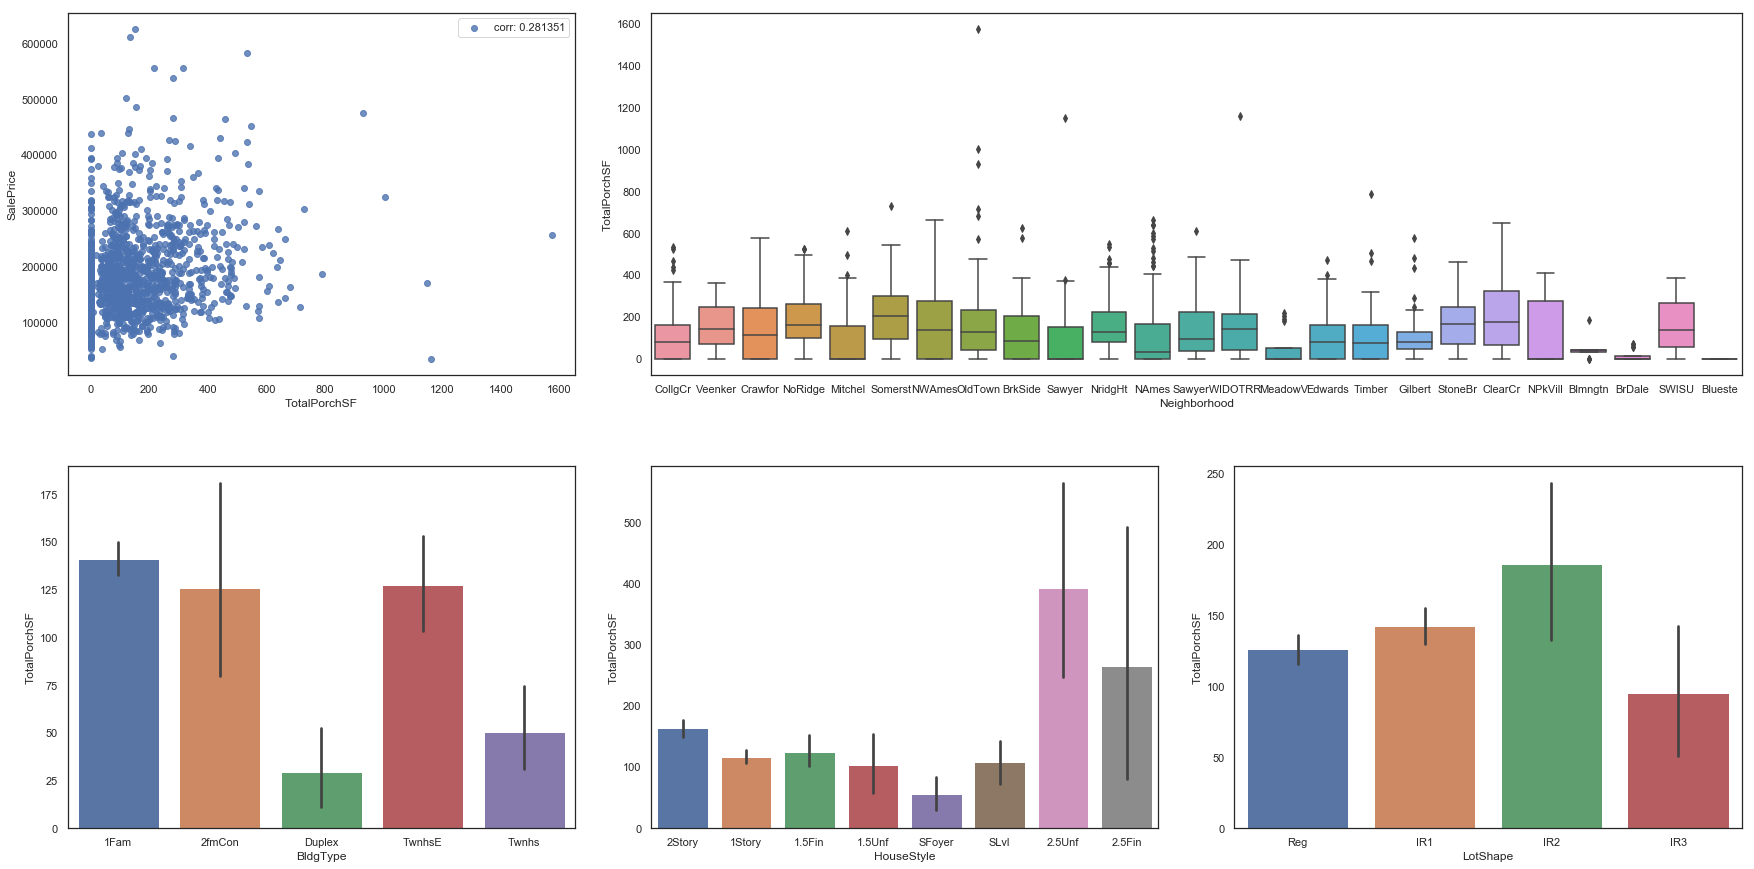

In [133]:
get_feature_corr('TotalPorchSF')

In [134]:
def PorchFlag(col):
    if col['TotalPorchSF'] == 0:
        return 1
    else:
        return 0
    
all_data['NoPorch_Flag'] = all_data.apply(PorchFlag, axis=1)

all_data['TotalPorchSF_Band'] = pd.cut(all_data['TotalPorchSF'], 4,labels=list('1234'))
all_data['TotalPorchSF_Band'].unique()
all_data['TotalPorchSF_Band'] = all_data['TotalPorchSF_Band'].astype(int)

all_data.drop('TotalPorchSF', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["TotalPorchSF_Band"], prefix="TotalPorchSF")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical       ...        NoWoodDeck_Flag  \
0       Norm       Norm      SBrkr       ...                      1   
1      Feedr       Norm      SBrkr       ...                      0   
2       Norm       Norm      SBrkr       ...                      1   

   WoodDeckSF_1 WoodDeckSF_2  WoodDeckSF_3  WoodDeckSF_4  NoPorch_Flag  \
0             1            0             0             0             0   
1             1            0             0             0             1   
2             1            0             0             0             0   

   TotalPorchSF_1 TotalPorchSF_2 TotalPorchSF_3  TotalPorchSF_4  
0               1              0              0               0  
1               1              0              0               0  
2               1              0              0               0  

[3 rows x 246 columns]

##### PoolArea

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


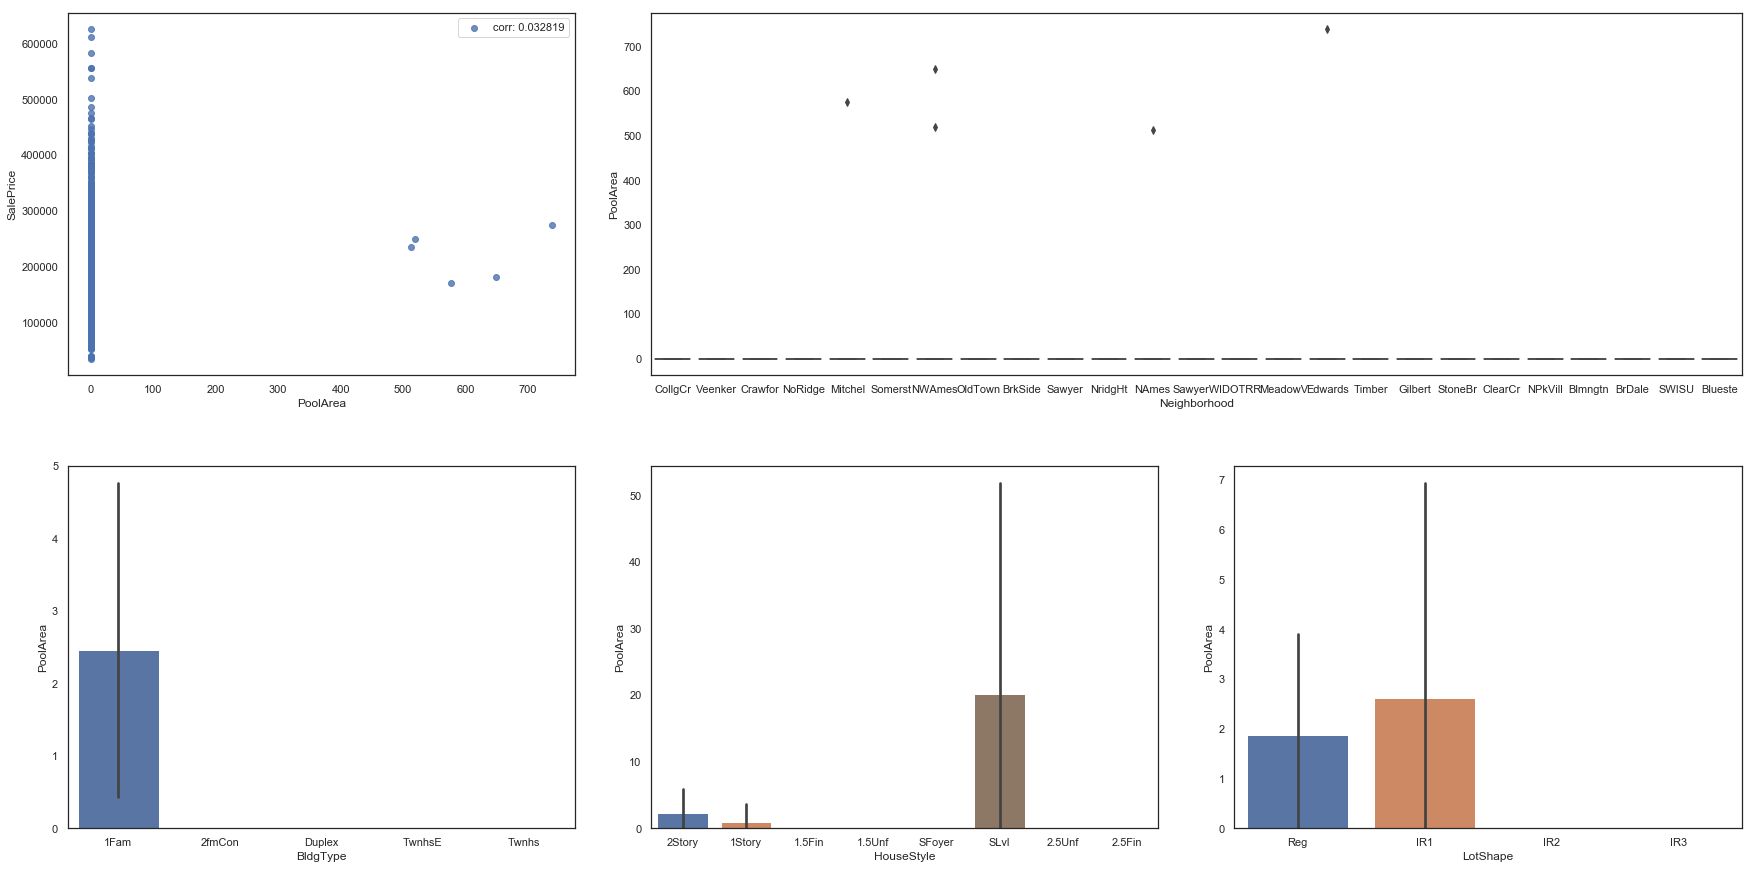

In [135]:
"""
PoolArea Pool area in square feet.
"""
get_feature_corr('PoolArea')

In [136]:
def PoolFlag(col):
    if col['PoolArea'] == 0:
        return 0
    else:
        return 1
    
all_data['HasPool_Flag'] = all_data.apply(PoolFlag, axis=1)
all_data.drop('PoolArea', axis=1, inplace=True)

##### PoolQC

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


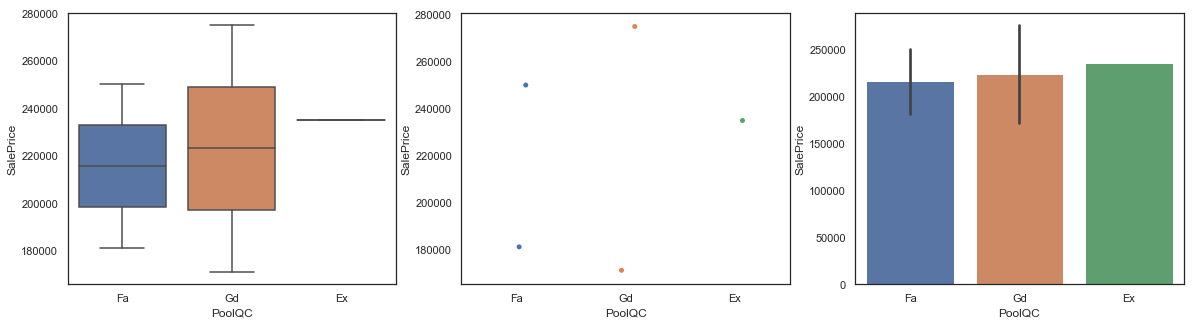

In [137]:
"""
Pool quality.
"""
get_feature_corr1('PoolQC',order=['Fa','Gd','Ex'])


In [138]:
all_data['PoolQC'].value_counts()  #  总共8个数据带pool，其他的都是不带的，所以拿到的这个quality数据意义不大

None    2907
Gd         3
Ex         3
Fa         2
Name: PoolQC, dtype: int64

In [139]:
all_data.drop('PoolQC', axis=1, inplace=True)

##### Fence

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


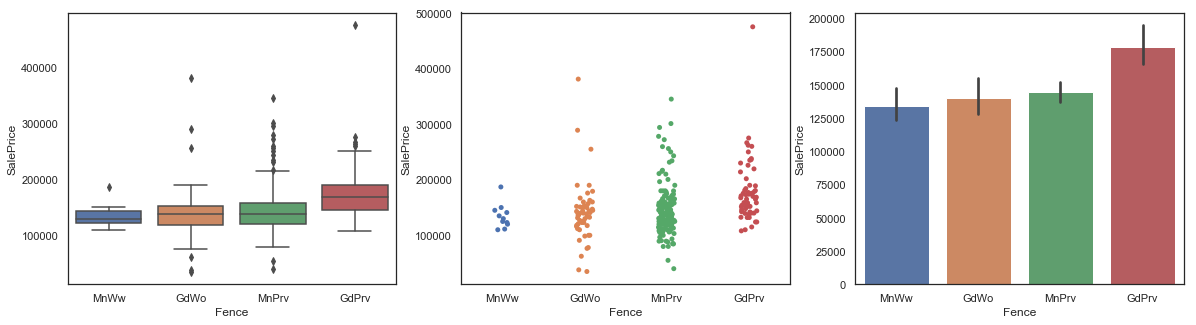

In [140]:
'''
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
'''

get_feature_corr1('Fence',order=['MnWw','GdWo','MnPrv','GdPrv'])

In [141]:
all_data = pd.get_dummies(all_data, columns = ["Fence"], prefix="Fence")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical     ...      TotalPorchSF_1  \
0       Norm       Norm      SBrkr     ...                   1   
1      Feedr       Norm      SBrkr     ...                   1   
2       Norm       Norm      SBrkr     ...                   1   

   TotalPorchSF_2  TotalPorchSF_3  TotalPorchSF_4  HasPool_Flag  Fence_GdPrv  \
0               0               0               0             0            0   
1               0               0               0             0            0   
2               0               0               0             0            0   

  Fence_GdWo Fence_MnPrv  Fence_MnWw  Fence_None  
0          0           0           0           1  
1          0           0           0           1  
2          0           0           0           1  

[3 rows x 249 columns]

##### MSZoning

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


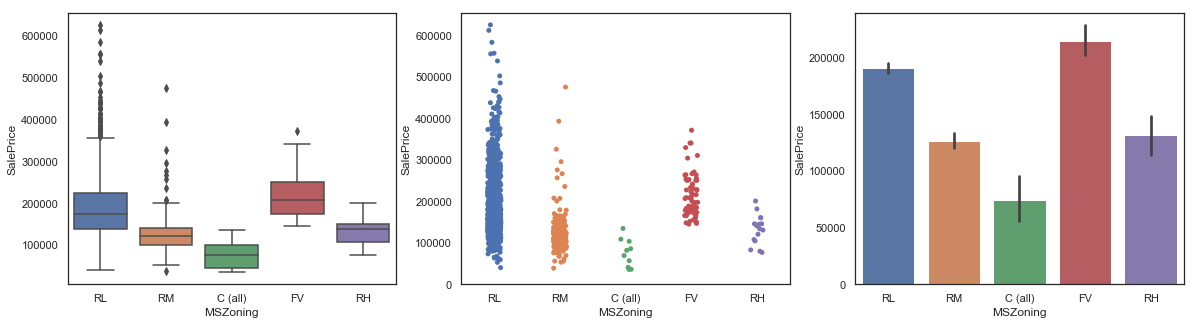

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [142]:
"""
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
"""
get_feature_corr1('MSZoning')
all_data['MSZoning'].value_counts()

In [143]:
all_data = pd.get_dummies(all_data, columns = ["MSZoning"], prefix="MSZoning")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical     ...       Fence_GdPrv  Fence_GdWo  \
0       Norm       Norm      SBrkr     ...                 0           0   
1      Feedr       Norm      SBrkr     ...                 0           0   
2       Norm       Norm      SBrkr     ...                 0           0   

   Fence_MnPrv  Fence_MnWw  Fence_None  MSZoning_C (all) MSZoning_FV  \
0            0           0           1                 0           0   
1            0           0           1                 0           0   
2            0           0           1                 0           0   

  MSZoning_RH  MSZoning_RL  MSZoning_RM  
0           0            1            0  
1           0            1            0  
2           0            1            0  

[3 rows x 253 columns]

##### Neighborhood

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


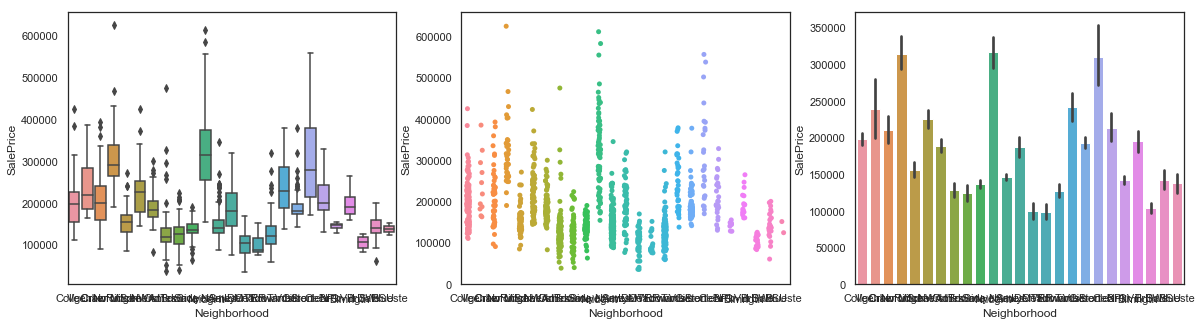

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Condition1 Condition2 Electrical          ...           \
0       Norm       Norm      SBrkr          ...            
1      Feedr       Norm      SBrkr          ...            
2       Norm       Norm      SBrkr          ...            

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   

  Neighborhood_Somerst Neighborhood_StoneBr  Neighborhood_Timber  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   Neighborhood_Veenker  
0                     0  
1                     1  
2                     0  

[3 rows x 277 columns]

In [144]:
"""
this feature has lots of values,and SalePrice varies a lot in the values of the feature,
we  just use one-hot to transform this feature

"""

get_feature_corr1('Neighborhood')
all_data = pd.get_dummies(all_data, columns = ["Neighborhood"], prefix="Neighborhood")
all_data.head(3)

##### Condition1 & Condition2

condition1


c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


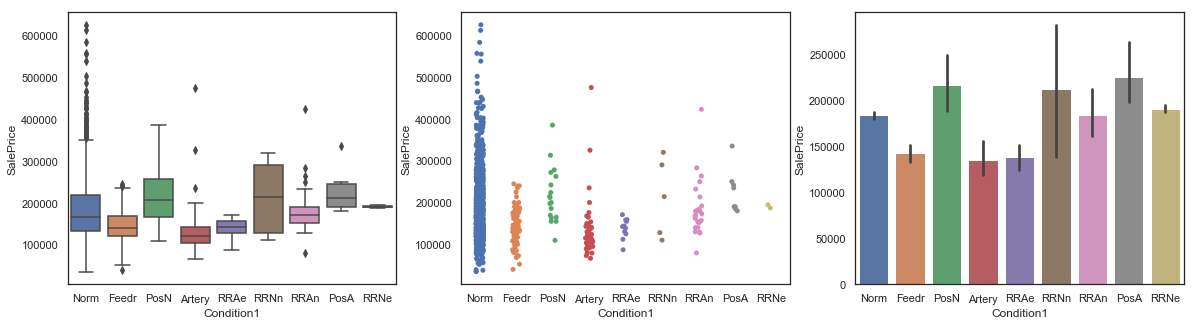

condition2


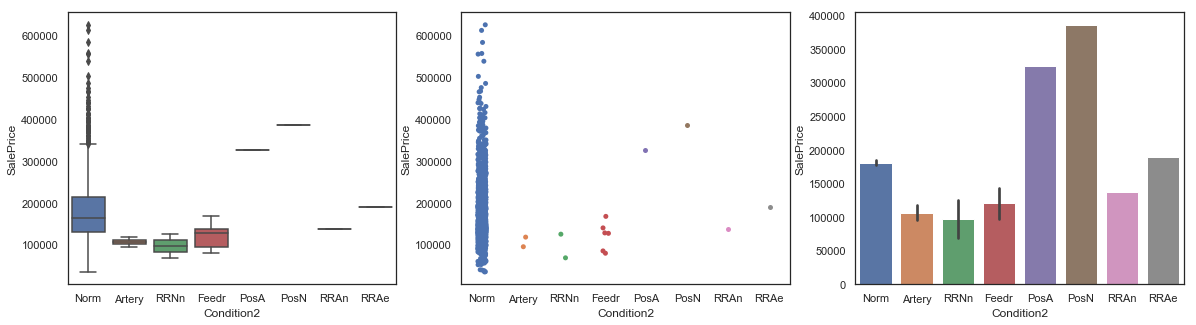

In [145]:
print('condition1')
get_feature_corr1('Condition1')
print('condition2')
get_feature_corr1('Condition2')

In [146]:
'''
Condition1: Proximity to various conditions
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

'''
all_data['Condition1'] = all_data['Condition1'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})
all_data['Condition2'] = all_data['Condition2'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})

In [147]:
def ConditionMatch(col):
    if col['Condition1'] == col['Condition2']:
        return 0
    else:
        return 1
    
all_data['Diff2ndCondition_Flag'] = all_data.apply(ConditionMatch, axis=1)
all_data.drop('Condition2', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["Condition1"], prefix="Condition1")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Electrical  EnclosedPorch  ExterQual       ...         Neighborhood_SawyerW  \
0      SBrkr              0          3       ...                            0   
1      SBrkr              0          2       ...                            0   
2      SBrkr              0          3       ...                            0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

  Neighborhood_Veenker Diff2ndCondition_Flag  Condition1_Norm  Condition1_Pos  \
0                    0                     0                1               0   
1                    1                     1                0               0   
2                    0                     0                1               0   

  Condition1_Street Condition1_Train  
0                 0                0  
1                 1                0  
2                 0                0  

[3 rows x 280 columns]

##### LotFrontage

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


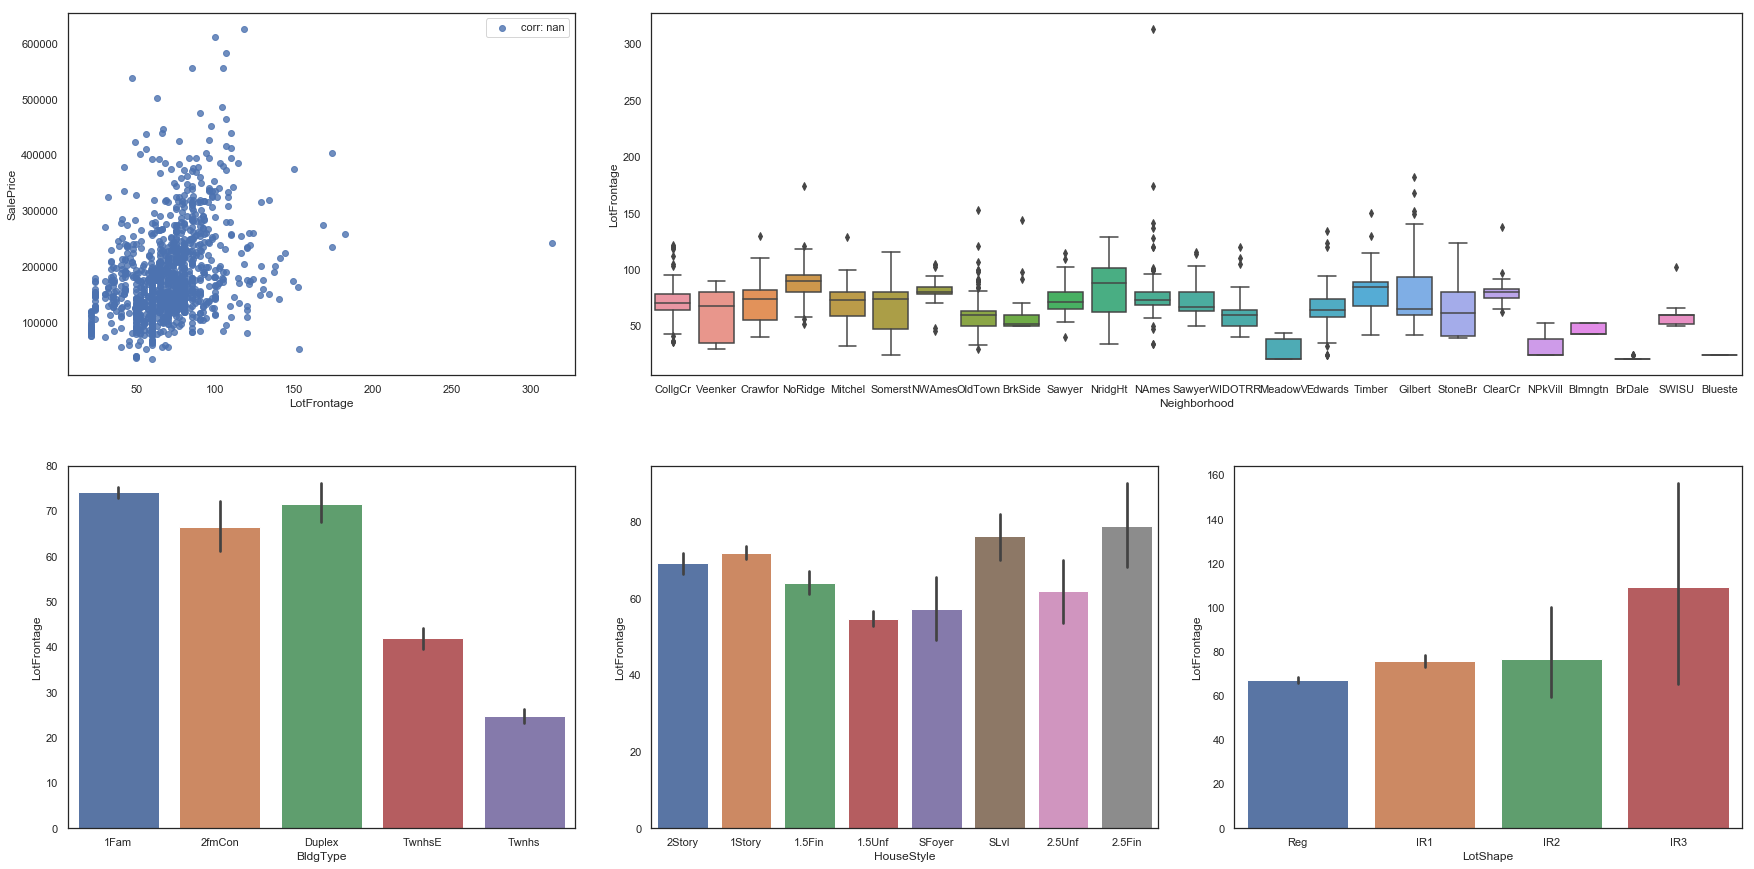

In [148]:
"""
Linear feet of street connected to property.
"""

get_feature_corr('LotFrontage')

- 该特征与saleprice 没有明显的相关性，可以考虑去掉该特征

##### LotArea

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


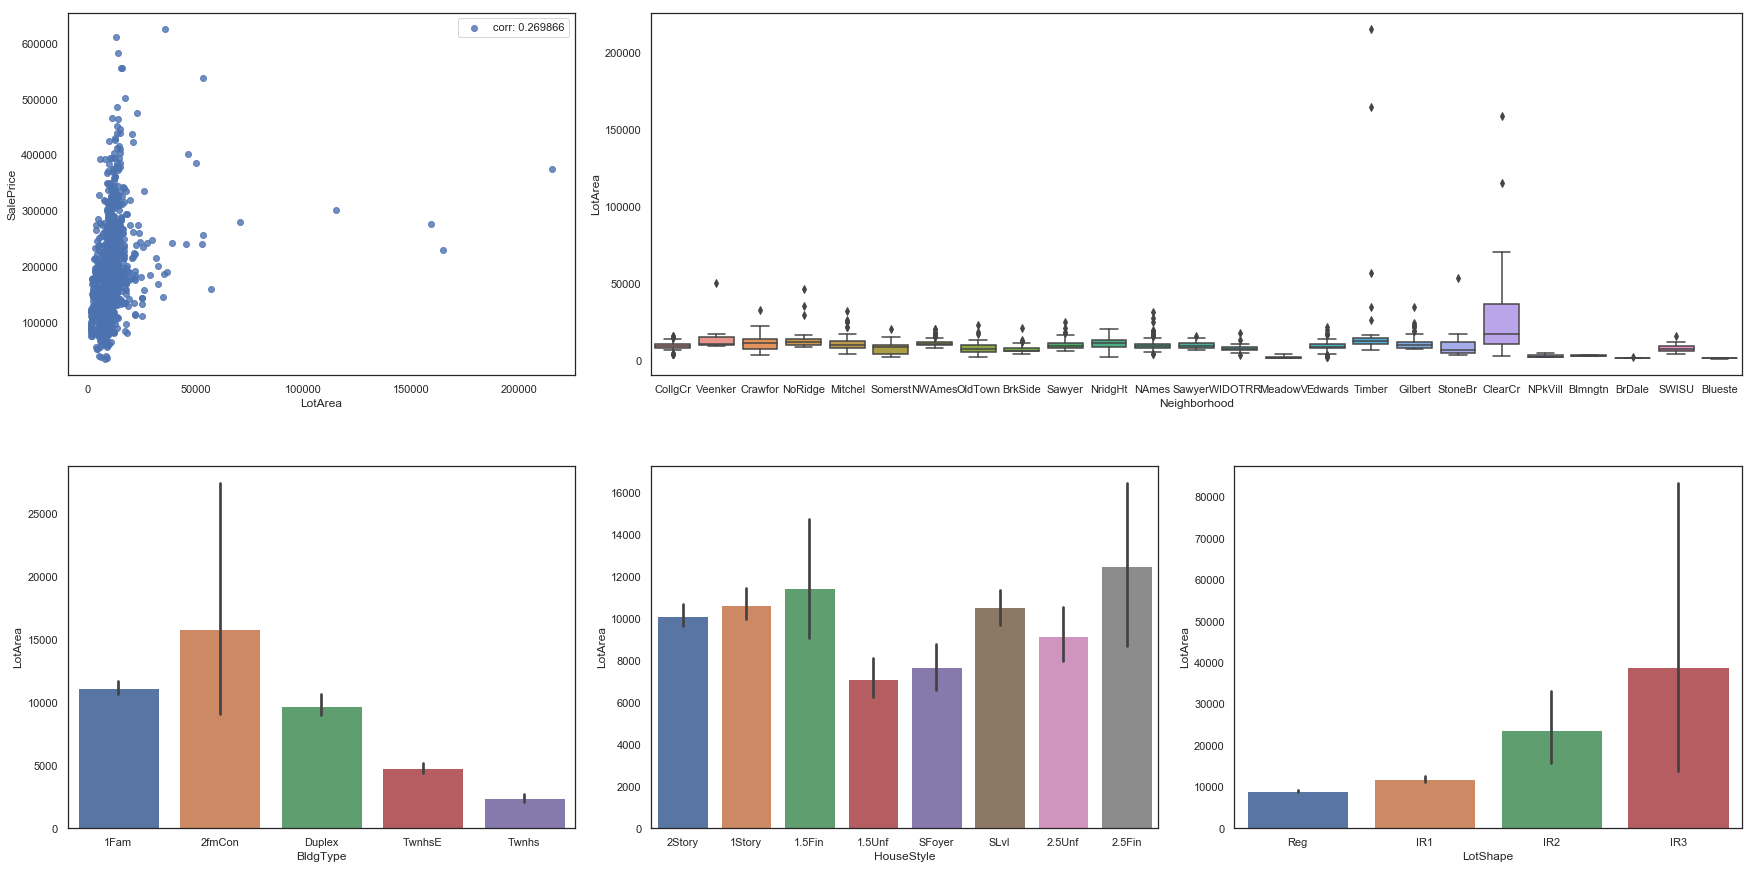

In [149]:
'''
Lot size in square feet.
'''
get_feature_corr('LotArea')

![](http://ww4.sinaimg.cn/large/006tNc79ly1g567v4ggzgj30ia0egwfi.jpg)

- 该特征与saleprice有着明显的相关性，且该特征与saleprice呈现一个正偏态（峰左移，右偏，正偏）

In [150]:
all_data['LotArea_Band'] = pd.qcut(all_data['LotArea'], 8,labels=list('12345678'))  # 针对分布不均匀的特征使用qcut进行封箱
all_data['LotArea_Band'].unique()
all_data['LotArea_Band'] = all_data['LotArea_Band'].astype(int)

all_data.drop('LotArea', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["LotArea_Band"], prefix="LotArea")
all_data.head(3)

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Electrical  EnclosedPorch  ExterQual    ...     Condition1_Street  \
0      SBrkr              0          3    ...                     0   
1      SBrkr              0          2    ...                     1   
2      SBrkr              0          3    ...                     0   

   Condition1_Train  LotArea_1  LotArea_2 LotArea_3 LotArea_4  LotArea_5  \
0                 0          0          0         1         0          0   
1                 0          0          0         0         0          1   
2                 0          0          0         0         0          0   

   LotArea_6 LotArea_7 LotArea_8  
0          0         0         0  
1          0         0         0  
2          1         0         0  

[3 rows x 287 columns]

##### LotShape

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


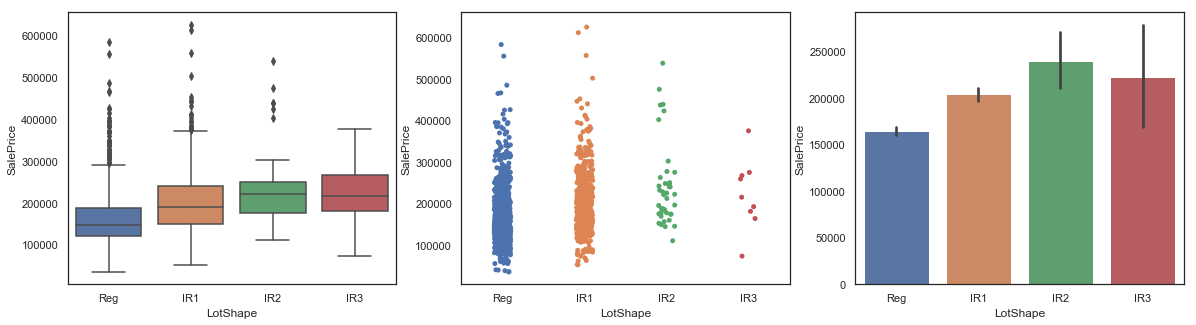

In [151]:
"""
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregula
该特征能够明显的影响售价，在国外，不仅仅要有大的面积数，而且尺寸也要合理，否则也很能卖出高价 
"""
get_feature_corr1('LotShape')

In [152]:
all_data = pd.get_dummies(all_data, columns = ["LotShape"], prefix="LotShape")
all_data.head(3)
print("地皮的形状主要集中在Reg，Reg1两个值里面，而且salerice在不同的属性里面变化很大")

地皮的形状主要集中在Reg，Reg1两个值里面，而且salerice在不同的属性里面变化很大


##### LandContour

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


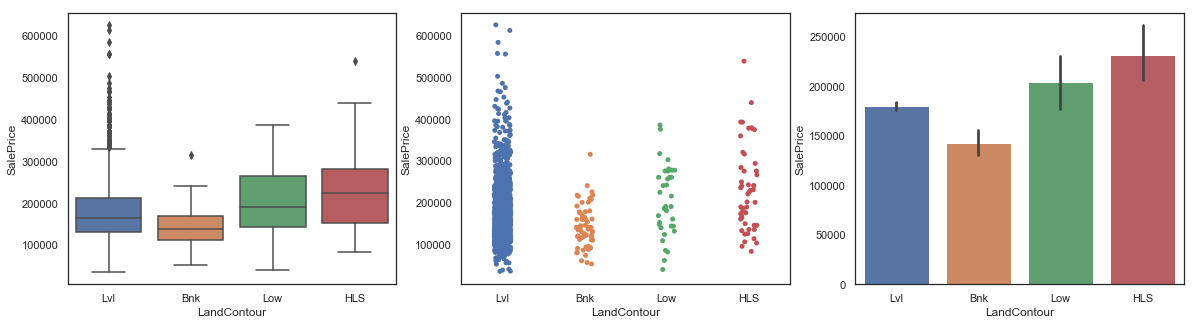

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Electrical  EnclosedPorch  ExterQual       ...        LotArea_7  LotArea_8  \
0      SBrkr              0          3       ...                0          0   
1      SBrkr              0          2       ...                0          0   
2      SBrkr              0          3       ...                0          0   

   LotShape_IR1  LotShape_IR2 LotShape_IR3 LotShape_Reg  LandContour_Bnk  \
0             0             0            0            1                0   
1             0             0            0            1                0   
2             1             0            0            0                0   

   LandContour_HLS LandContour_Low LandContour_Lvl  
0                0               0               1  
1                0               0               1  
2                0               0               1  

[3 rows x 293 columns]

In [153]:
"""
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

"""
get_feature_corr1('LandContour')
all_data = pd.get_dummies(all_data, columns = ["LandContour"], prefix="LandContour")
all_data.head(3)

##### LotConfig

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


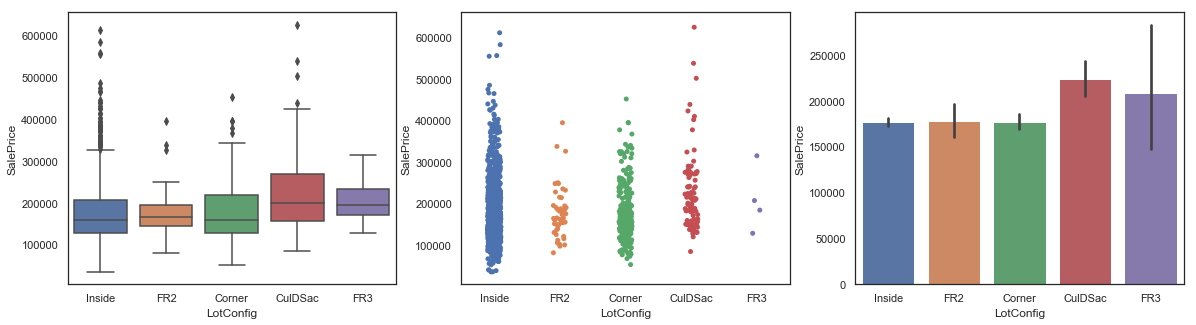

3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0  None             3         3             1         3          Y   
1          0  None             3         3             4         3          Y   
2          0  None             3         3             2         3          Y   

  Electrical  EnclosedPorch  ExterQual        ...         LotShape_IR3  \
0      SBrkr              0          3        ...                    0   
1      SBrkr              0          2        ...                    0   
2      SBrkr              0          3        ...                    0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS LandContour_Low  \
0             1                0                0               0   
1             1                0                0               0   
2             0                0                0               0   

  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac LotConfig_FR  \
0               1                 0                  0            0   
1               1                 0                  0            1   
2               1                 0                  0            0   

   LotConfig_Inside  
0                 1  
1                 0  
2                 1  

[3 rows x 296 columns]

In [154]:
"""
LotConfig: Lot configuration

       Inside	Inside lot 内部
       Corner	Corner lot 角落
       CulDSac	Cul-de-sac 死胡同
       FR2	Frontage on 2 sides of property 前排
       FR3	Frontage on 3 sides of property  前排
房子周围的环境 
"""
get_feature_corr1('LotConfig')
all_data['LotConfig'] = all_data['LotConfig'].map({"Inside":"Inside", "FR2":"FR", "Corner":"Corner", "CulDSac":"CulDSac", "FR3":"FR"})

all_data = pd.get_dummies(all_data, columns = ["LotConfig"], prefix="LotConfig")
all_data.head(3)



##### LandSlope

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


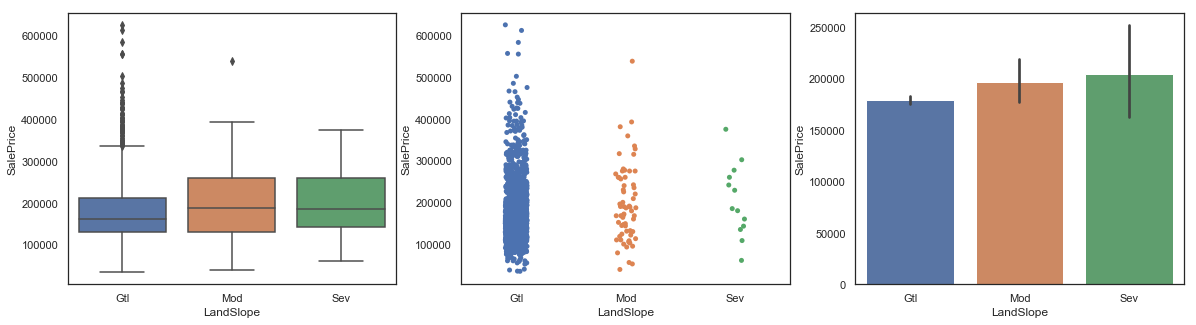

In [155]:
"""
LandSlope: Slope of property
       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope
"""
get_feature_corr1('LandSlope')


In [156]:
all_data['LandSlope'] = all_data['LandSlope'].map({"Gtl":1, "Mod":0, "Sev":0})
'''
Mod and Sev saleprice 处于同一区间，可以将两者合并
'''

'\nMod and Sev saleprice 处于同一区间，可以将两者合并\n'

In [157]:
all_data['LandSlope'].value_counts()

1    2774
0     141
Name: LandSlope, dtype: int64

#####  Street

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


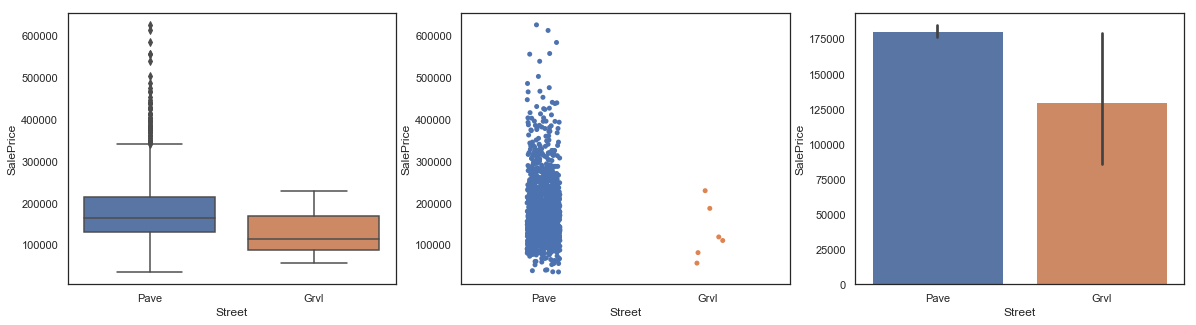

In [158]:
get_feature_corr1('Street')

- Pave中价格变化很大，且Grvl数量太少，所以该特征意义不大，直接去掉

In [159]:
all_data.drop('Street', axis=1, inplace=True)

##### Alley

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


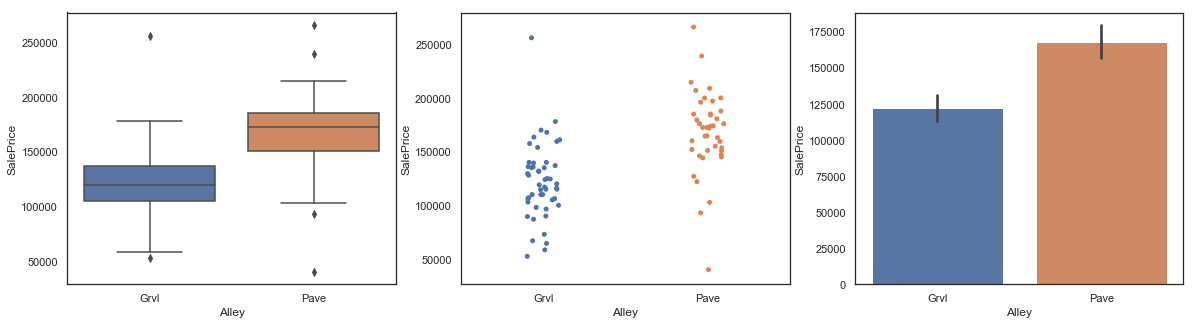

In [160]:
get_feature_corr1('Alley')

In [161]:
all_data['Alley'].value_counts()

None    2717
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [162]:
all_data = pd.get_dummies(all_data, columns = ["Alley"], prefix="Alley")
all_data.head(3)

3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0             3         3             1         3          Y   
1          0             3         3             4         3          Y   
2          0             3         3             2         3          Y   

  Electrical  EnclosedPorch  ExterQual  FireplaceQu    ...      \
0      SBrkr              0          3            0    ...       
1      SBrkr              0          2            3    ...       
2      SBrkr              0          3            3    ...       

   LandContour_HLS  LandContour_Low  LandContour_Lvl LotConfig_Corner  \
0                0                0                1                0   
1                0                0                1                0   
2                0                0                1                0   

  LotConfig_CulDSac  LotConfig_FR  LotConfig_Inside  Alley_Grvl  Alley_None  \
0                 0             0                 1           0           1   
1                 0             1                 0           0           1   
2                 0             0                 1           0           1   

  Alley_Pave  
0          0  
1          0  
2          0  

[3 rows x 297 columns]

##### PvaeDrive

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


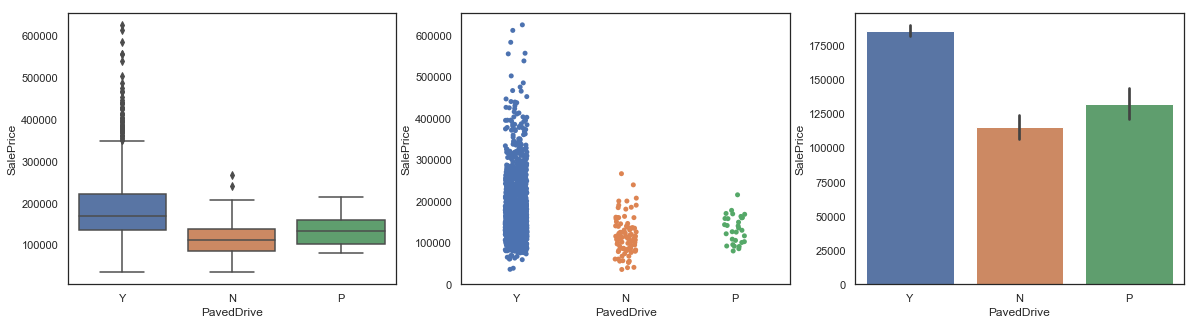

In [163]:
"""
PavedDrive: Paved driveway

       Y	Paved 价格差异较大，且没有明显的顺序关系，需要转化为one-hot特征
       P	Partial Pavement
       N	Dirt/Gravel
"""
get_feature_corr1('PavedDrive')

In [164]:
all_data=pd.get_dummies(all_data,columns=['PavedDrive'],prefix='PavedDrive')
all_data.head()

3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0             3         3             1         3          Y   
1          0             3         3             4         3          Y   
2          0             3         3             2         3          Y   
3          0             3         4             1         2          Y   
4          0             4         3             3         3          Y   

  Electrical  EnclosedPorch  ExterQual  FireplaceQu     ...       \
0      SBrkr              0          3            0     ...        
1      SBrkr              0          2            3     ...        
2      SBrkr              0          3            3     ...        
3      SBrkr            272          2            4     ...        
4      SBrkr              0          3            3     ...        

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR LotConfig_Inside  \
0                 0                  0             0                1   
1                 0                  0             1                0   
2                 0                  0             0                1   
3                 1                  0             0                0   
4                 0                  0             1                0   

  Alley_Grvl  Alley_None  Alley_Pave  PavedDrive_N  PavedDrive_P PavedDrive_Y  
0          0           1           0             0             0            1  
1          0           1           0             0             0            1  
2          0           1           0             0             0            1  
3          0           1           0             0             0            1  
4          0           1           0             0             0            1  

[5 rows x 299 columns]

##### Heating

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


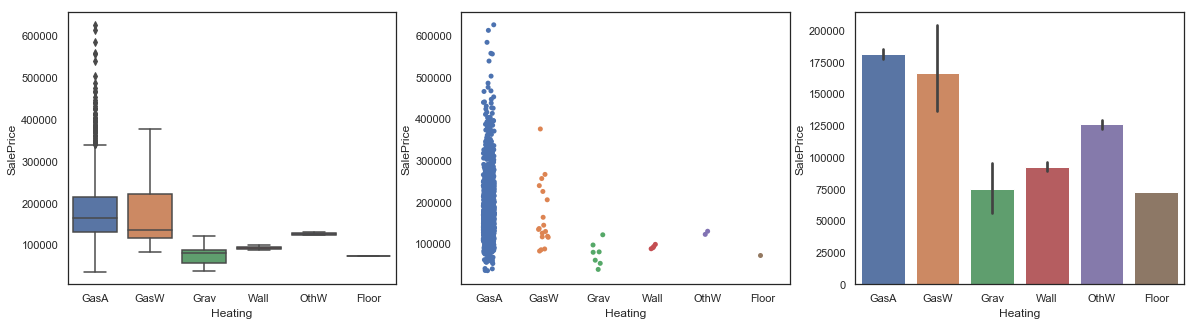

In [165]:
get_feature_corr1('Heating')

In [166]:
"""
大量集中在GasA，其余的数据量非常小，可以转化为天然气供暖，和其他方式供暖
"""
all_data['Heating']  = all_data['Heating'].map({'GasA':1,'GasW':0,'Grav':0,'Wall':0,'OthW':0,'Floor':0})

In [167]:
all_data.drop('Heating', axis=1, inplace=True)
all_data.head(3)

3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual CentralAir  \
0          0             3         3             1         3          Y   
1          0             3         3             4         3          Y   
2          0             3         3             2         3          Y   

  Electrical  EnclosedPorch  ExterQual  FireplaceQu      ...       \
0      SBrkr              0          3            0      ...        
1      SBrkr              0          2            3      ...        
2      SBrkr              0          3            3      ...        

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR LotConfig_Inside  \
0                 0                  0             0                1   
1                 0                  0             1                0   
2                 0                  0             0                1   

   Alley_Grvl  Alley_None  Alley_Pave  PavedDrive_N PavedDrive_P  PavedDrive_Y  
0           0           1           0             0            0             1  
1           0           1           0             0            0             1  
2           0           1           0             0            0             1  

[3 rows x 298 columns]

##### HeatingQC

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


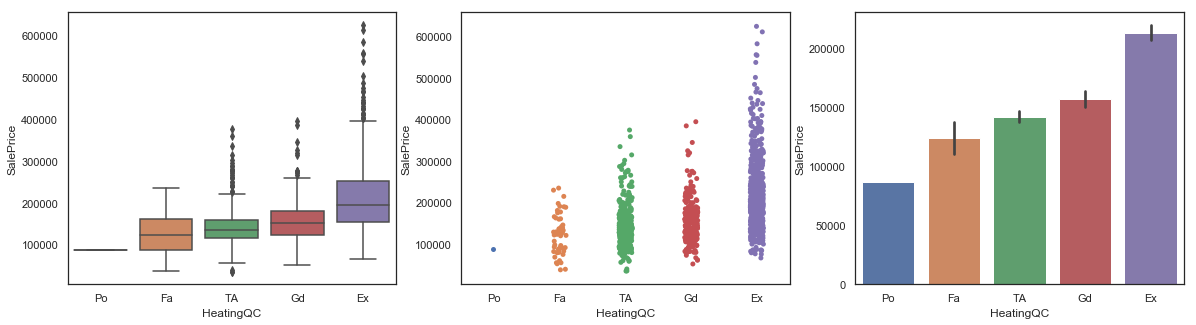

In [168]:
"""
Heating quality and condition.
"""
get_feature_corr1('HeatingQC',order=['Po','Fa','TA','Gd','Ex'])

In [169]:
all_data['HeatingQC'] = all_data['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all_data['HeatingQC'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

##### CentralAir

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


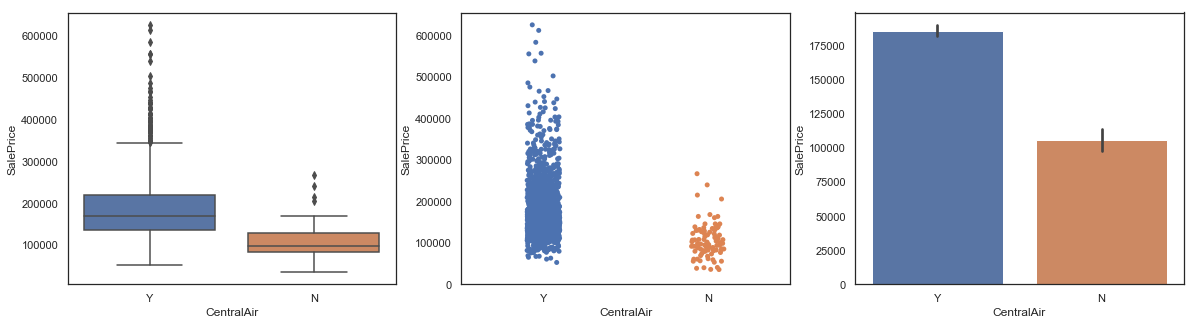

In [170]:
"""
Central air conditioning.

"""
get_feature_corr1('CentralAir')



In [171]:
all_data['CentralAir'] = all_data['CentralAir'].map({"Y":1,"N":0})

##### Electrical

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


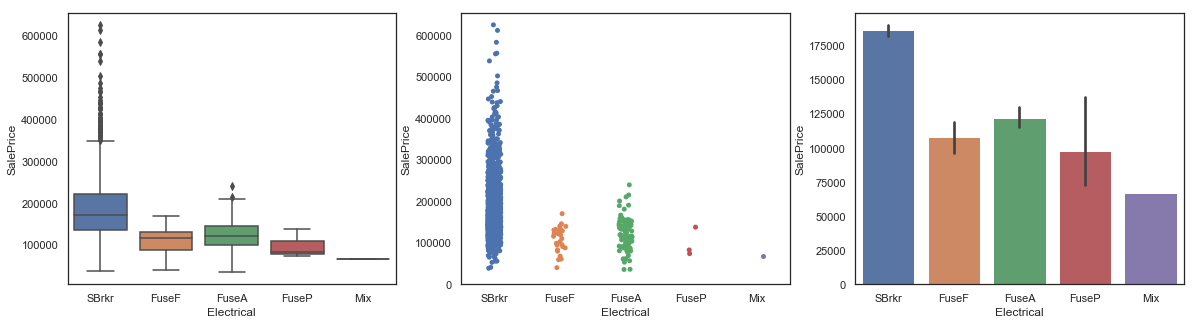

In [172]:
"""
Electrical system.

"""

get_feature_corr1('Electrical')

In [173]:
all_data['Electrical'] = all_data['Electrical'].map({'SBrkr':'SBrkr','FuseF':'Fuse','FuseA':'Fuse','FuseP':'Fuse','Mix':'Mix'})
all_data = pd.get_dummies(all_data, columns = ["Electrical"], prefix="Electrical")
all_data.head(3)

3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual  CentralAir  \
0          0             3         3             1         3           1   
1          0             3         3             4         3           1   
2          0             3         3             2         3           1   

   EnclosedPorch  ExterQual  FireplaceQu  Fireplaces        ...         \
0              0          3            0           0        ...          
1              0          2            3           1        ...          
2              0          3            3           1        ...          

   LotConfig_Inside  Alley_Grvl  Alley_None  Alley_Pave  PavedDrive_N  \
0                 1           0           1           0             0   
1                 0           0           1           0             0   
2                 1           0           1           0             0   

   PavedDrive_P  PavedDrive_Y Electrical_Fuse  Electrical_Mix  \
0             0             1               0               0   
1             0             1               0               0   
2             0             1               0               0   

   Electrical_SBrkr  
0                 1  
1                 1  
2                 1  

[3 rows x 300 columns]

In [174]:
all_data['MiscFeature'].value_counts()  #

None    2810
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


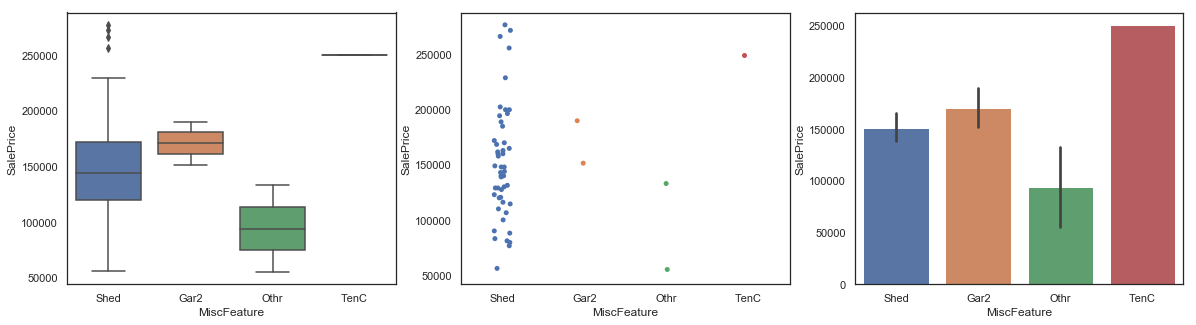

'\n有效数据太少，剔除该特征\n'

In [175]:
get_feature_corr1('MiscFeature')
'''
有效数据太少，剔除该特征
'''

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


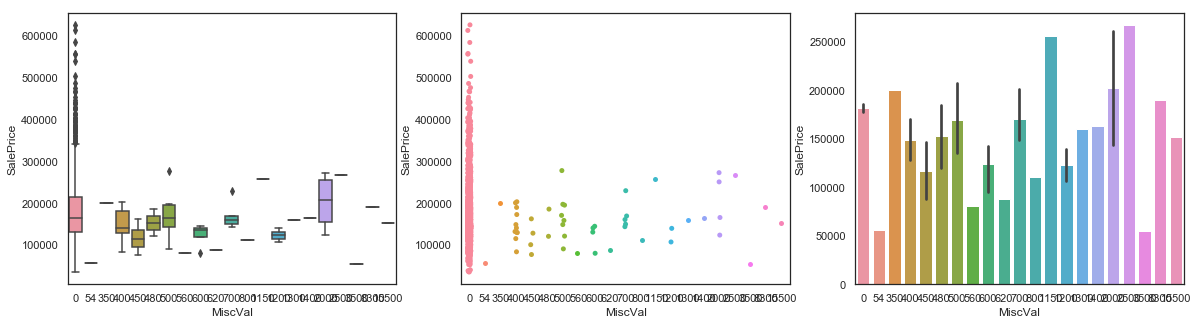

In [176]:
get_feature_corr1('MiscVal')

In [177]:
all_data['MiscVal'].value_counts()
"""
有效数据过少，剔除该特征
"""

'\n有效数据过少，剔除该特征\n'

In [178]:
all_data.drop(['MiscVal','MiscFeature'],axis=1,inplace=True)

##### MoSold and YrSold

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


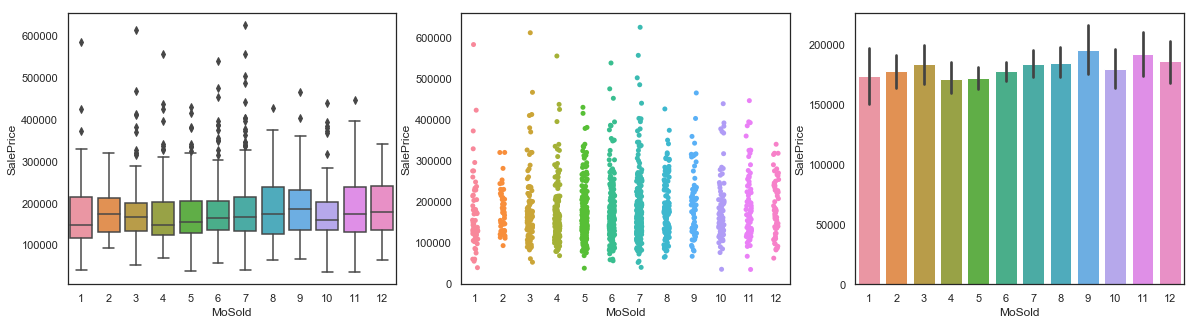

In [179]:
"""
month sold,Year Sold
"""
get_feature_corr1('MoSold')

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


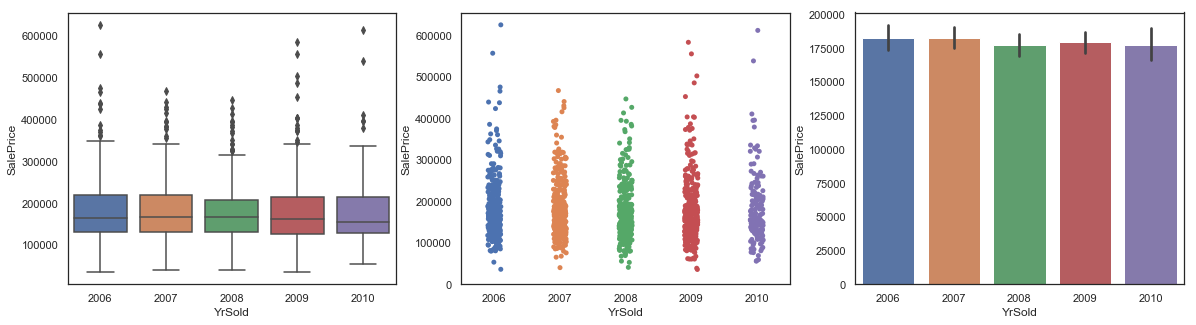

In [180]:
get_feature_corr1('YrSold')

In [181]:
all_data = pd.get_dummies(all_data, columns = ["MoSold"], prefix="MoSold")
all_data = pd.get_dummies(all_data,columns=['YrSold'],prefix='YrSold')
all_data.head(3)

3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual  CentralAir  \
0          0             3         3             1         3           1   
1          0             3         3             4         3           1   
2          0             3         3             2         3           1   

   EnclosedPorch  ExterQual  FireplaceQu  Fireplaces     ...       MoSold_8  \
0              0          3            0           0     ...              0   
1              0          2            3           1     ...              0   
2              0          3            3           1     ...              0   

   MoSold_9  MoSold_10  MoSold_11  MoSold_12  YrSold_2006  YrSold_2007  \
0         0          0          0          0            0            0   
1         0          0          0          0            0            1   
2         1          0          0          0            0            0   

   YrSold_2008  YrSold_2009  YrSold_2010  
0            1            0            0  
1            0            0            0  
2            1            0            0  

[3 rows x 313 columns]

##### SaleType

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


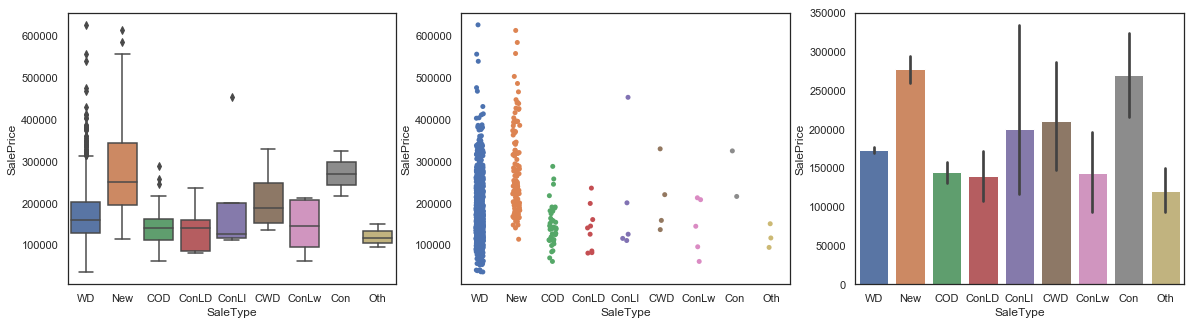

In [182]:
"""
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

"""
get_feature_corr1('SaleType')

In [183]:
all_data['SaleType'] = all_data['SaleType'].map({'WD':"WD",'New':"New",'COD':"COD",'CWD':'Oth','ConLD':'Oth','ConLI':'Oth',
                                                "ConLW":'Oth','Con':'Oth','Oth':'Oth'})
all_data=  pd.get_dummies(all_data,columns=['SaleType'],prefix='SaleType')
all_data.head()

3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual  CentralAir  \
0          0             3         3             1         3           1   
1          0             3         3             4         3           1   
2          0             3         3             2         3           1   
3          0             3         4             1         2           1   
4          0             4         3             3         3           1   

   EnclosedPorch  ExterQual  FireplaceQu  Fireplaces     ...       MoSold_12  \
0              0          3            0           0     ...               0   
1              0          2            3           1     ...               0   
2              0          3            3           1     ...               0   
3            272          2            4           1     ...               0   
4              0          3            3           1     ...               1   

   YrSold_2006  YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010  \
0            0            0            1            0            0   
1            0            1            0            0            0   
2            0            0            1            0            0   
3            1            0            0            0            0   
4            0            0            1            0            0   

   SaleType_COD  SaleType_New  SaleType_Oth  SaleType_WD  
0             0             0             0            1  
1             0             0             0            1  
2             0             0             0            1  
3             0             0             0            1  
4             0             0             0            1  

[5 rows x 316 columns]

##### SaleCondition

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


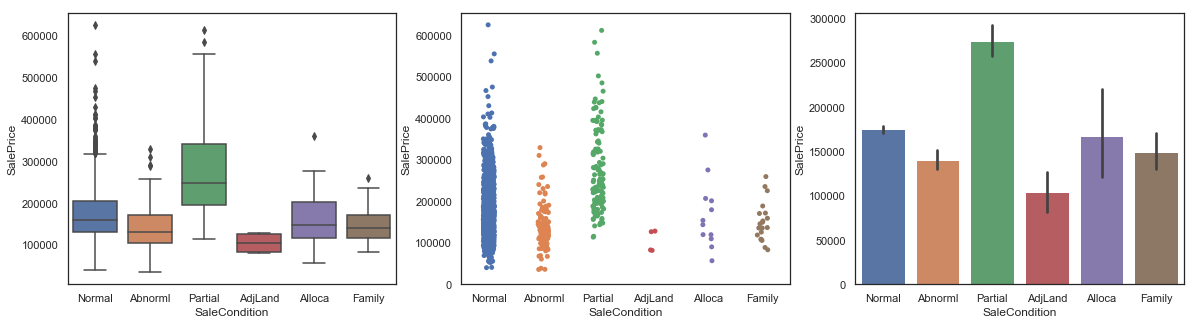

In [184]:
"""
Condition of sale.

"""

get_feature_corr1('SaleCondition')

In [185]:
all_data = pd.get_dummies(all_data, columns = ["SaleCondition"], prefix="SaleCondition")
all_data.head(3)

3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtQual  CentralAir  \
0          0             3         3             1         3           1   
1          0             3         3             4         3           1   
2          0             3         3             2         3           1   

   EnclosedPorch  ExterQual  FireplaceQu  Fireplaces          ...            \
0              0          3            0           0          ...             
1              0          2            3           1          ...             
2              0          3            3           1          ...             

   SaleType_COD  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0             0             0            1   
1             0             0             0            1   
2             0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  

[3 rows x 321 columns]

#### 目标值转换

- 与分类算法不同，回归是用算法拟合连续值
- 通常需要对目标值进行分布进行分析，机器学习的算法对于正态分布的数据一般都有很高的拟合度，如果目标值为偏正态分布，需要将目标值转化为正态分布

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


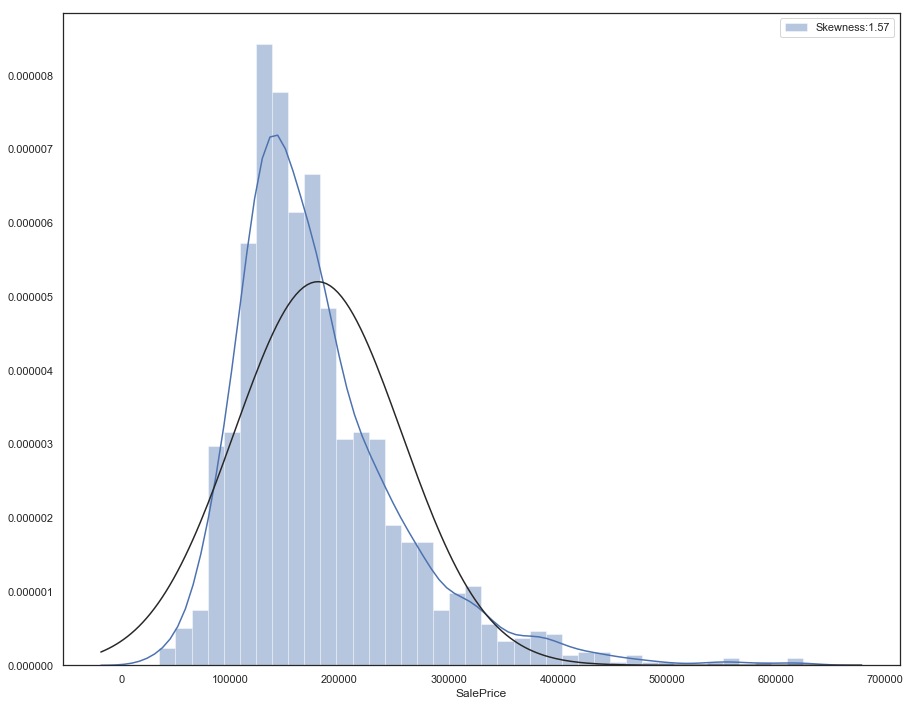

In [186]:
from scipy.stats import skew, norm
plt.subplots(figsize=(15,12))
g = sns.distplot(train['SalePrice'],fit=norm,label="Skewness:%.2f" % (train['SalePrice'].skew()))
g.legend(loc='best')

- 目标变量为正偏态，可以是用numpy中的函数，将其转化

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


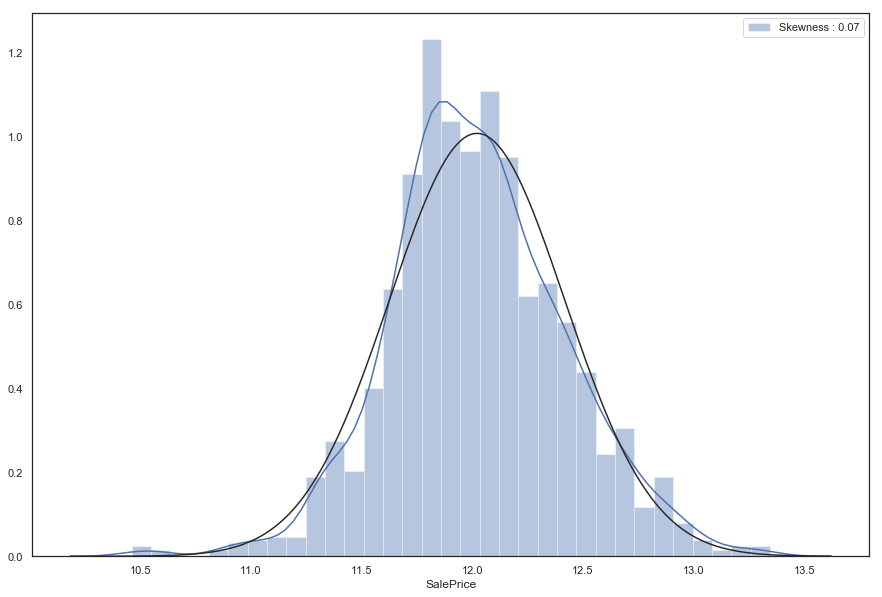

In [187]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train["SalePrice"]

#Check the new distribution 
plt.subplots(figsize=(15,10))
g = sns.distplot(train['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));
g = g.legend(loc="best")

##### 处理数据中偏态的特征

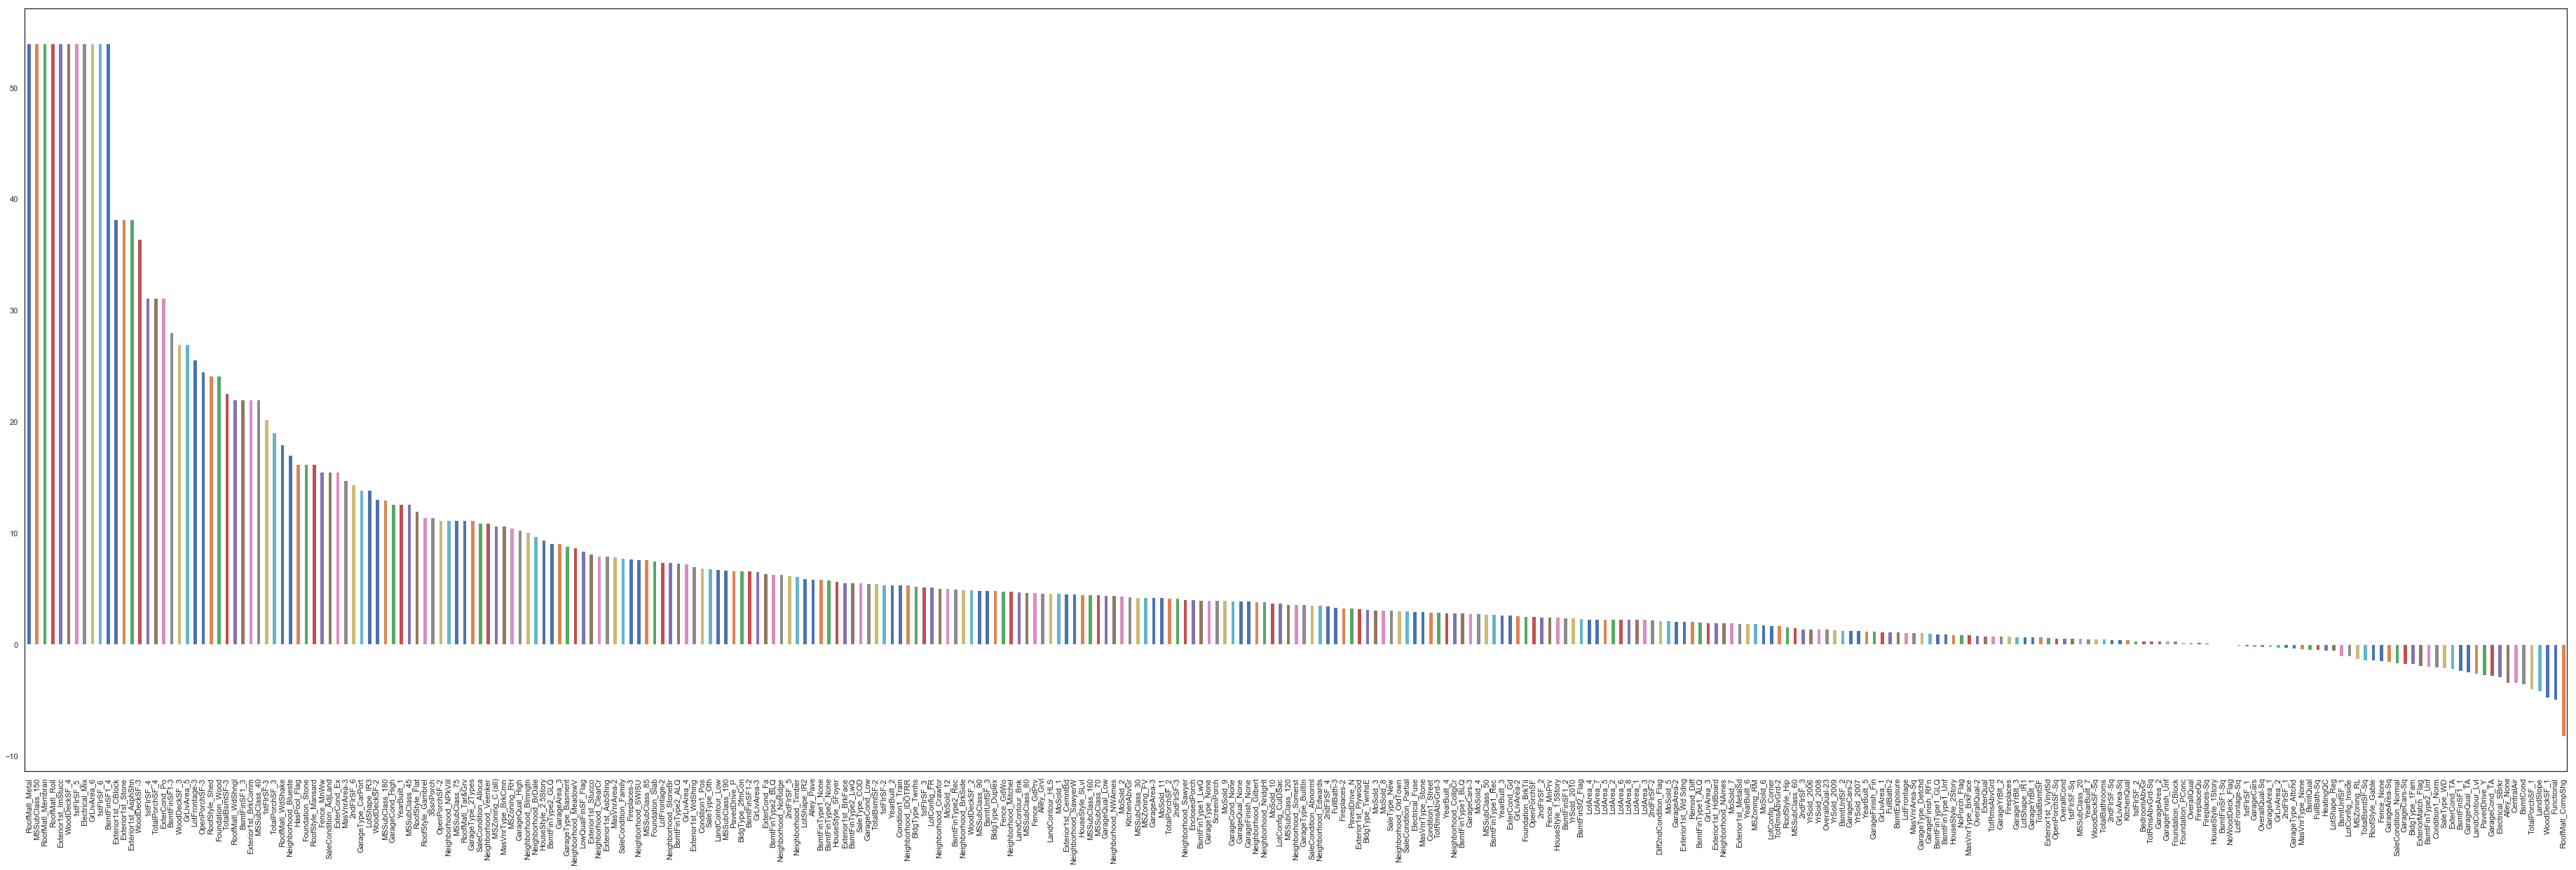

In [188]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check how skewed they are
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(65, 20))
skewed_feats.plot(kind='bar');

In [189]:

from scipy.special import boxcox1p

skewness = skewed_feats[abs(skewed_feats) > 0.5]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")

294 skewed numerical features have been Box-Cox transformed


#### 准备模型训练的数据

In [190]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape)
print(test.shape)

(1456, 321)
(1459, 321)


In [191]:
y_train.shape

(1456,)

##### feature importance

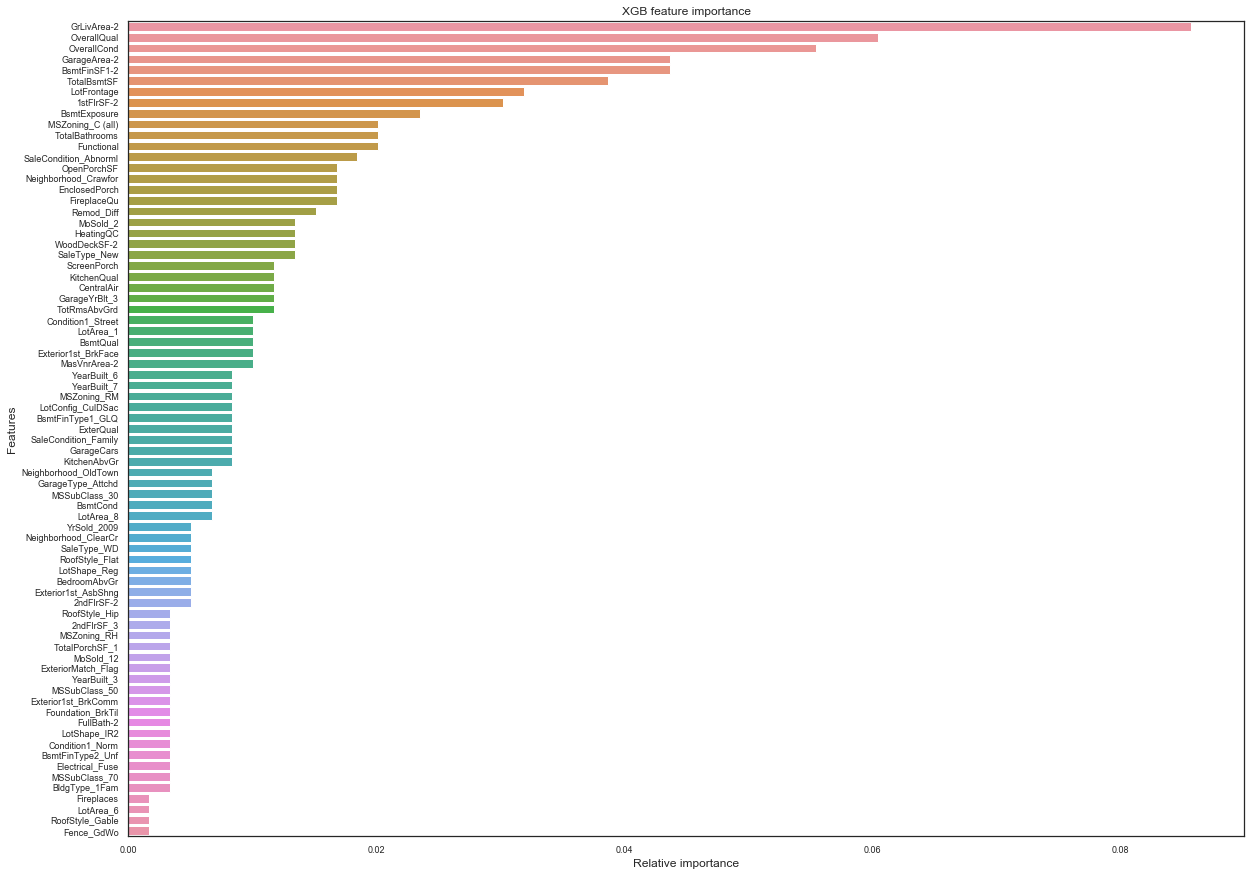

In [192]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(train, y_train)


# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [193]:
xgb_train = train.copy()
xgb_test = test.copy()
from sklearn.feature_selection import SelectFromModel

xgb_feat_red = SelectFromModel(model,prefit=True)
# reduce estimation validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

X_train:  (1456, 71) 
X_test:  (1459, 71)


In [194]:

from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)

# X_train = predictor features for estimation dataset
# X_test = predictor variables for validation dataset
# Y_train = target variable for the estimation dataset
# Y_test = target variable for the estimation dataset

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)



X_train:  (1019, 71) 
X_test:  (437, 71) 
Y_train:  (1019,) 
Y_test:  (437,)


In [195]:
X_train

array([[3.        , 1.54096276, 0.73046315, ..., 0.73046315, 0.        ,
        0.        ],
       [3.        , 1.54096276, 0.73046315, ..., 0.73046315, 0.        ,
        0.        ],
       [2.        , 1.54096276, 1.19431764, ..., 0.73046315, 0.        ,
        0.        ],
       ...,
       [2.        , 1.54096276, 1.8203341 , ..., 0.        , 0.        ,
        0.        ],
       [3.        , 1.54096276, 0.73046315, ..., 0.73046315, 0.        ,
        0.        ],
       [4.        , 1.54096276, 1.54096276, ..., 0.73046315, 0.        ,
        0.        ]])

####  训练不同的模型

In [196]:
# 从sklearn 导入不同的回归模型
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')


Algorithm packages imported!


In [198]:
# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Model selection packages imported!


In [ ]:
models = [KernelRidge(),ElasticNet(),Lasso(),GradientBoostingRegressor(),BayesianRidge(),LassoLarsIC(),RandomForestRegressor(),xgb.XGBRegressor()]
# 随机取样，其实可以使用正常的split，然后选择里面的shuffle = True
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
shuff =ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
